In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
initial_values = {
    'HEB': 9,
    'BEB': 15
}

In [3]:
h_pp = pd.read_csv(r'../../results/highcap-PP-optimized-variables-with-replacement-y.csv', low_memory=False)

# Drop CDBs
h_pp = h_pp.loc[h_pp['Powertrain'] != 'CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_pp.loc[(h_pp['Year'] == 0) & (h_pp['Powertrain'] == 'HEB'), 'Value'] = 9
h_pp.loc[(h_pp['Year'] == 0) & (h_pp['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_pp['Diff'] = h_pp.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_pp['Diff'] = h_pp['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_pp['Investment Cost (M$)'] = h_pp.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_pp = h_pp.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_pp.columns = [f'{col[1]} - {col[0]}' for col in result_h_pp.columns]
result_h_pp

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           23            9         8.0         0.0   
2         2           23           25         0.0        16.0   
3         3           27           35         4.0        10.0   
4         4           38           35        11.0         0.0   
5         5           42           39         4.0         4.0   
6         6           52           39        10.0         0.0   
7         7           55           42         3.0         3.0   
8         8           58           45         3.0         3.0   
9         9           61           48         3.0         3.0   
10       10           64           51         3.0         3.0   
11       11           67           54         3.0         3.0   
12       12           70           57         3.0         3.0   
13       13           73           60         3.0         3.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                         10.4                         0.0  
2                          0.0                        14.4  
3                          5.2                         9.0  
4                         14.3                         0.0  
5                          5.2                         3.6  
6                         13.0                         0.0  
7                          3.9                         2.7  
8                          3.9                         2.7  
9                          3.9                         2.7  
10                         3.9                         2.7  
11                         3.9                         2.7  
12                         3.9                         2.7  
13                         3.9                         2.7

In [4]:
h_FE = pd.read_csv(r'../../results/highcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
h_FE = h_FE.loc[h_FE['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_FE.loc[(h_FE['Year'] == 0) & (h_FE['Powertrain'] == 'HEB'), 'Value'] = 9
h_FE.loc[(h_FE['Year'] == 0) & (h_FE['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_FE['Diff'] = h_FE.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_FE['Diff'] = h_FE['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_FE['Investment Cost (M$)'] = h_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_FE = h_FE.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_FE.columns = [f'{col[1]} - {col[0]}' for col in result_h_FE.columns]
result_h_FE

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           23            9         8.0         0.0   
2         2           23            9         0.0         0.0   
3         3           27            9         4.0         0.0   
4         4           38            9        11.0         0.0   
5         5           42            9         4.0         0.0   
6         6           52            9        10.0         0.0   
7         7           62            9        10.0         0.0   
8         8           74            9        12.0         0.0   
9         9           89            9        15.0         0.0   
10       10          107            9        18.0         0.0   
11       11          128            9        21.0         0.0   
12       12          151            9        23.0         0.0   
13       13          174            9        23.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                         10.4                         0.0  
2                          0.0                         0.0  
3                          5.2                         0.0  
4                         14.3                         0.0  
5                          5.2                         0.0  
6                         13.0                         0.0  
7                         13.0                         0.0  
8                         15.6                         0.0  
9                         19.5                         0.0  
10                        23.4                         0.0  
11                        27.3                         0.0  
12                        29.9                         0.0  
13                        29.9                         0.0

In [5]:
m_FE = pd.read_csv(r'../../results/midcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
m_FE = m_FE.loc[m_FE['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
m_FE.loc[(m_FE['Year'] == 0) & (m_FE['Powertrain'] == 'HEB'), 'Value'] = 9
m_FE.loc[(m_FE['Year'] == 0) & (m_FE['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
m_FE['Diff'] = m_FE.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
m_FE['Diff'] = m_FE['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
m_FE['Investment Cost (M$)'] = m_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_m_FE = m_FE.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_m_FE.columns = [f'{col[1]} - {col[0]}' for col in result_m_FE.columns]
result_m_FE

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           23            9         8.0         0.0   
2         2           23            9         0.0         0.0   
3         3           27            9         4.0         0.0   
4         4           38            9        11.0         0.0   
5         5           42            9         4.0         0.0   
6         6           52            9        10.0         0.0   
7         7           62            9        10.0         0.0   
8         8           74            9        12.0         0.0   
9         9           89            9        15.0         0.0   
10       10          104            9        15.0         0.0   
11       11          119            9        15.0         0.0   
12       12          134            9        15.0         0.0   
13       13          149            9        15.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                         10.4                         0.0  
2                          0.0                         0.0  
3                          5.2                         0.0  
4                         14.3                         0.0  
5                          5.2                         0.0  
6                         13.0                         0.0  
7                         13.0                         0.0  
8                         15.6                         0.0  
9                         19.5                         0.0  
10                        19.5                         0.0  
11                        19.5                         0.0  
12                        19.5                         0.0  
13                        19.5                         0.0

In [6]:
l_FE = pd.read_csv(r'../../results/lowcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
l_FE = l_FE.loc[l_FE['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
l_FE.loc[(l_FE['Year'] == 0) & (l_FE['Powertrain'] == 'HEB'), 'Value'] = 9
l_FE.loc[(l_FE['Year'] == 0) & (l_FE['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
l_FE['Diff'] = l_FE.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
l_FE['Diff'] = l_FE['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
l_FE['Investment Cost (M$)'] = l_FE.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_l_FE = l_FE.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_l_FE.columns = [f'{col[1]} - {col[0]}' for col in result_l_FE.columns]
result_l_FE

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           22            9         7.0         0.0   
2         2           23            9         1.0         0.0   
3         3           27            9         4.0         0.0   
4         4           34            9         7.0         0.0   
5         5           41            9         7.0         0.0   
6         6           48            9         7.0         0.0   
7         7           55            9         7.0         0.0   
8         8           62            9         7.0         0.0   
9         9           69            9         7.0         0.0   
10       10           76            9         7.0         0.0   
11       11           83            9         7.0         0.0   
12       12           90            9         7.0         0.0   
13       13           97            9         7.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                          9.1                         0.0  
2                          1.3                         0.0  
3                          5.2                         0.0  
4                          9.1                         0.0  
5                          9.1                         0.0  
6                          9.1                         0.0  
7                          9.1                         0.0  
8                          9.1                         0.0  
9                          9.1                         0.0  
10                         9.1                         0.0  
11                         9.1                         0.0  
12                         9.1                         0.0  
13                         9.1                         0.0

In [7]:
h_FH = pd.read_csv(r'../../results/highcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
h_FH = h_FH.loc[h_FH['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_FH.loc[(h_FH['Year'] == 0) & (h_FH['Powertrain'] == 'HEB'), 'Value'] = 9
h_FH.loc[(h_FH['Year'] == 0) & (h_FH['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_FH['Diff'] = h_FH.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_FH['Diff'] = h_FH['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_FH['Investment Cost (M$)'] = h_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_FH = h_FH.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_FH.columns = [f'{col[1]} - {col[0]}' for col in result_h_FH.columns]
result_h_FH

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           15           42         0.0        33.0   
2         2           15           75         0.0        33.0   
3         3           15          108         0.0        33.0   
4         4           15          119         0.0        11.0   
5         5           15          119         0.0         0.0   
6         6           15          119         0.0         0.0   
7         7           15          119         0.0         0.0   
8         8           15          119         0.0         0.0   
9         9           15          119         0.0         0.0   
10       10           15          119         0.0         0.0   
11       11           15          119         0.0         0.0   
12       12           15          119         0.0         0.0   
13       13           15          119         0.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                          0.0                        29.7  
2                          0.0                        29.7  
3                          0.0                        29.7  
4                          0.0                         9.9  
5                          0.0                         0.0  
6                          0.0                         0.0  
7                          0.0                         0.0  
8                          0.0                         0.0  
9                          0.0                         0.0  
10                         0.0                         0.0  
11                         0.0                         0.0  
12                         0.0                         0.0  
13                         0.0                         0.0

In [8]:
m_FH = pd.read_csv(r'../../results/midcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
m_FH = m_FH.loc[m_FH['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
m_FH.loc[(m_FH['Year'] == 0) & (m_FH['Powertrain'] == 'HEB'), 'Value'] = 9
m_FH.loc[(m_FH['Year'] == 0) & (m_FH['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
m_FH['Diff'] = m_FH.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
m_FH['Diff'] = m_FH['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
m_FH['Investment Cost (M$)'] = m_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_m_FH = m_FH.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_m_FH.columns = [f'{col[1]} - {col[0]}' for col in result_m_FH.columns]
result_m_FH

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           15           31         0.0        22.0   
2         2           15           53         0.0        22.0   
3         3           15           75         0.0        22.0   
4         4           15           97         0.0        22.0   
5         5           15          119         0.0        22.0   
6         6           15          119         0.0         0.0   
7         7           15          119         0.0         0.0   
8         8           15          119         0.0         0.0   
9         9           15          119         0.0         0.0   
10       10           15          119         0.0         0.0   
11       11           15          119         0.0         0.0   
12       12           15          119         0.0         0.0   
13       13           15          119         0.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                          0.0                        19.8  
2                          0.0                        19.8  
3                          0.0                        19.8  
4                          0.0                        19.8  
5                          0.0                        19.8  
6                          0.0                         0.0  
7                          0.0                         0.0  
8                          0.0                         0.0  
9                          0.0                         0.0  
10                         0.0                         0.0  
11                         0.0                         0.0  
12                         0.0                         0.0  
13                         0.0                         0.0

In [9]:
l_FH = pd.read_csv(r'../../results/lowcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
l_FH = l_FH.loc[l_FH['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
l_FH.loc[(l_FH['Year'] == 0) & (l_FH['Powertrain'] == 'HEB'), 'Value'] = 9
l_FH.loc[(l_FH['Year'] == 0) & (l_FH['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
l_FH['Diff'] = l_FH.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
l_FH['Diff'] = l_FH['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
l_FH['Investment Cost (M$)'] = l_FH.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_l_FH = l_FH.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_l_FH.columns = [f'{col[1]} - {col[0]}' for col in result_l_FH.columns]
result_l_FH

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           15           20         0.0        11.0   
2         2           15           31         0.0        11.0   
3         3           15           42         0.0        11.0   
4         4           15           53         0.0        11.0   
5         5           15           64         0.0        11.0   
6         6           15           75         0.0        11.0   
7         7           15           86         0.0        11.0   
8         8           15           97         0.0        11.0   
9         9           15          108         0.0        11.0   
10       10           15          119         0.0        11.0   
11       11           15          119         0.0         0.0   
12       12           15          119         0.0         0.0   
13       13           15          119         0.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                          0.0                         9.9  
2                          0.0                         9.9  
3                          0.0                         9.9  
4                          0.0                         9.9  
5                          0.0                         9.9  
6                          0.0                         9.9  
7                          0.0                         9.9  
8                          0.0                         9.9  
9                          0.0                         9.9  
10                         0.0                         9.9  
11                         0.0                         0.0  
12                         0.0                         0.0  
13                         0.0                         0.0

In [10]:
h_BM = pd.read_csv(r'../../results/highcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
h_BM = h_BM.loc[h_BM['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
h_BM.loc[(h_BM['Year'] == 0) & (h_BM['Powertrain'] == 'HEB'), 'Value'] = 9
h_BM.loc[(h_BM['Year'] == 0) & (h_BM['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
h_BM['Diff'] = h_BM.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
h_BM['Diff'] = h_BM['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
h_BM['Investment Cost (M$)'] = h_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_h_BM = h_BM.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_h_BM.columns = [f'{col[1]} - {col[0]}' for col in result_h_BM.columns]
result_h_BM

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           20           35         5.0        26.0   
2         2           23           64         3.0        29.0   
3         3           27           91         4.0        27.0   
4         4           38          108        11.0        17.0   
5         5           42          107         4.0         0.0   
6         6           52          103        10.0         0.0   
7         7           62           98        10.0         0.0   
8         8           74           93        12.0         0.0   
9         9           89           86        15.0         0.0   
10       10          107           78        18.0         0.0   
11       11          128           68        21.0         0.0   
12       12          151           58        23.0         0.0   
13       13          174           48        23.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                          6.5                        23.4  
2                          3.9                        26.1  
3                          5.2                        24.3  
4                         14.3                        15.3  
5                          5.2                         0.0  
6                         13.0                         0.0  
7                         13.0                         0.0  
8                         15.6                         0.0  
9                         19.5                         0.0  
10                        23.4                         0.0  
11                        27.3                         0.0  
12                        29.9                         0.0  
13                        29.9                         0.0

In [11]:
m_BM = pd.read_csv(r'../../results/midcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
m_BM = m_BM.loc[m_BM['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
m_BM.loc[(m_BM['Year'] == 0) & (m_BM['Powertrain'] == 'HEB'), 'Value'] = 9
m_BM.loc[(m_BM['Year'] == 0) & (m_BM['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
m_BM['Diff'] = m_BM.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
m_BM['Diff'] = m_BM['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
m_BM['Investment Cost (M$)'] = m_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_m_BM = m_BM.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_m_BM.columns = [f'{col[1]} - {col[0]}' for col in result_m_BM.columns]
result_m_BM

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           22           21         7.0        12.0   
2         2           22           43         0.0        22.0   
3         3           27           58         5.0        15.0   
4         4           38           64        11.0         6.0   
5         5           42           80         4.0        16.0   
6         6           52           87        10.0         7.0   
7         7           62           94        10.0         7.0   
8         8           74           93        12.0         0.0   
9         9           89           86        15.0         0.0   
10       10          104           79        15.0         0.0   
11       11          119           72        15.0         0.0   
12       12          134           66        15.0         0.0   
13       13          149           59        15.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                          9.1                        10.8  
2                          0.0                        19.8  
3                          6.5                        13.5  
4                         14.3                         5.4  
5                          5.2                        14.4  
6                         13.0                         6.3  
7                         13.0                         6.3  
8                         15.6                         0.0  
9                         19.5                         0.0  
10                        19.5                         0.0  
11                        19.5                         0.0  
12                        19.5                         0.0  
13                        19.5                         0.0

In [12]:
l_BM = pd.read_csv(r'../../results/lowcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
# Drop CDBs
l_BM = l_BM.loc[l_BM['Powertrain']!='CDB']

# Replace values for Year == 0 based on the initial values of each Powertrain
l_BM.loc[(l_BM['Year'] == 0) & (l_BM['Powertrain'] == 'HEB'), 'Value'] = 9
l_BM.loc[(l_BM['Year'] == 0) & (l_BM['Powertrain'] == 'BEB'), 'Value'] = 15

# Compute the difference in 'Value' column for each year compared to its previous year
l_BM['Diff'] = l_BM.groupby('Powertrain')['Value'].diff()

# Fill NaN values with 0 and set negative values to 0
l_BM['Diff'] = l_BM['Diff'].fillna(0).clip(lower=0)

# Calculate the investment cost for the additional fleet
l_BM['Investment Cost (M$)'] = l_BM.apply(lambda row: 0.9 * row['Diff'] if row['Powertrain'] == 'HEB' else 1.3 * row['Diff'], axis=1)

# Group by 'Year' and 'Powertrain', and sum the 'Value', 'Diff', and 'Investment Cost (M$)' for each group
result_l_BM = l_BM.groupby(['Year', 'Powertrain'])[['Value', 'Diff', 'Investment Cost (M$)']].sum().unstack().fillna(0).reset_index()
result_l_BM.columns = [f'{col[1]} - {col[0]}' for col in result_l_BM.columns]
result_l_BM

- Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0         0           15            9         0.0         0.0   
1         1           22           10         7.0         1.0   
2         2           22           21         0.0        11.0   
3         3           26           26         4.0         5.0   
4         4           33           27         7.0         1.0   
5         5           40           28         7.0         1.0   
6         6           47           29         7.0         1.0   
7         7           54           30         7.0         1.0   
8         8           61           31         7.0         1.0   
9         9           68           32         7.0         1.0   
10       10           75           33         7.0         1.0   
11       11           82           34         7.0         1.0   
12       12           89           35         7.0         1.0   
13       13           96           36         7.0         1.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  
0                          0.0                         0.0  
1                          9.1                         0.9  
2                          0.0                         9.9  
3                          5.2                         4.5  
4                          9.1                         0.9  
5                          9.1                         0.9  
6                          9.1                         0.9  
7                          9.1                         0.9  
8                          9.1                         0.9  
9                          9.1                         0.9  
10                         9.1                         0.9  
11                         9.1                         0.9  
12                         9.1                         0.9  
13                         9.1                         0.9

In [13]:
# Group by 'Year' and sum 'Investment Cost (M$)'
result_h_pp['future'] = 'PVTA plan'
result_h_FE['future'] = 'hi-cap Electric'
result_m_FE['future'] = 'mid-cap Electric'
result_l_FE['future'] = 'lo-cap Electric'
result_h_FH['future'] = 'hi-cap Hybrid'
result_m_FH['future'] = 'mid-cap Hybrid'
result_l_FH['future'] = 'lo-cap Hybrid'
result_h_BM['future'] = 'hi-cap Hybrid Electric'
result_m_BM['future'] = 'mid-cap Hybrid Electric'
result_l_BM['future'] = 'lo-cap Hybrid Electric'

In [14]:
# Define a custom palette and marker order
custom_palette = {
    "Status quo": "black",
    "PVTA plan": "grey",
    "lo-cap Hybrid": "lightcoral",
    "mid-cap Hybrid": "indianred",
    "hi-cap Hybrid": "red",
    "lo-cap Hybrid Electric": "aqua",
    "mid-cap Hybrid Electric": "royalblue",
    "hi-cap Hybrid Electric": "navy",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}
custom_markers = {
    "Status quo": "P",
    "PVTA plan": "o",
    "lo-cap Hybrid": "^",
    "mid-cap Hybrid": "s",
    "hi-cap Hybrid": "o",
    "lo-cap Hybrid Electric": "^",
    "mid-cap Hybrid Electric": "s",
    "hi-cap Hybrid Electric": "o",
    "lo-cap Electric": "^",
    "mid-cap Electric": "s",
    "hi-cap Electric": "o"
}


# Merge dataframes
dataframes = [result_h_pp, result_h_FE, result_m_FE, result_l_FE, result_h_FH, result_m_FH, result_l_FH, result_h_BM, result_m_BM, result_l_BM]  # Add all your dataframes in this list
merged_df = pd.concat(dataframes, ignore_index=True)

merged_df = merged_df.rename(columns={' - Year': 'Year'})
print(merged_df.columns)

# Creating a mapping dictionary
year_mapping = {i: 2022 + i for i in range(14)}

# Replacing the values in the "Year" column based on the mapping dictionary
merged_df['Year'] = merged_df['Year'].replace(year_mapping)

Index(['Year', 'BEB - Value', 'HEB - Value', 'BEB - Diff', 'HEB - Diff',
       'BEB - Investment Cost (M$)', 'HEB - Investment Cost (M$)', 'future'],
      dtype='object')


In [15]:
merged_df['yearly_purchased_buses']=merged_df['BEB - Diff']+ merged_df['HEB - Diff']

In [16]:
merged_df

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0    2022           15            9         0.0         0.0   
1    2023           23            9         8.0         0.0   
2    2024           23           25         0.0        16.0   
3    2025           27           35         4.0        10.0   
4    2026           38           35        11.0         0.0   
..    ...          ...          ...         ...         ...   
135  2031           68           32         7.0         1.0   
136  2032           75           33         7.0         1.0   
137  2033           82           34         7.0         1.0   
138  2034           89           35         7.0         1.0   
139  2035           96           36         7.0         1.0   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  \
0                           0.0                         0.0   
1                          10.4                         0.0   
2                           0.0                        14.4   
3                           5.2                         9.0   
4                          14.3                         0.0   
..                          ...                         ...   
135                         9.1                         0.9   
136                         9.1                         0.9   
137                         9.1                         0.9   
138                         9.1                         0.9   
139                         9.1                         0.9   

                     future  yearly_purchased_buses  
0                 PVTA plan                     0.0  
1                 PVTA plan                     8.0  
2                 PVTA plan                    16.0  
3                 PVTA plan                    14.0  
4                 PVTA plan                    11.0  
..                      ...                     ...  
135  lo-cap Hybrid Electric                     8.0  
136  lo-cap Hybrid Electric                     8.0  
137  lo-cap Hybrid Electric                     8.0  
138  lo-cap Hybrid Electric                     8.0  
139  lo-cap Hybrid Electric                     8.0  

[140 rows x 9 columns]

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\1761405299.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_hybrid_electric['Remaining Investment (M$)'] = total_investment - (


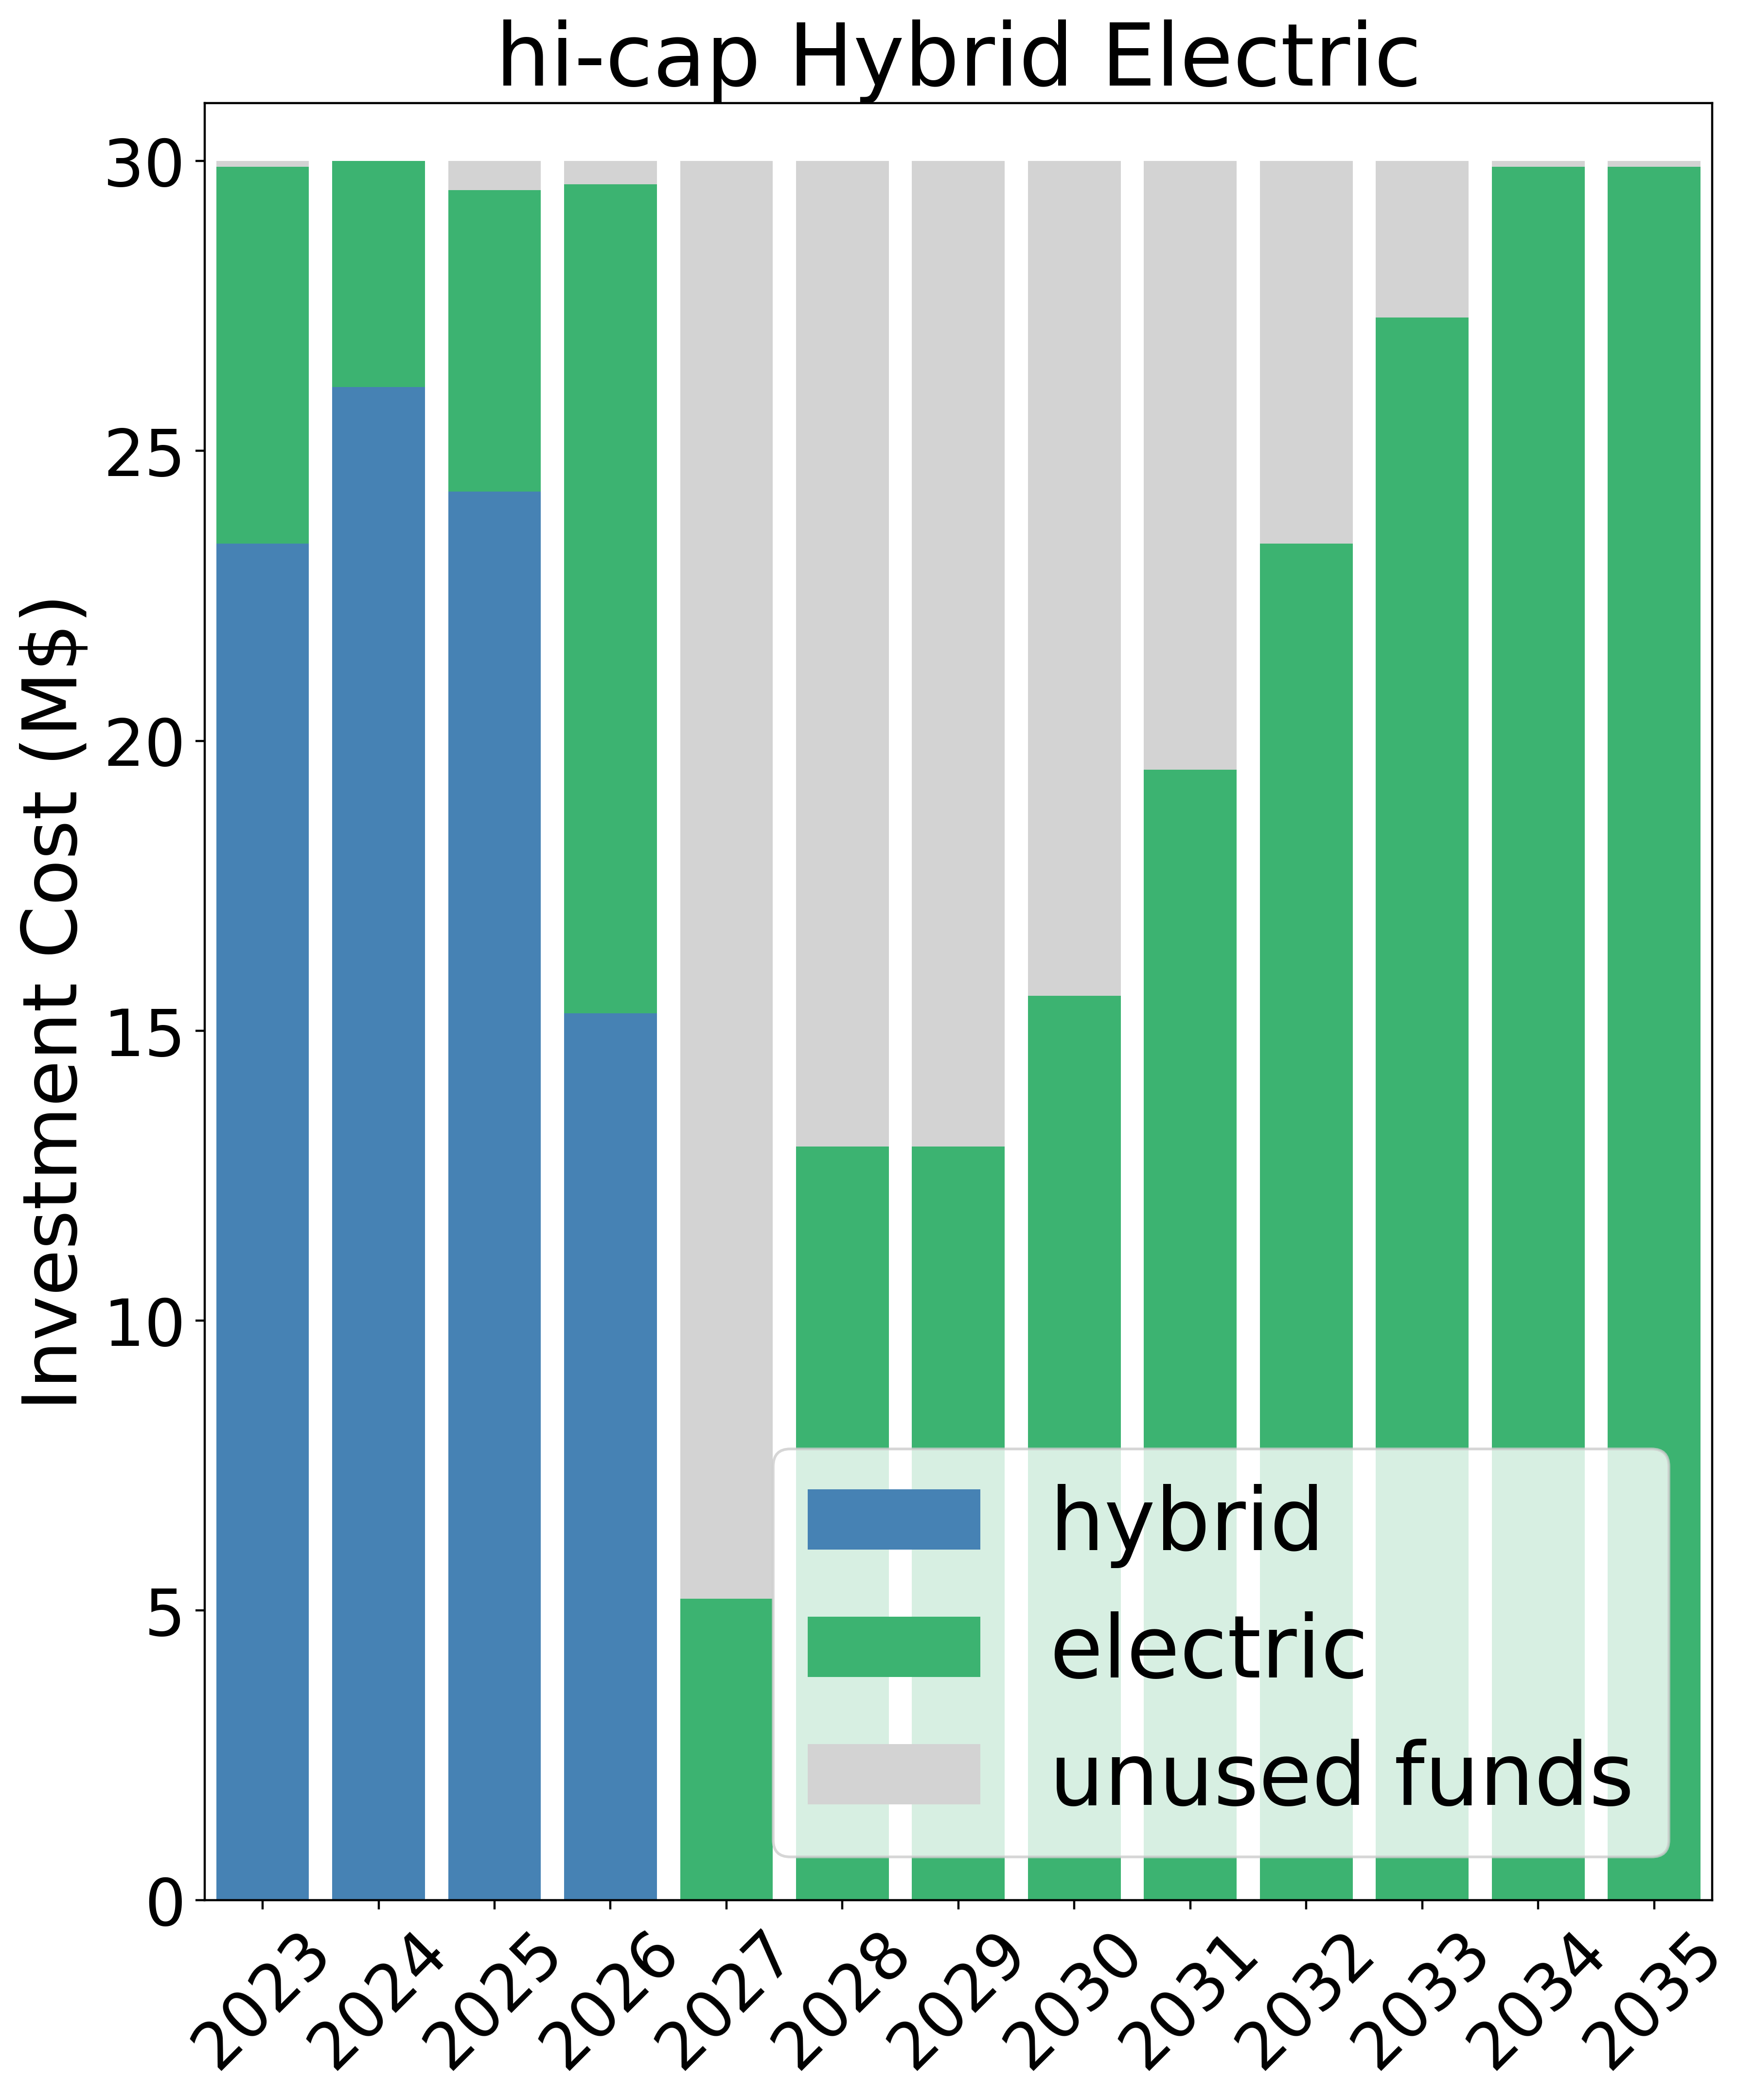

In [17]:
# Define the color palette
palette = {
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen',
    'Remaining': 'lightgray'  # Color for the remaining investment
}

# Filter the dataframe for 'hi-cap Hybrid Electric' future
hi_cap_hybrid_electric = merged_df.loc[merged_df['future'] == 'hi-cap Hybrid Electric']

# Calculate remaining investment
total_investment = 30  # Total investment in millions of dollars
hi_cap_hybrid_electric['Remaining Investment (M$)'] = total_investment - (
    hi_cap_hybrid_electric['HEB - Investment Cost (M$)'] + hi_cap_hybrid_electric['BEB - Investment Cost (M$)'])

# Create a stacked bar plot
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')

plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        bottom=hi_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

# Adding the remaining investment
plt.bar(hi_cap_hybrid_electric['Year'], hi_cap_hybrid_electric['Remaining Investment (M$)'],
        bottom=hi_cap_hybrid_electric['HEB - Investment Cost (M$)'] + hi_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        color=palette['Remaining'], label='unused funds')

plt.xticks(hi_cap_hybrid_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)


# Adding labels and title
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Hybrid Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [18]:
hi_cap_hybrid_electric['total_cost']=hi_cap_hybrid_electric['BEB - Investment Cost (M$)']+hi_cap_hybrid_electric['HEB - Investment Cost (M$)']
print('hi_cap_hybrid_electric_total_cost:',hi_cap_hybrid_electric['total_cost'].sum())

hi_cap_hybrid_electric_total_cost: 295.8


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\2726631405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_hybrid_electric['total_cost']=hi_cap_hybrid_electric['BEB - Investment Cost (M$)']+hi_cap_hybrid_electric['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\3206085328.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_cap_hybrid_electric['Remaining Investment (M$)'] = total_investment - (


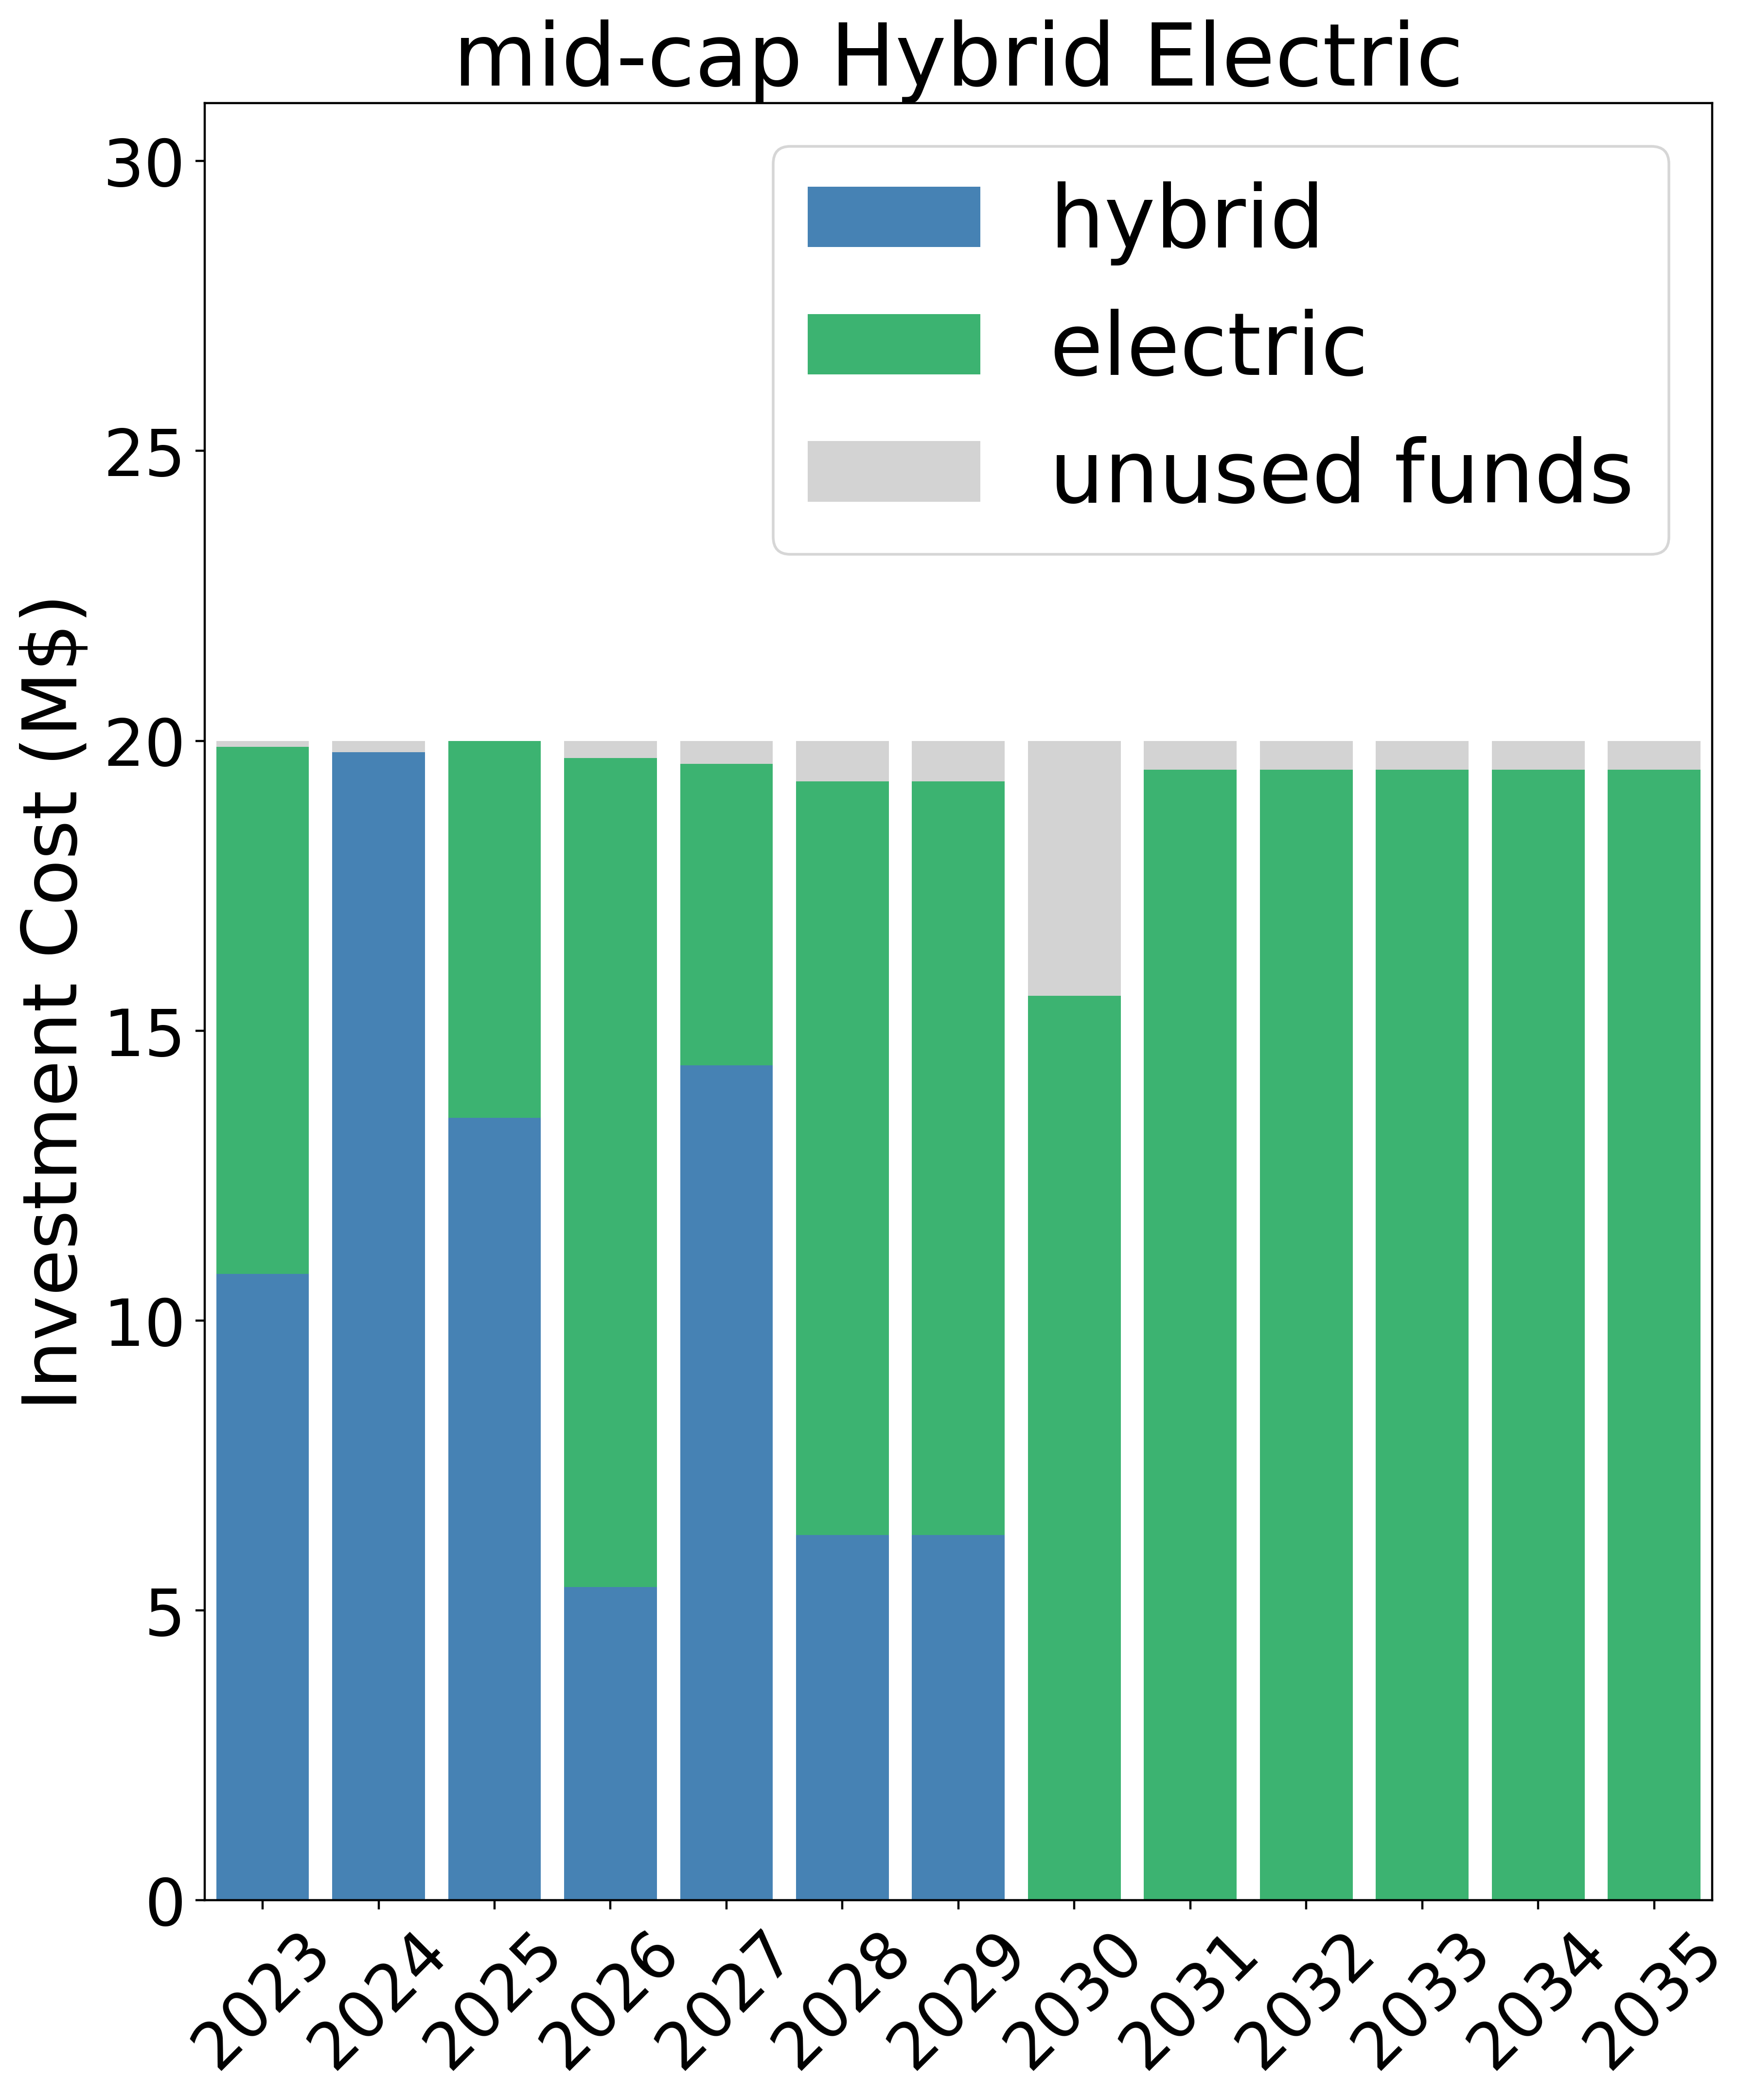

In [19]:
# Filter the dataframe 
mid_cap_hybrid_electric = merged_df.loc[merged_df['future'] == 'mid-cap Hybrid Electric']

# Calculate remaining investment
total_investment = 20  # Total investment in millions of dollars
mid_cap_hybrid_electric['Remaining Investment (M$)'] = total_investment - (
    mid_cap_hybrid_electric['HEB - Investment Cost (M$)'] + mid_cap_hybrid_electric['BEB - Investment Cost (M$)'])

# Create a stacked bar plot
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(mid_cap_hybrid_electric['Year'], mid_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')

plt.bar(mid_cap_hybrid_electric['Year'], mid_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        bottom=mid_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

# Adding the remaining investment
plt.bar(mid_cap_hybrid_electric['Year'], mid_cap_hybrid_electric['Remaining Investment (M$)'],
        bottom=mid_cap_hybrid_electric['HEB - Investment Cost (M$)'] + mid_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        color=palette['Remaining'], label='unused funds')

plt.xticks(mid_cap_hybrid_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)

# Adding labels and title
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('mid-cap Hybrid Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [20]:
mid_cap_hybrid_electric['total_cost']=mid_cap_hybrid_electric['BEB - Investment Cost (M$)']+mid_cap_hybrid_electric['HEB - Investment Cost (M$)']
print('mid_cap_hybrid_electric_total_cost:',mid_cap_hybrid_electric['total_cost'].sum())

mid_cap_hybrid_electric_total_cost: 250.7


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\1719300876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_cap_hybrid_electric['total_cost']=mid_cap_hybrid_electric['BEB - Investment Cost (M$)']+mid_cap_hybrid_electric['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\1608460165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_cap_hybrid_electric['Remaining Investment (M$)'] = total_investment - (


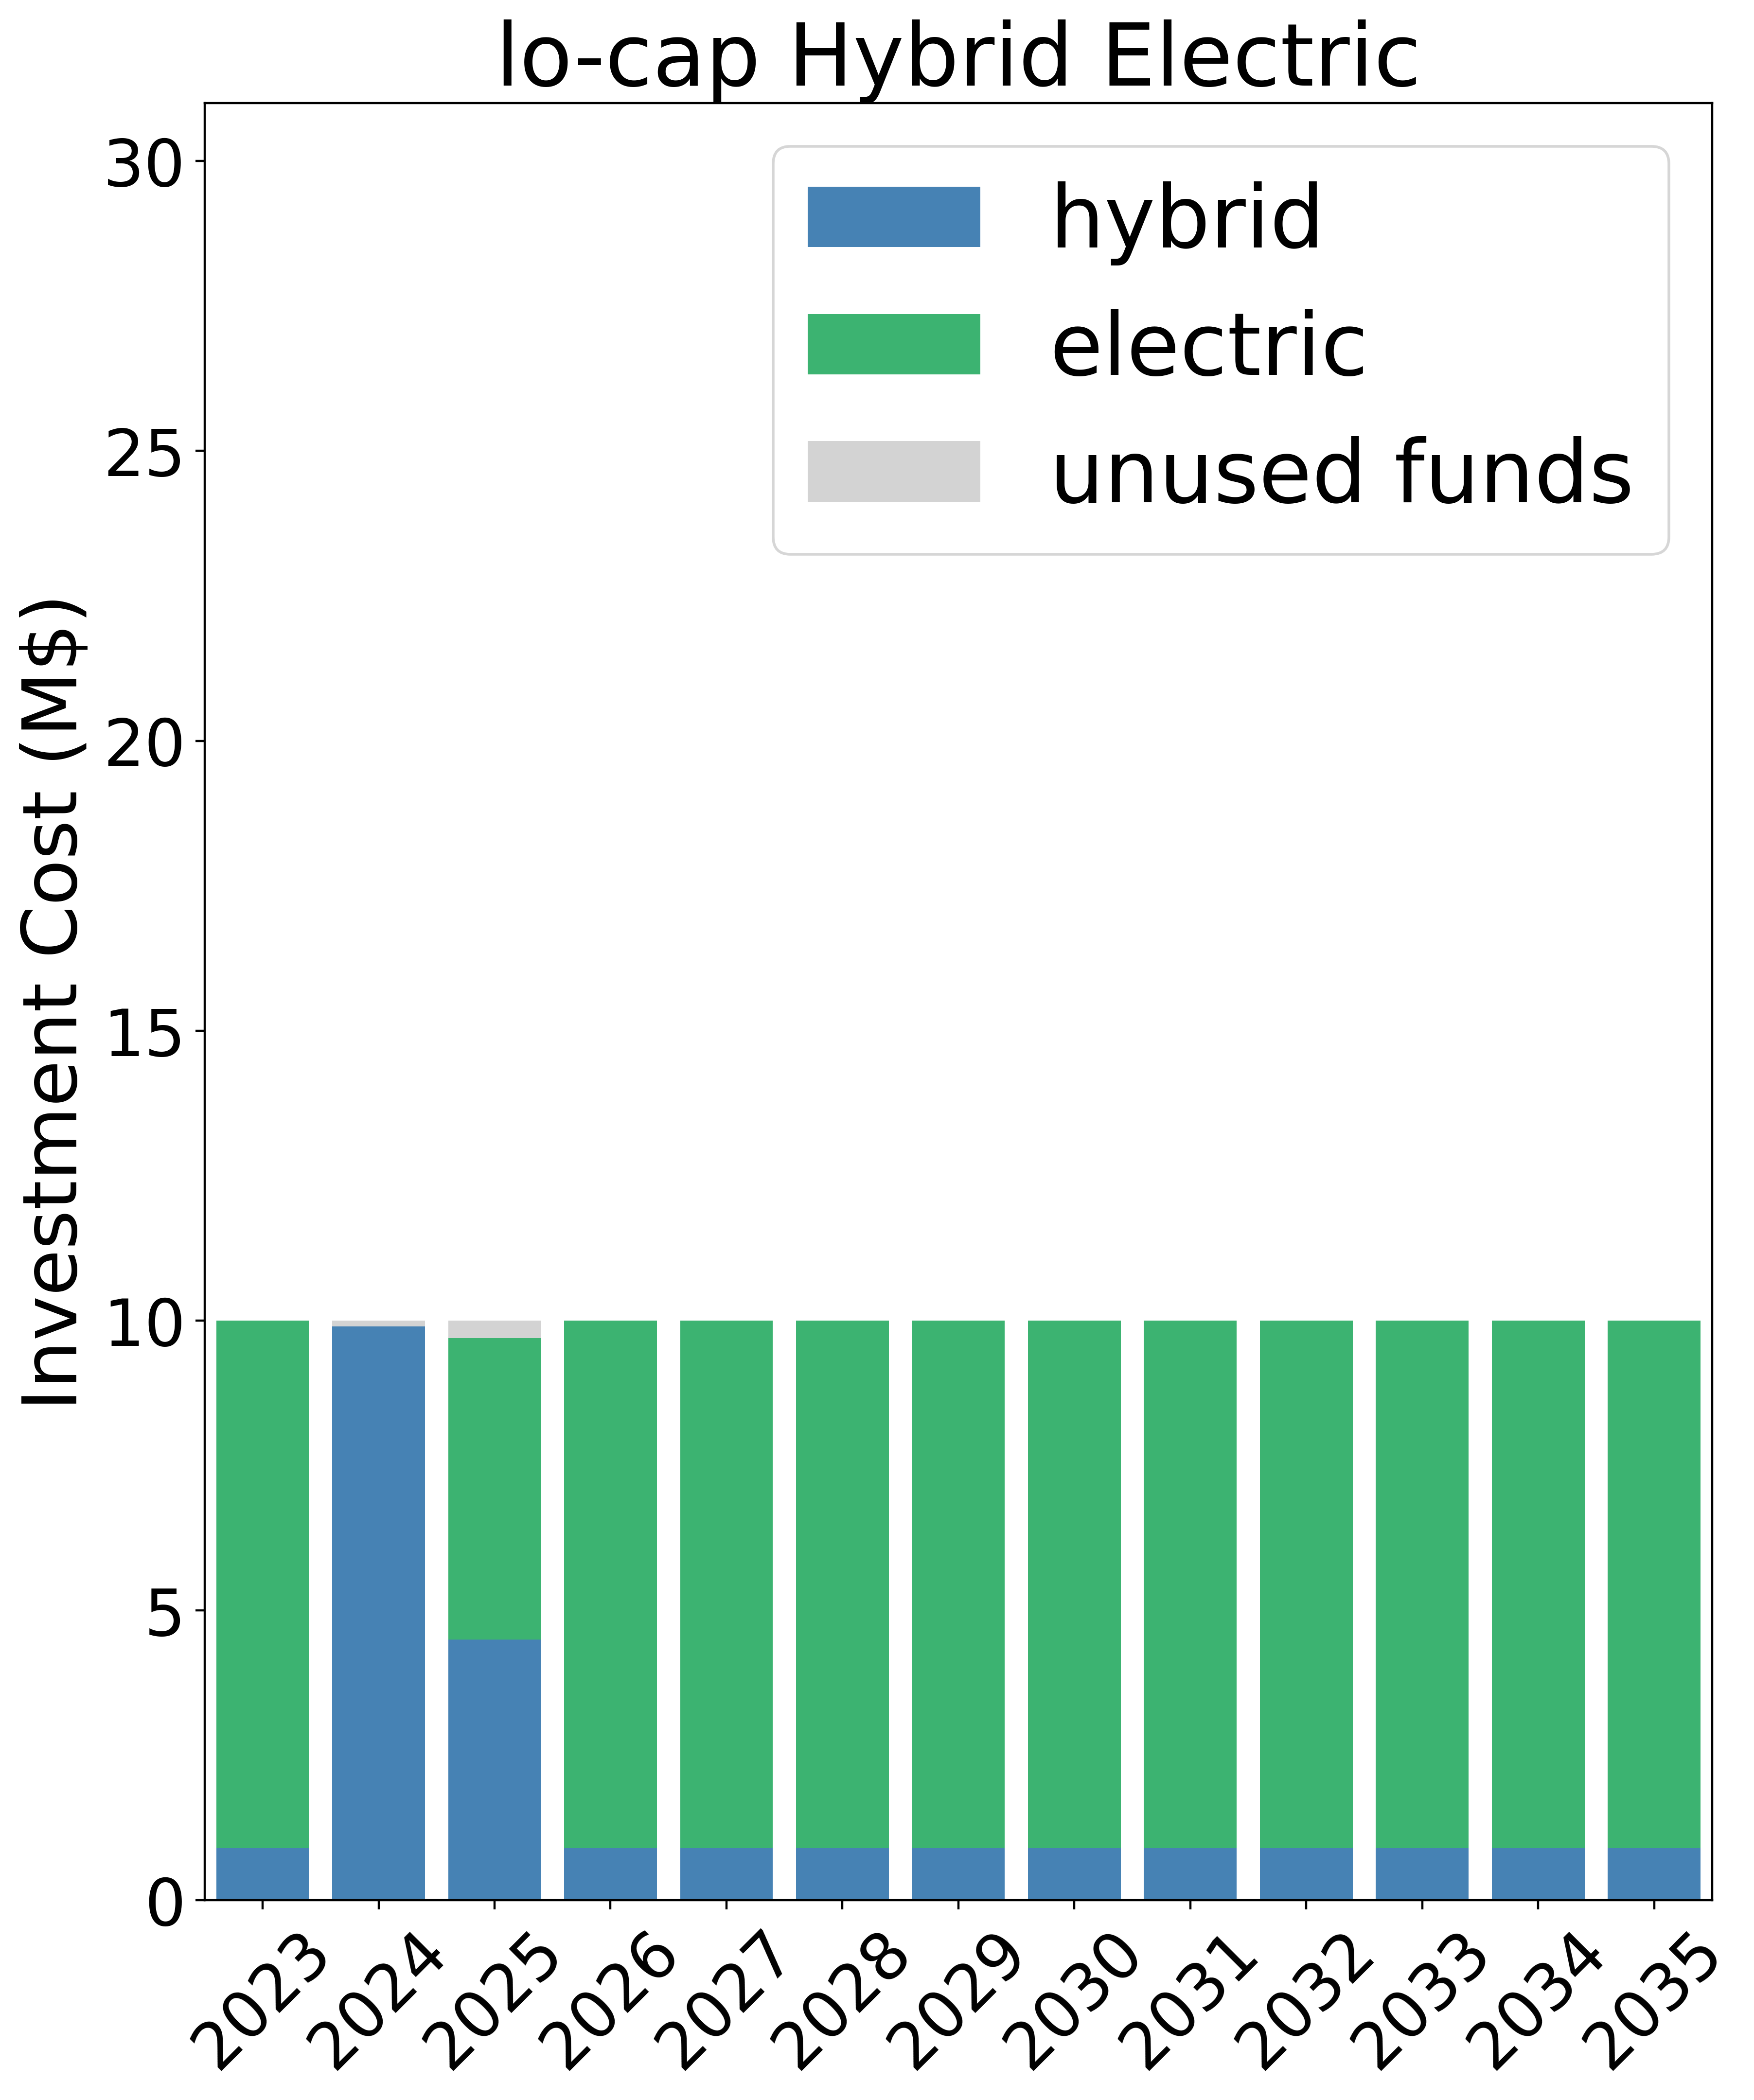

In [21]:
# Filter the dataframe 
lo_cap_hybrid_electric = merged_df.loc[merged_df['future'] == 'lo-cap Hybrid Electric']

# Calculate remaining investment
total_investment = 10  # Total investment in millions of dollars
lo_cap_hybrid_electric['Remaining Investment (M$)'] = total_investment - (
    lo_cap_hybrid_electric['HEB - Investment Cost (M$)'] + lo_cap_hybrid_electric['BEB - Investment Cost (M$)'])

# Create a stacked bar plot
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(lo_cap_hybrid_electric['Year'], lo_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')

plt.bar(lo_cap_hybrid_electric['Year'], lo_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        bottom=lo_cap_hybrid_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

# Adding the remaining investment
plt.bar(lo_cap_hybrid_electric['Year'], lo_cap_hybrid_electric['Remaining Investment (M$)'],
        bottom=lo_cap_hybrid_electric['HEB - Investment Cost (M$)'] + lo_cap_hybrid_electric['BEB - Investment Cost (M$)'],
        color=palette['Remaining'], label='unused funds')

plt.xticks(lo_cap_hybrid_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)

# Adding labels and title
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('lo-cap Hybrid Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [22]:
lo_cap_hybrid_electric['total_cost']=lo_cap_hybrid_electric['BEB - Investment Cost (M$)']+lo_cap_hybrid_electric['HEB - Investment Cost (M$)']
print('lo_cap_hybrid_electric_total_cost:',lo_cap_hybrid_electric['total_cost'].sum())

lo_cap_hybrid_electric_total_cost: 129.6


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\3081188425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_cap_hybrid_electric['total_cost']=lo_cap_hybrid_electric['BEB - Investment Cost (M$)']+lo_cap_hybrid_electric['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\1420408475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_electric['Remaining Investment (M$)'] = total_investment - (


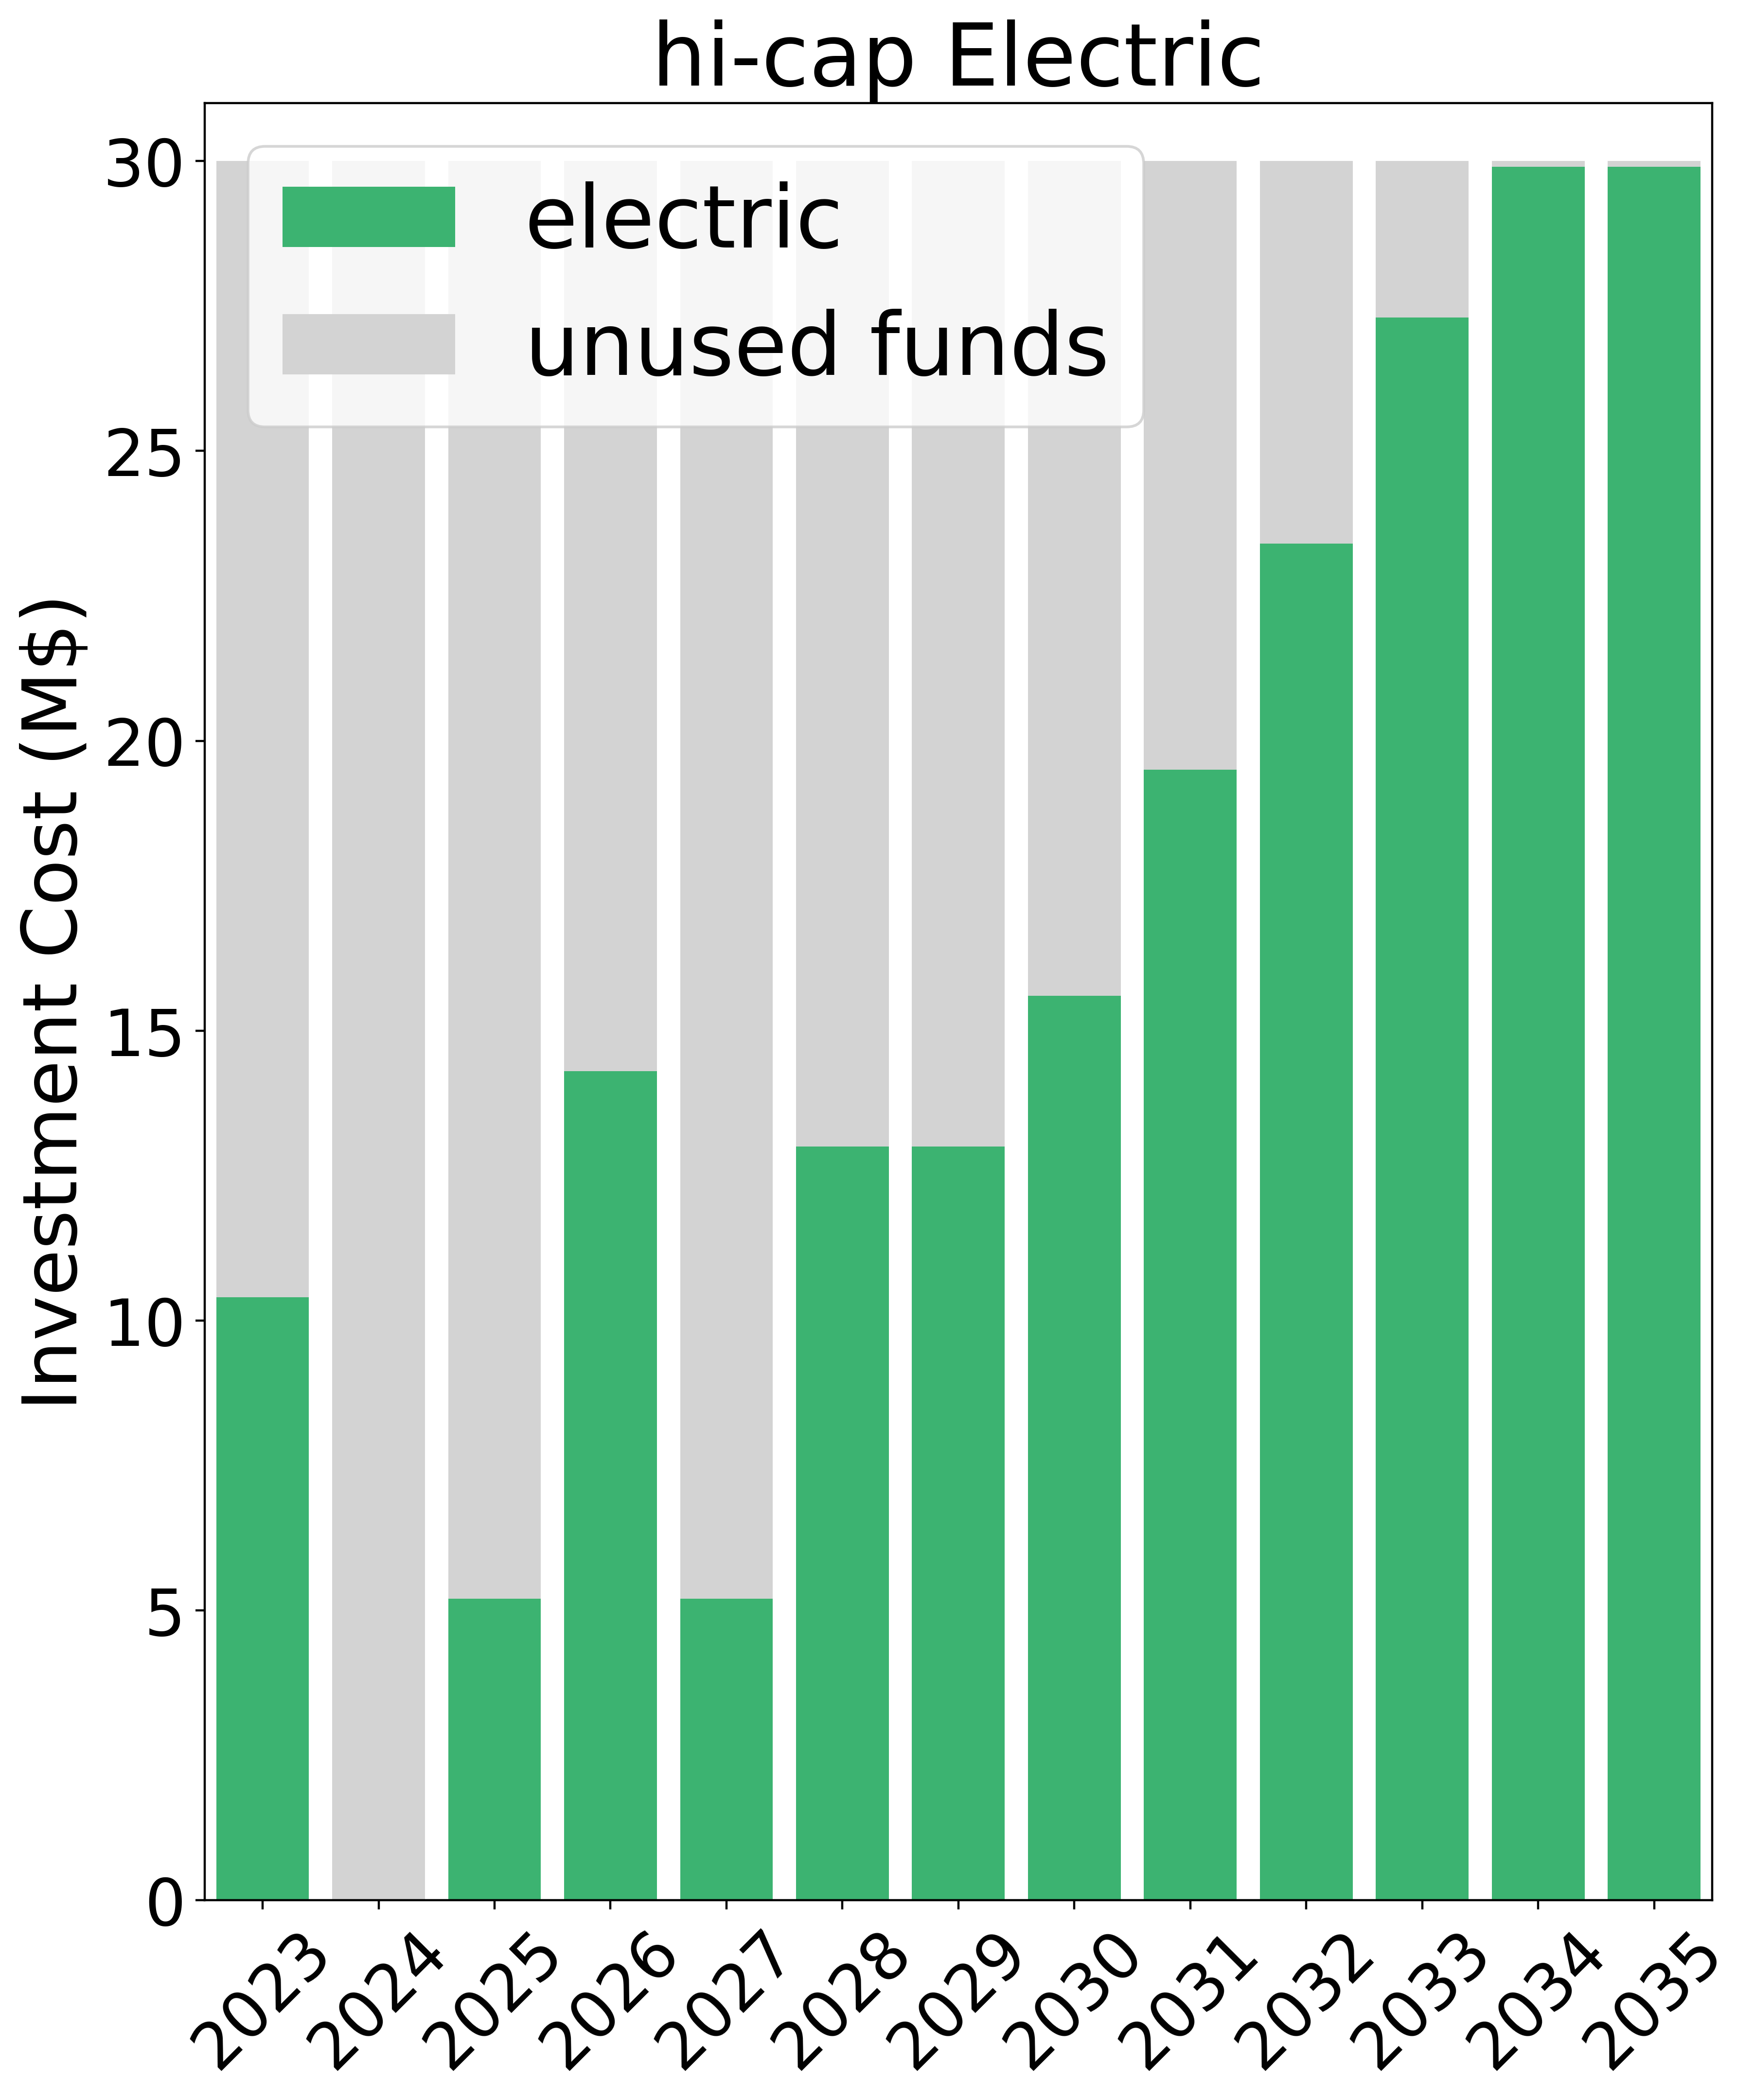

In [23]:
# Filter the dataframe for 'hi-cap Electric' future
hi_cap_electric = merged_df.loc[merged_df['future'] == 'hi-cap Electric']

# Calculate remaining investment
total_investment = 30  # Total investment in millions of dollars
hi_cap_electric['Remaining Investment (M$)'] = total_investment - (
    hi_cap_electric['HEB - Investment Cost (M$)'] + hi_cap_electric['BEB - Investment Cost (M$)'])

# Create a stacked bar plot
plt.figure(figsize=(10, 12), dpi=400)

plt.bar(hi_cap_electric['Year'], hi_cap_electric['BEB - Investment Cost (M$)'],
        bottom=hi_cap_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

# Adding the remaining investment
plt.bar(hi_cap_electric['Year'], hi_cap_electric['Remaining Investment (M$)'],
        bottom=hi_cap_electric['HEB - Investment Cost (M$)'] + hi_cap_electric['BEB - Investment Cost (M$)'],
        color=palette['Remaining'], label='unused funds')

plt.xticks(hi_cap_hybrid_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)


# Adding labels and title
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [24]:
hi_cap_electric['total_cost']=hi_cap_electric['BEB - Investment Cost (M$)']+hi_cap_electric['HEB - Investment Cost (M$)']
print('hi_cap_electric_total_cost:',hi_cap_electric['total_cost'].sum())

hi_cap_electric_total_cost: 206.70000000000002


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\612983904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_electric['total_cost']=hi_cap_electric['BEB - Investment Cost (M$)']+hi_cap_electric['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\682688333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_cap_electric['Remaining Investment (M$)'] = total_investment - (


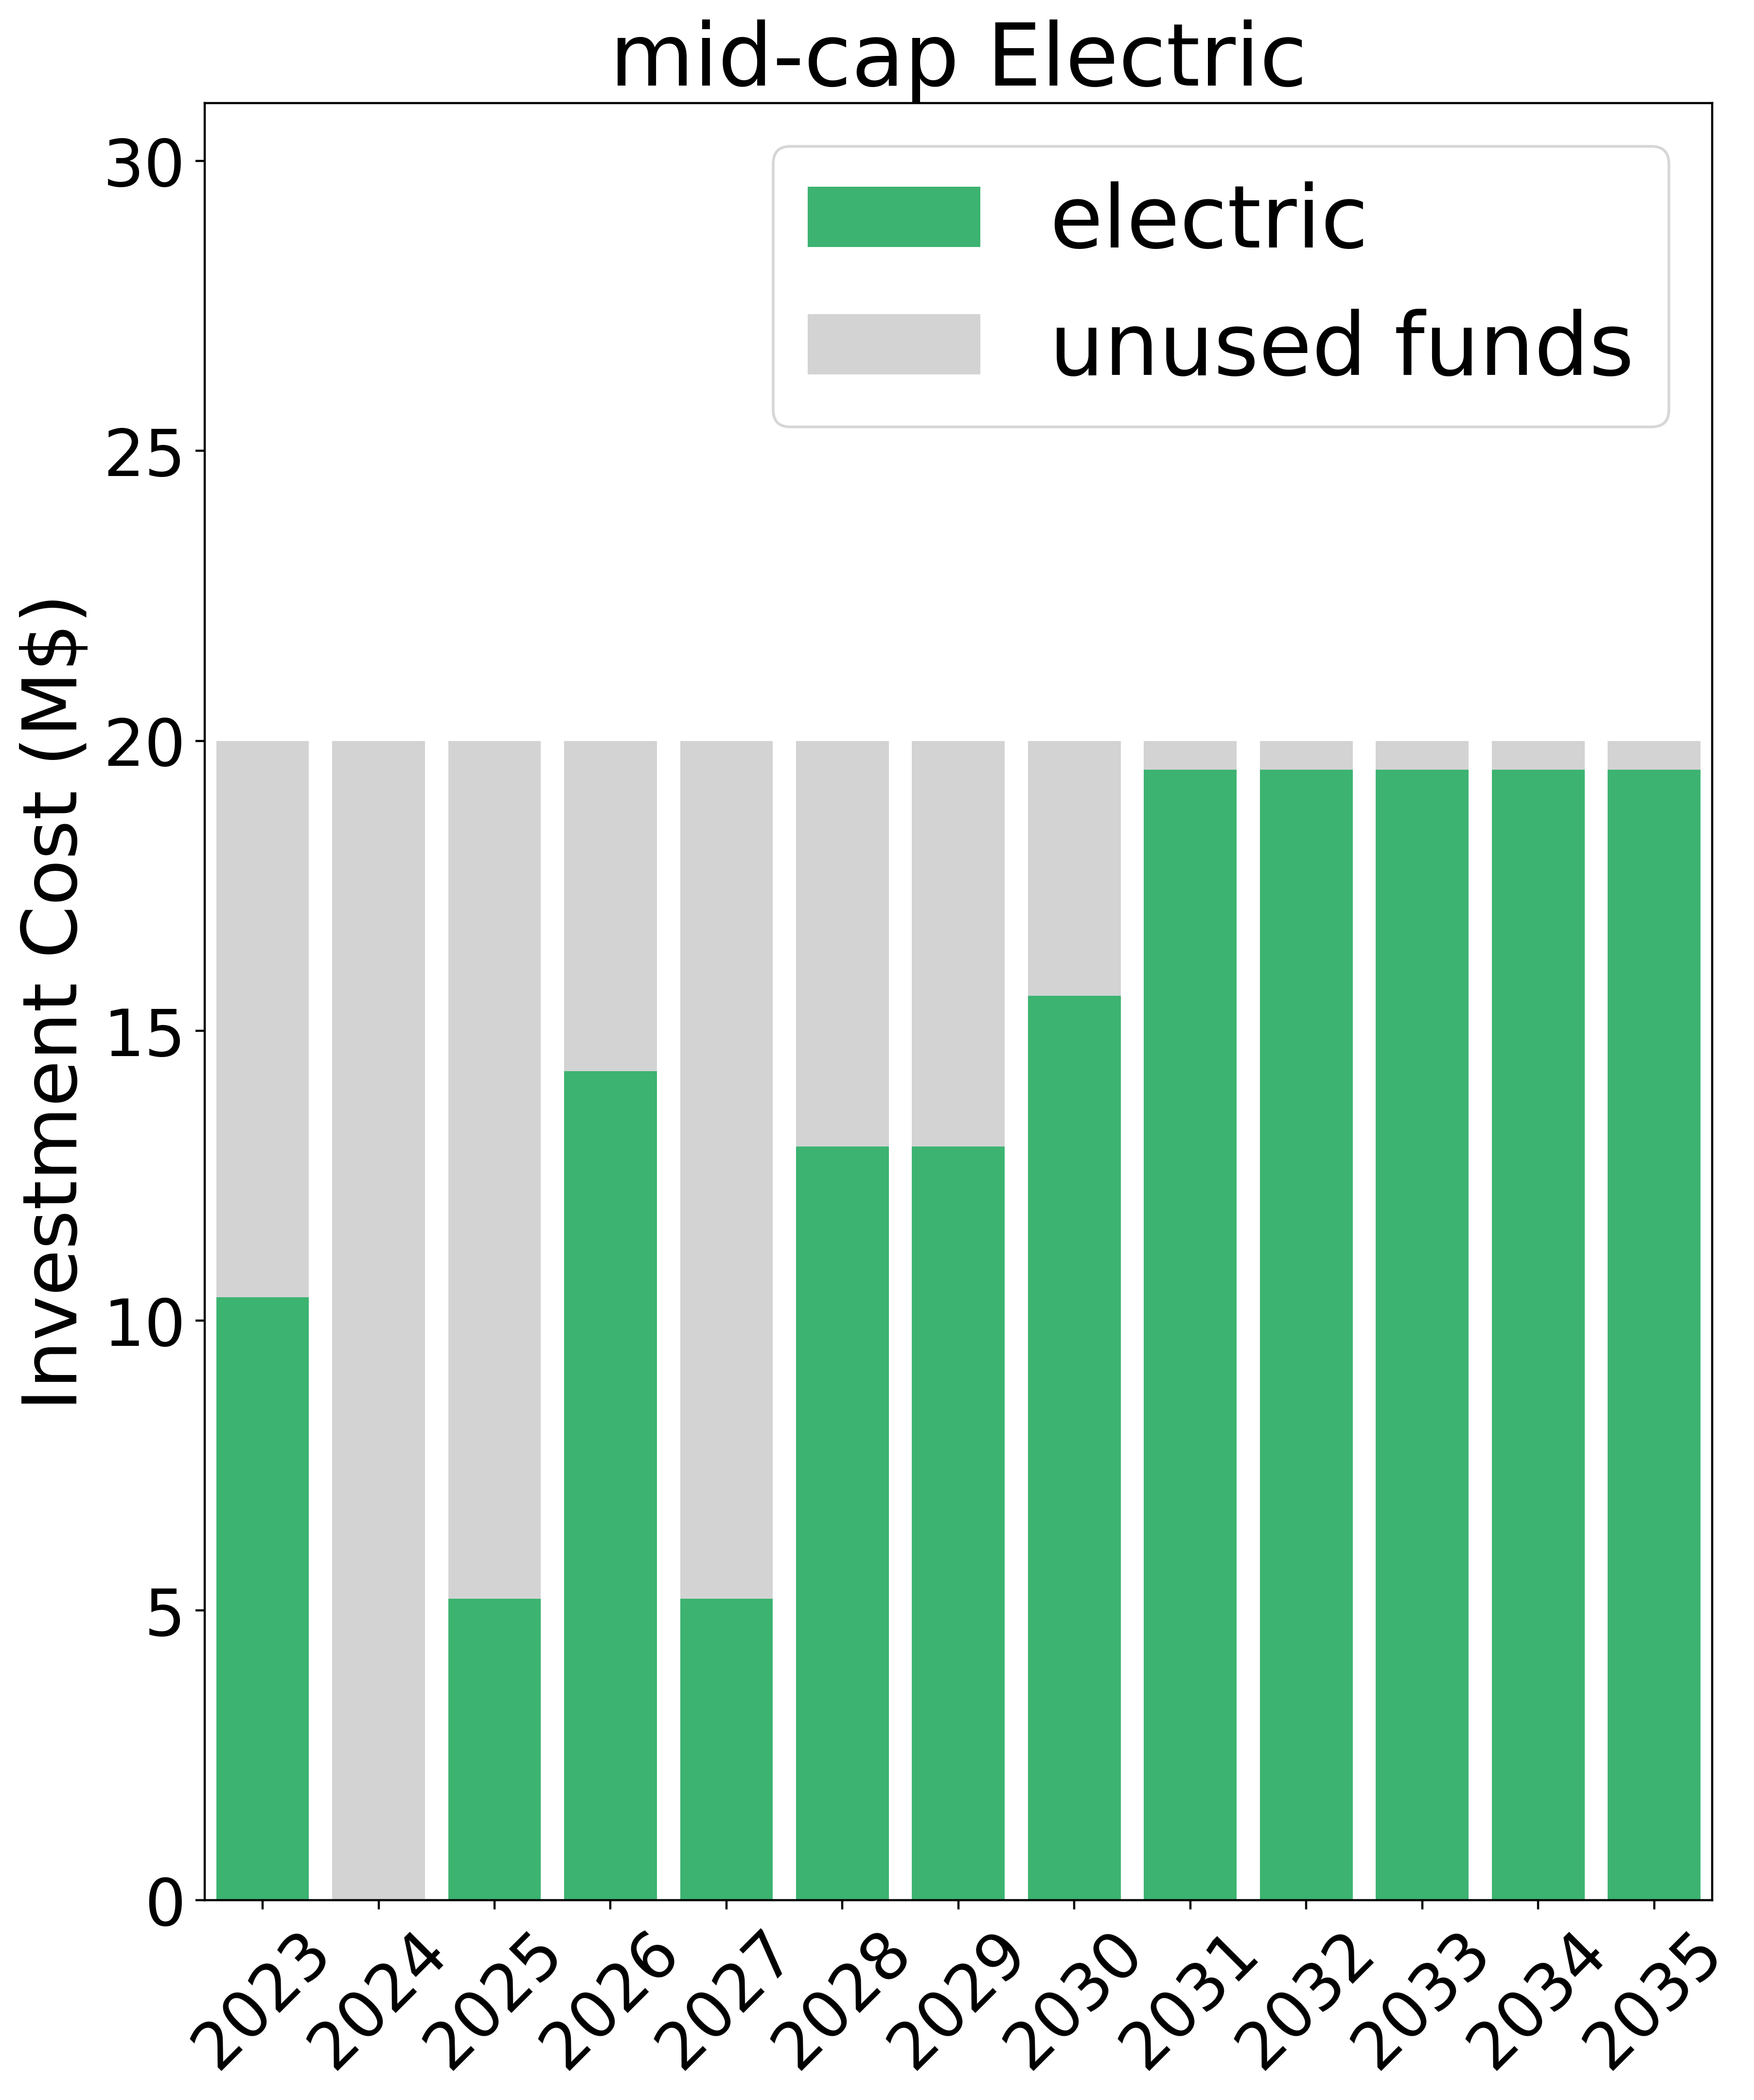

In [25]:
# Filter the dataframe for 'hi-cap Electric' future
mid_cap_electric = merged_df.loc[merged_df['future'] == 'mid-cap Electric']

# Calculate remaining investment
total_investment = 20  # Total investment in millions of dollars
mid_cap_electric['Remaining Investment (M$)'] = total_investment - (
    mid_cap_electric['HEB - Investment Cost (M$)'] + mid_cap_electric['BEB - Investment Cost (M$)'])

# Create a stacked bar plot
plt.figure(figsize=(10, 12), dpi=400)

plt.bar(mid_cap_electric['Year'], mid_cap_electric['BEB - Investment Cost (M$)'],
        bottom=mid_cap_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

# Adding the remaining investment
plt.bar(mid_cap_electric['Year'], mid_cap_electric['Remaining Investment (M$)'],
        bottom=mid_cap_electric['HEB - Investment Cost (M$)'] + mid_cap_electric['BEB - Investment Cost (M$)'],
        color=palette['Remaining'], label='unused funds')

plt.xticks(mid_cap_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)


# Adding labels and title
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('mid-cap Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [26]:
mid_cap_electric['total_cost']=mid_cap_electric['BEB - Investment Cost (M$)']+mid_cap_electric['HEB - Investment Cost (M$)']
print('mid_cap_electric_total_cost:',mid_cap_electric['total_cost'].sum())

mid_cap_electric_total_cost: 174.2


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\994124717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_cap_electric['total_cost']=mid_cap_electric['BEB - Investment Cost (M$)']+mid_cap_electric['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\200645936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_cap_electric['Remaining Investment (M$)'] = total_investment - (


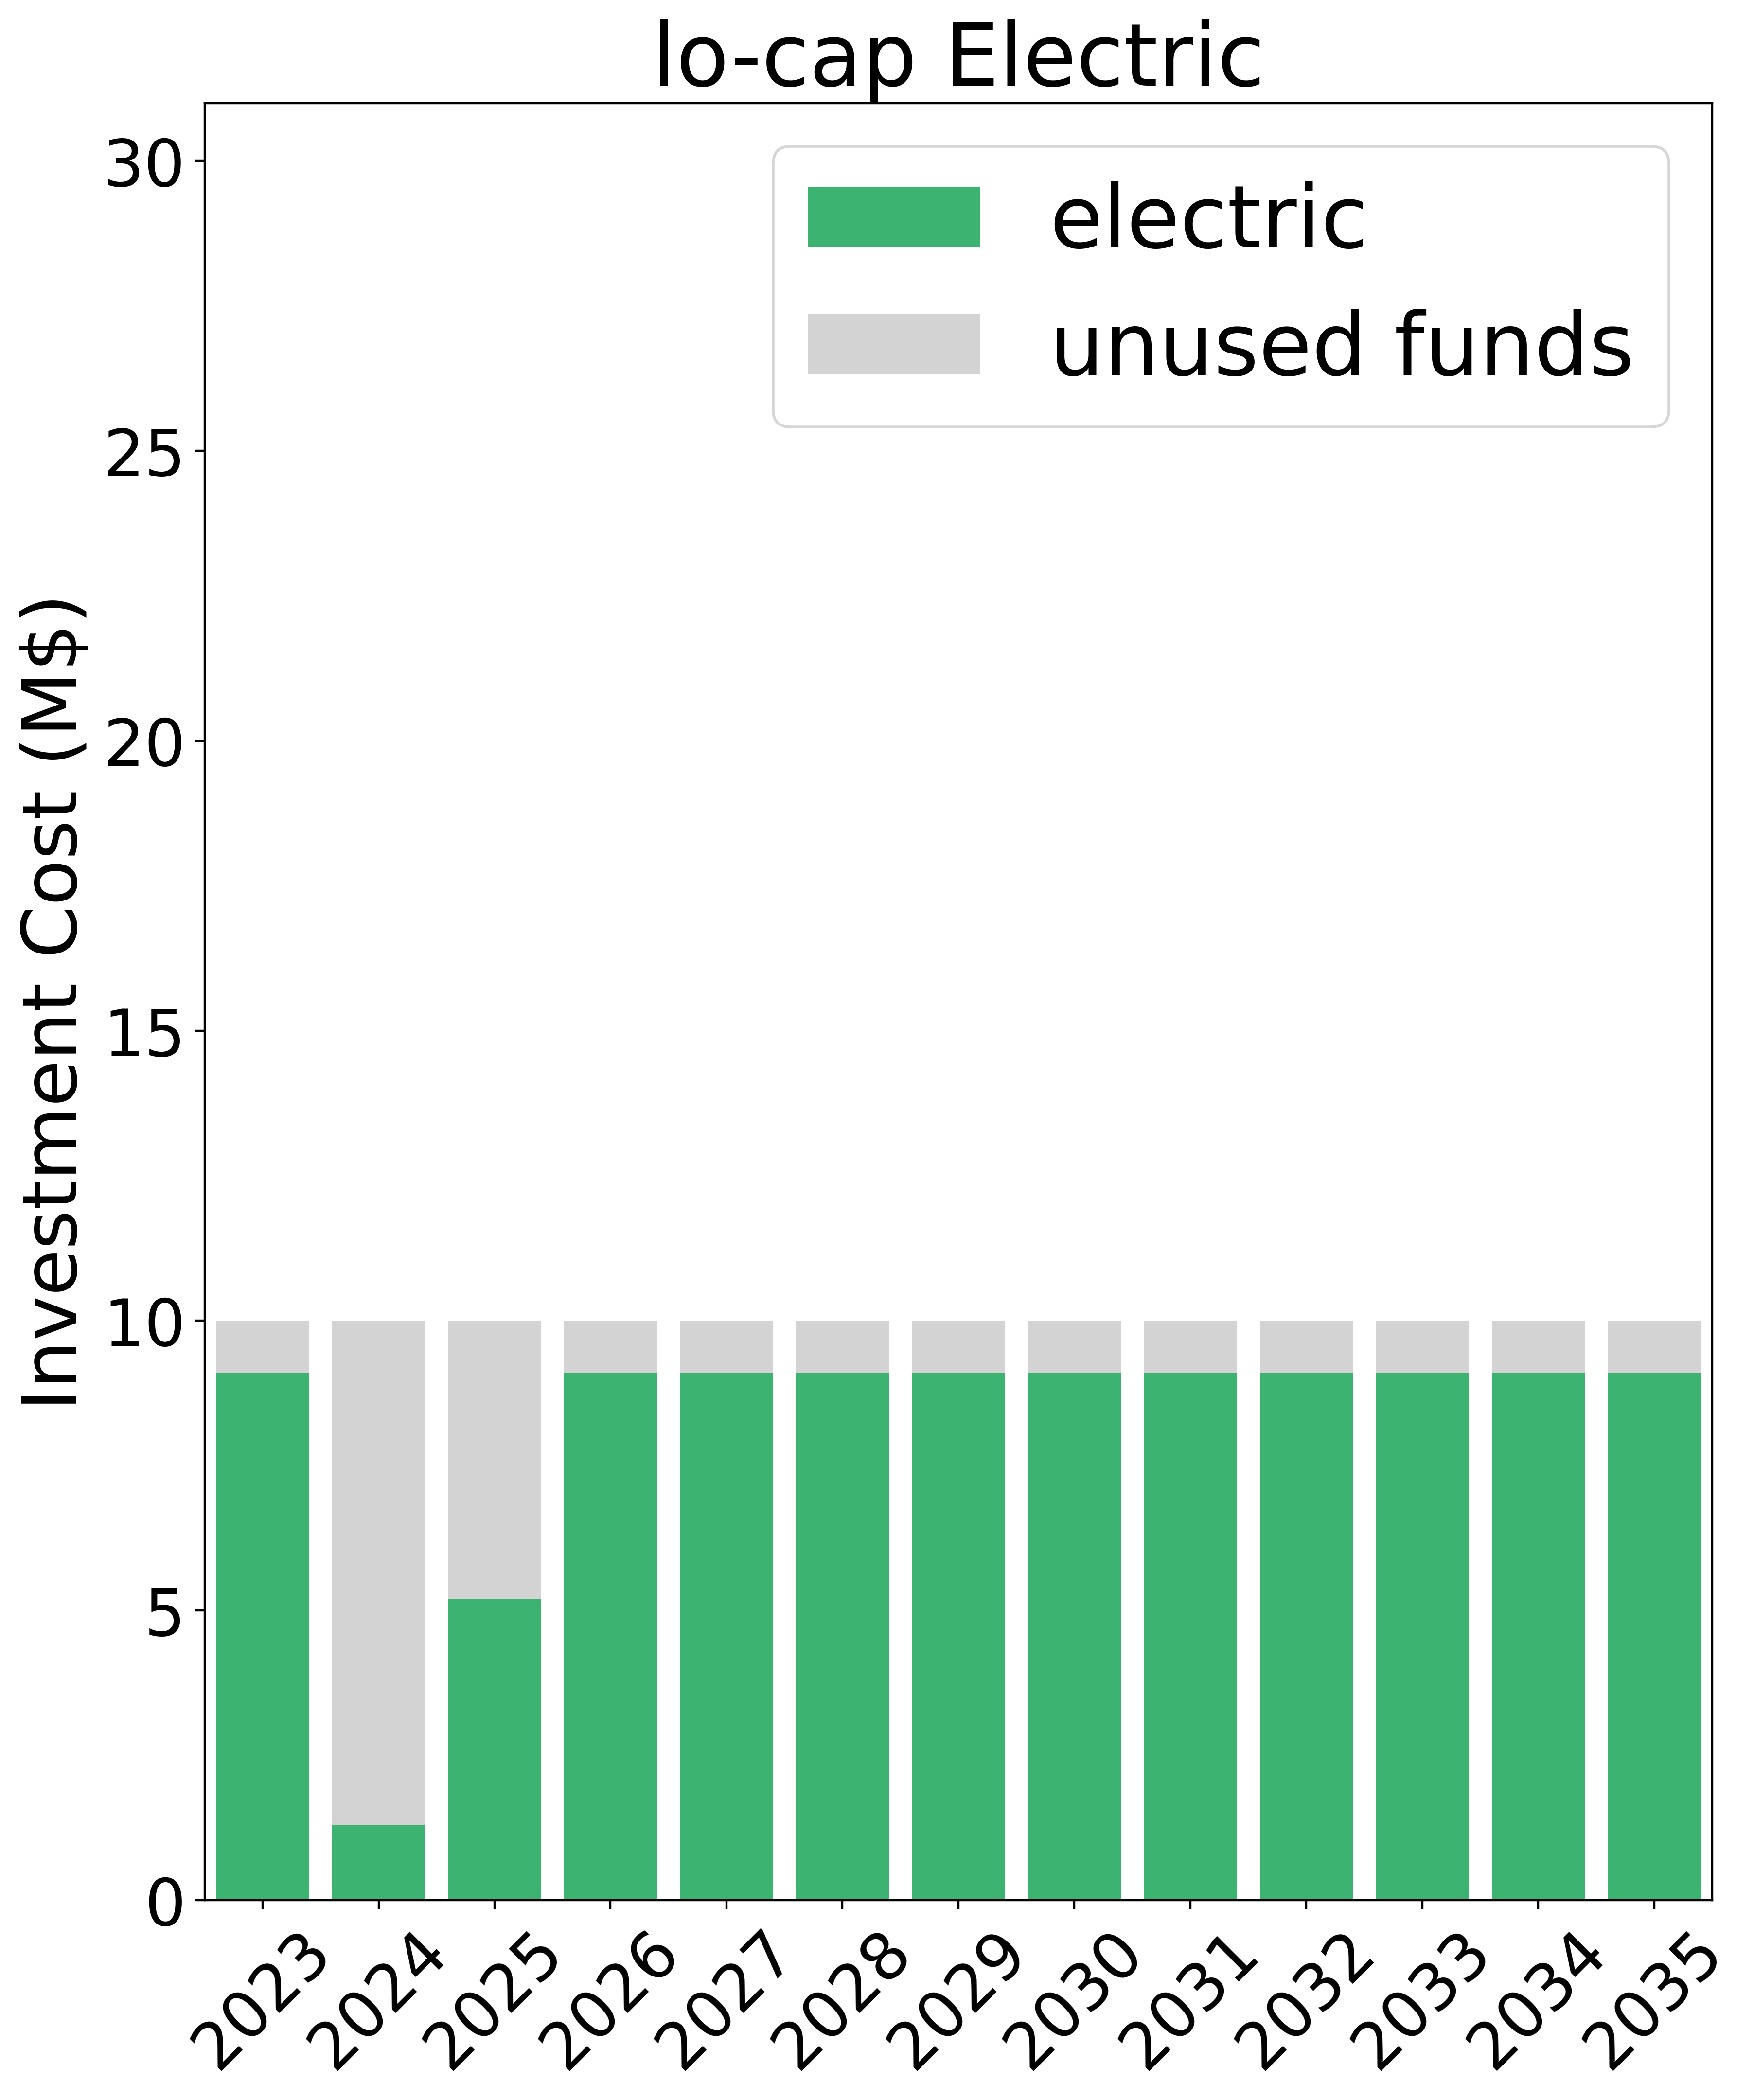

In [27]:
# Filter the dataframe for 'hi-cap Electric' future
lo_cap_electric = merged_df.loc[merged_df['future'] == 'lo-cap Electric']

# Calculate remaining investment
total_investment = 10  # Total investment in millions of dollars
lo_cap_electric['Remaining Investment (M$)'] = total_investment - (
    lo_cap_electric['HEB - Investment Cost (M$)'] + lo_cap_electric['BEB - Investment Cost (M$)'])

# Create a stacked bar plot
plt.figure(figsize=(10, 12), dpi=400)

plt.bar(lo_cap_electric['Year'], lo_cap_electric['BEB - Investment Cost (M$)'],
        bottom=lo_cap_electric['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='electric')

# Adding the remaining investment
plt.bar(lo_cap_electric['Year'], lo_cap_electric['Remaining Investment (M$)'],
        bottom=lo_cap_electric['HEB - Investment Cost (M$)'] + lo_cap_electric['BEB - Investment Cost (M$)'],
        color=palette['Remaining'], label='unused funds')

plt.xticks(lo_cap_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)


# Adding labels and title
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('lo-cap Electric', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [28]:
lo_cap_electric['total_cost']=lo_cap_electric['BEB - Investment Cost (M$)']+lo_cap_electric['HEB - Investment Cost (M$)']
print('lo_cap_electric_total_cost:',lo_cap_electric['total_cost'].sum())

lo_cap_electric_total_cost: 106.59999999999998


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\2210438131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_cap_electric['total_cost']=lo_cap_electric['BEB - Investment Cost (M$)']+lo_cap_electric['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\2549595943.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_hybrid['Remaining Investment (M$)'] = total_investment - (


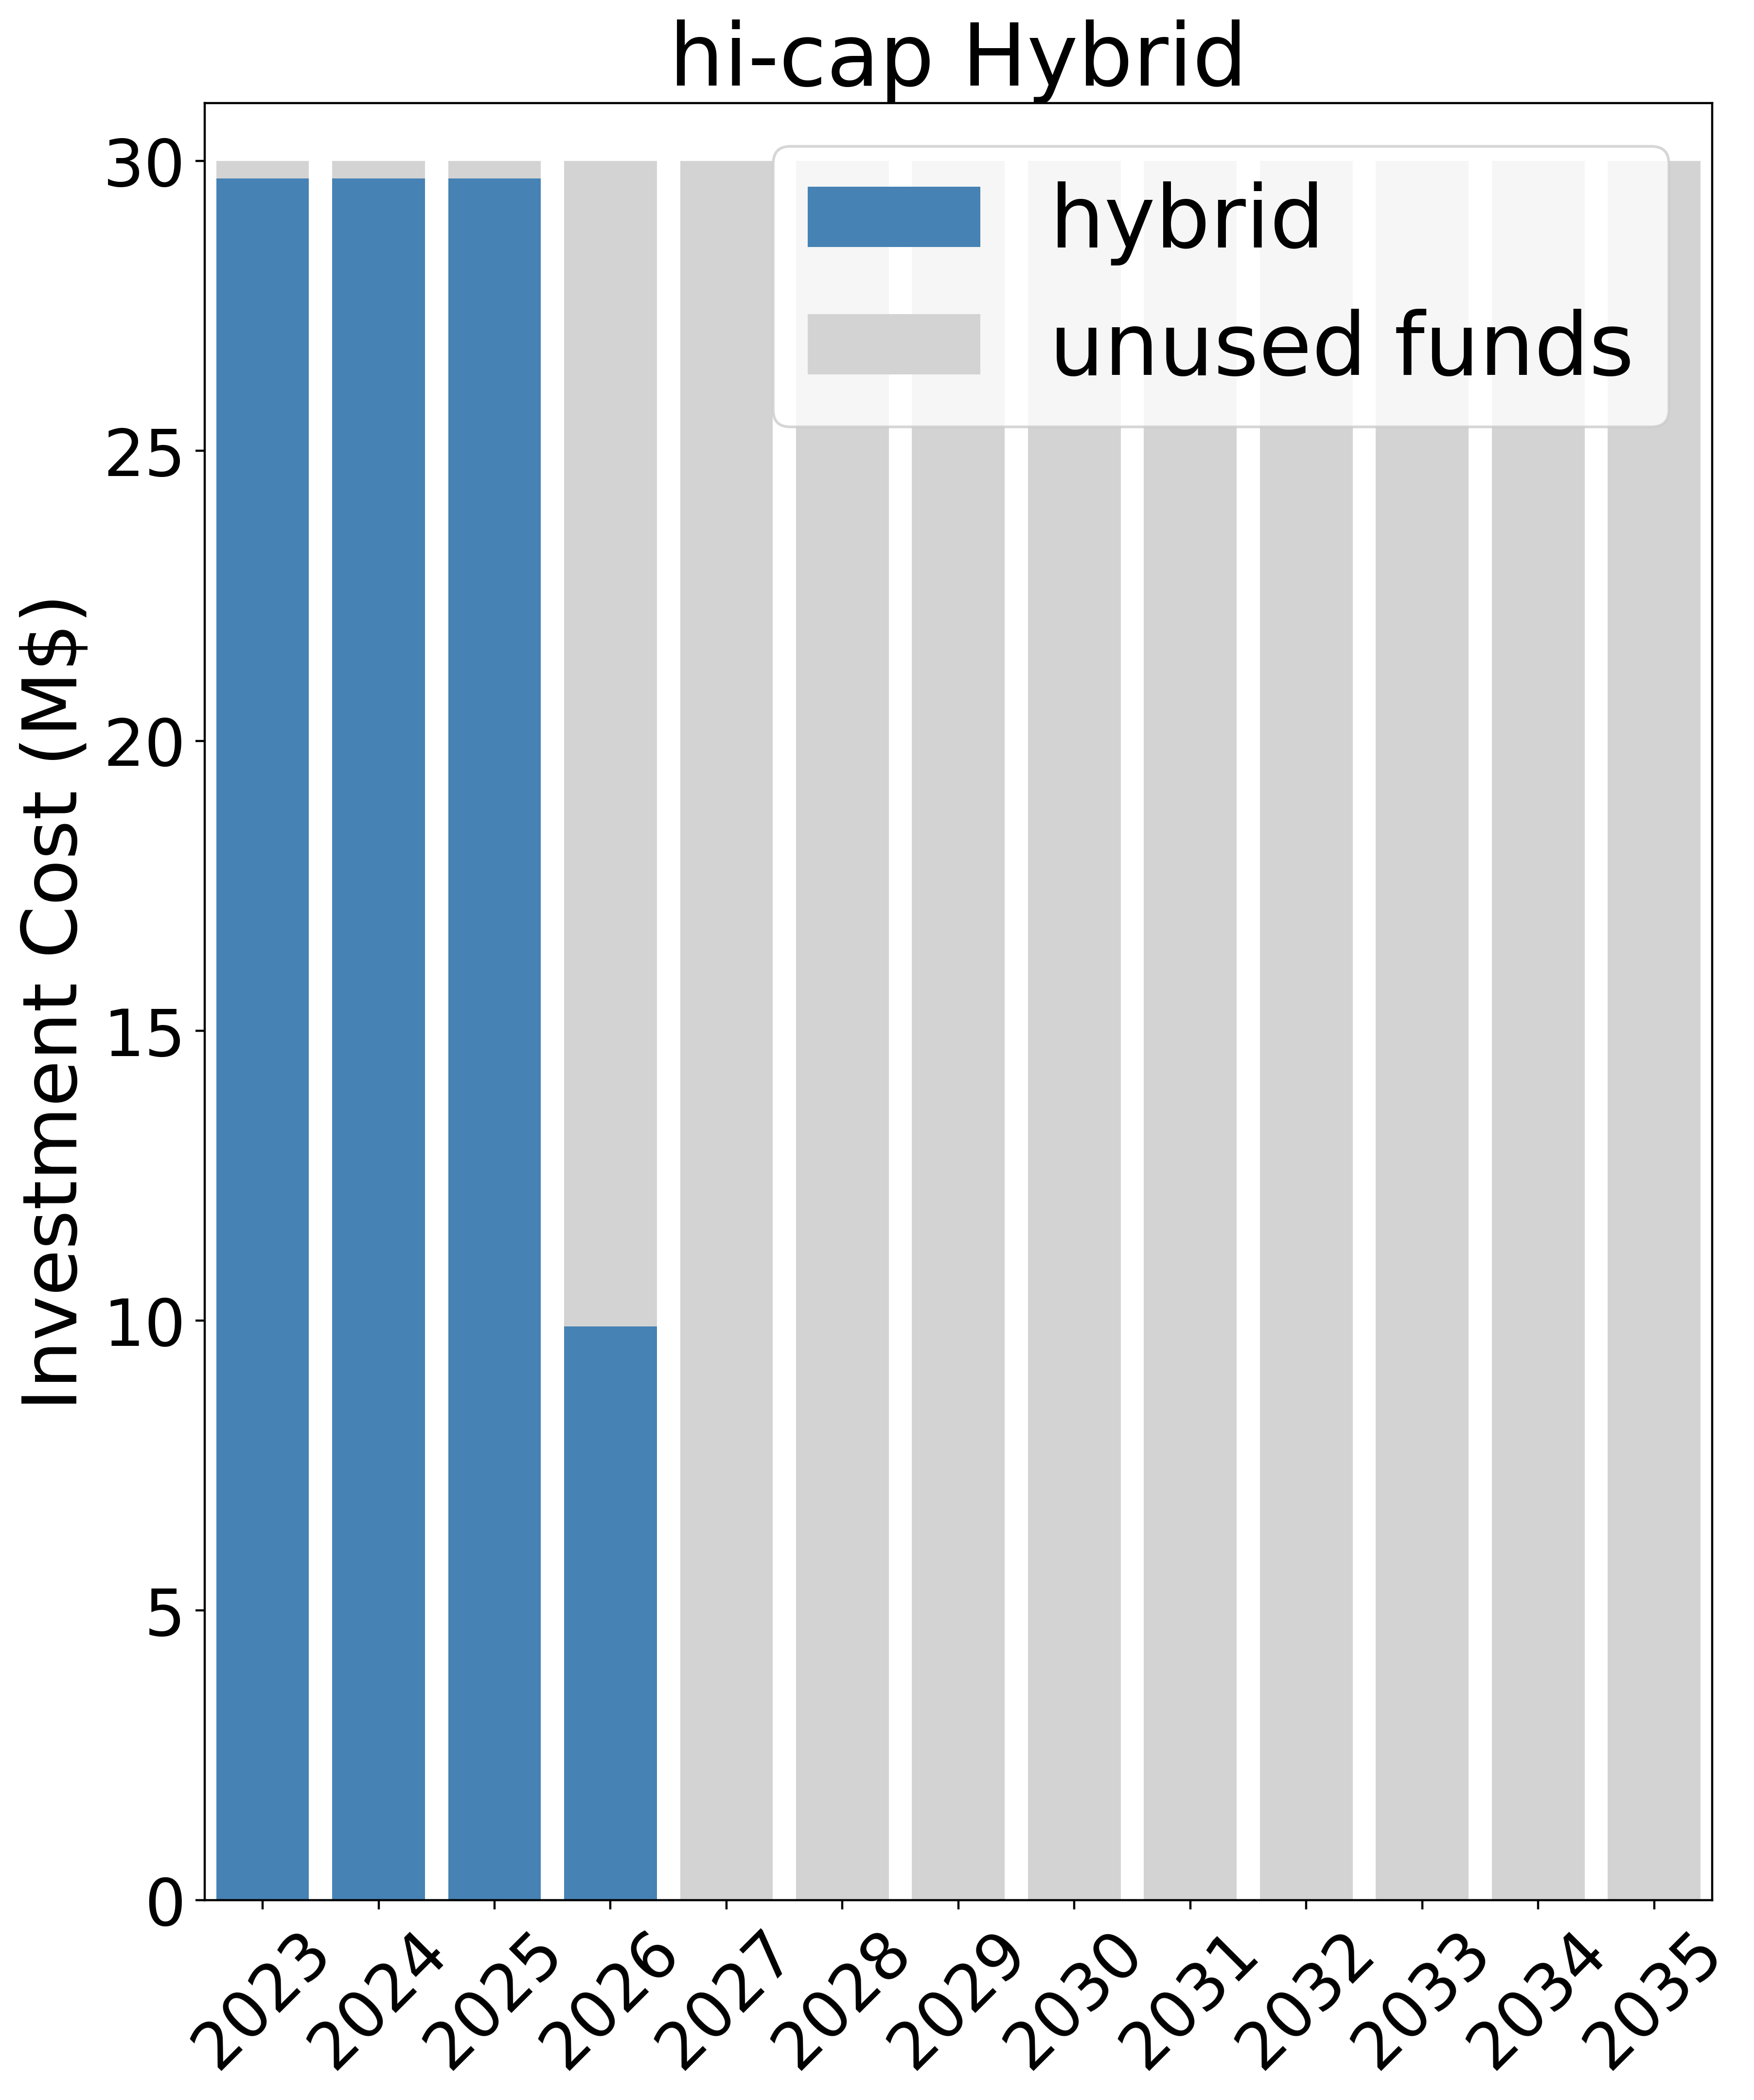

In [29]:
# Define the color palette
palette = {
    'HEB': 'steelblue',
    'Remaining': 'lightgray'  # Color for the remaining investment
}

# Filter the dataframe for 'hi-cap Hybrid Electric' future
hi_cap_hybrid = merged_df.loc[merged_df['future'] == 'hi-cap Hybrid']

# Calculate remaining investment
total_investment = 30  # Total investment in millions of dollars
hi_cap_hybrid['Remaining Investment (M$)'] = total_investment - (
    hi_cap_hybrid['HEB - Investment Cost (M$)'] )

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(hi_cap_hybrid['Year'], hi_cap_hybrid['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')
plt.bar(hi_cap_hybrid['Year'], hi_cap_hybrid['Remaining Investment (M$)'],
        bottom=hi_cap_hybrid['HEB - Investment Cost (M$)'] ,
        color=palette['Remaining'], label='unused funds')

plt.xticks(lo_cap_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('hi-cap Hybrid', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [30]:
hi_cap_hybrid['total_cost']=hi_cap_hybrid['BEB - Investment Cost (M$)']+hi_cap_hybrid['HEB - Investment Cost (M$)']
print('hi_cap_hybrid_total_cost:',hi_cap_hybrid['total_cost'].sum())

hi_cap_hybrid_total_cost: 99.0


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\2295971197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_cap_hybrid['total_cost']=hi_cap_hybrid['BEB - Investment Cost (M$)']+hi_cap_hybrid['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\1604453303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_cap_hybrid['Remaining Investment (M$)'] = total_investment - (


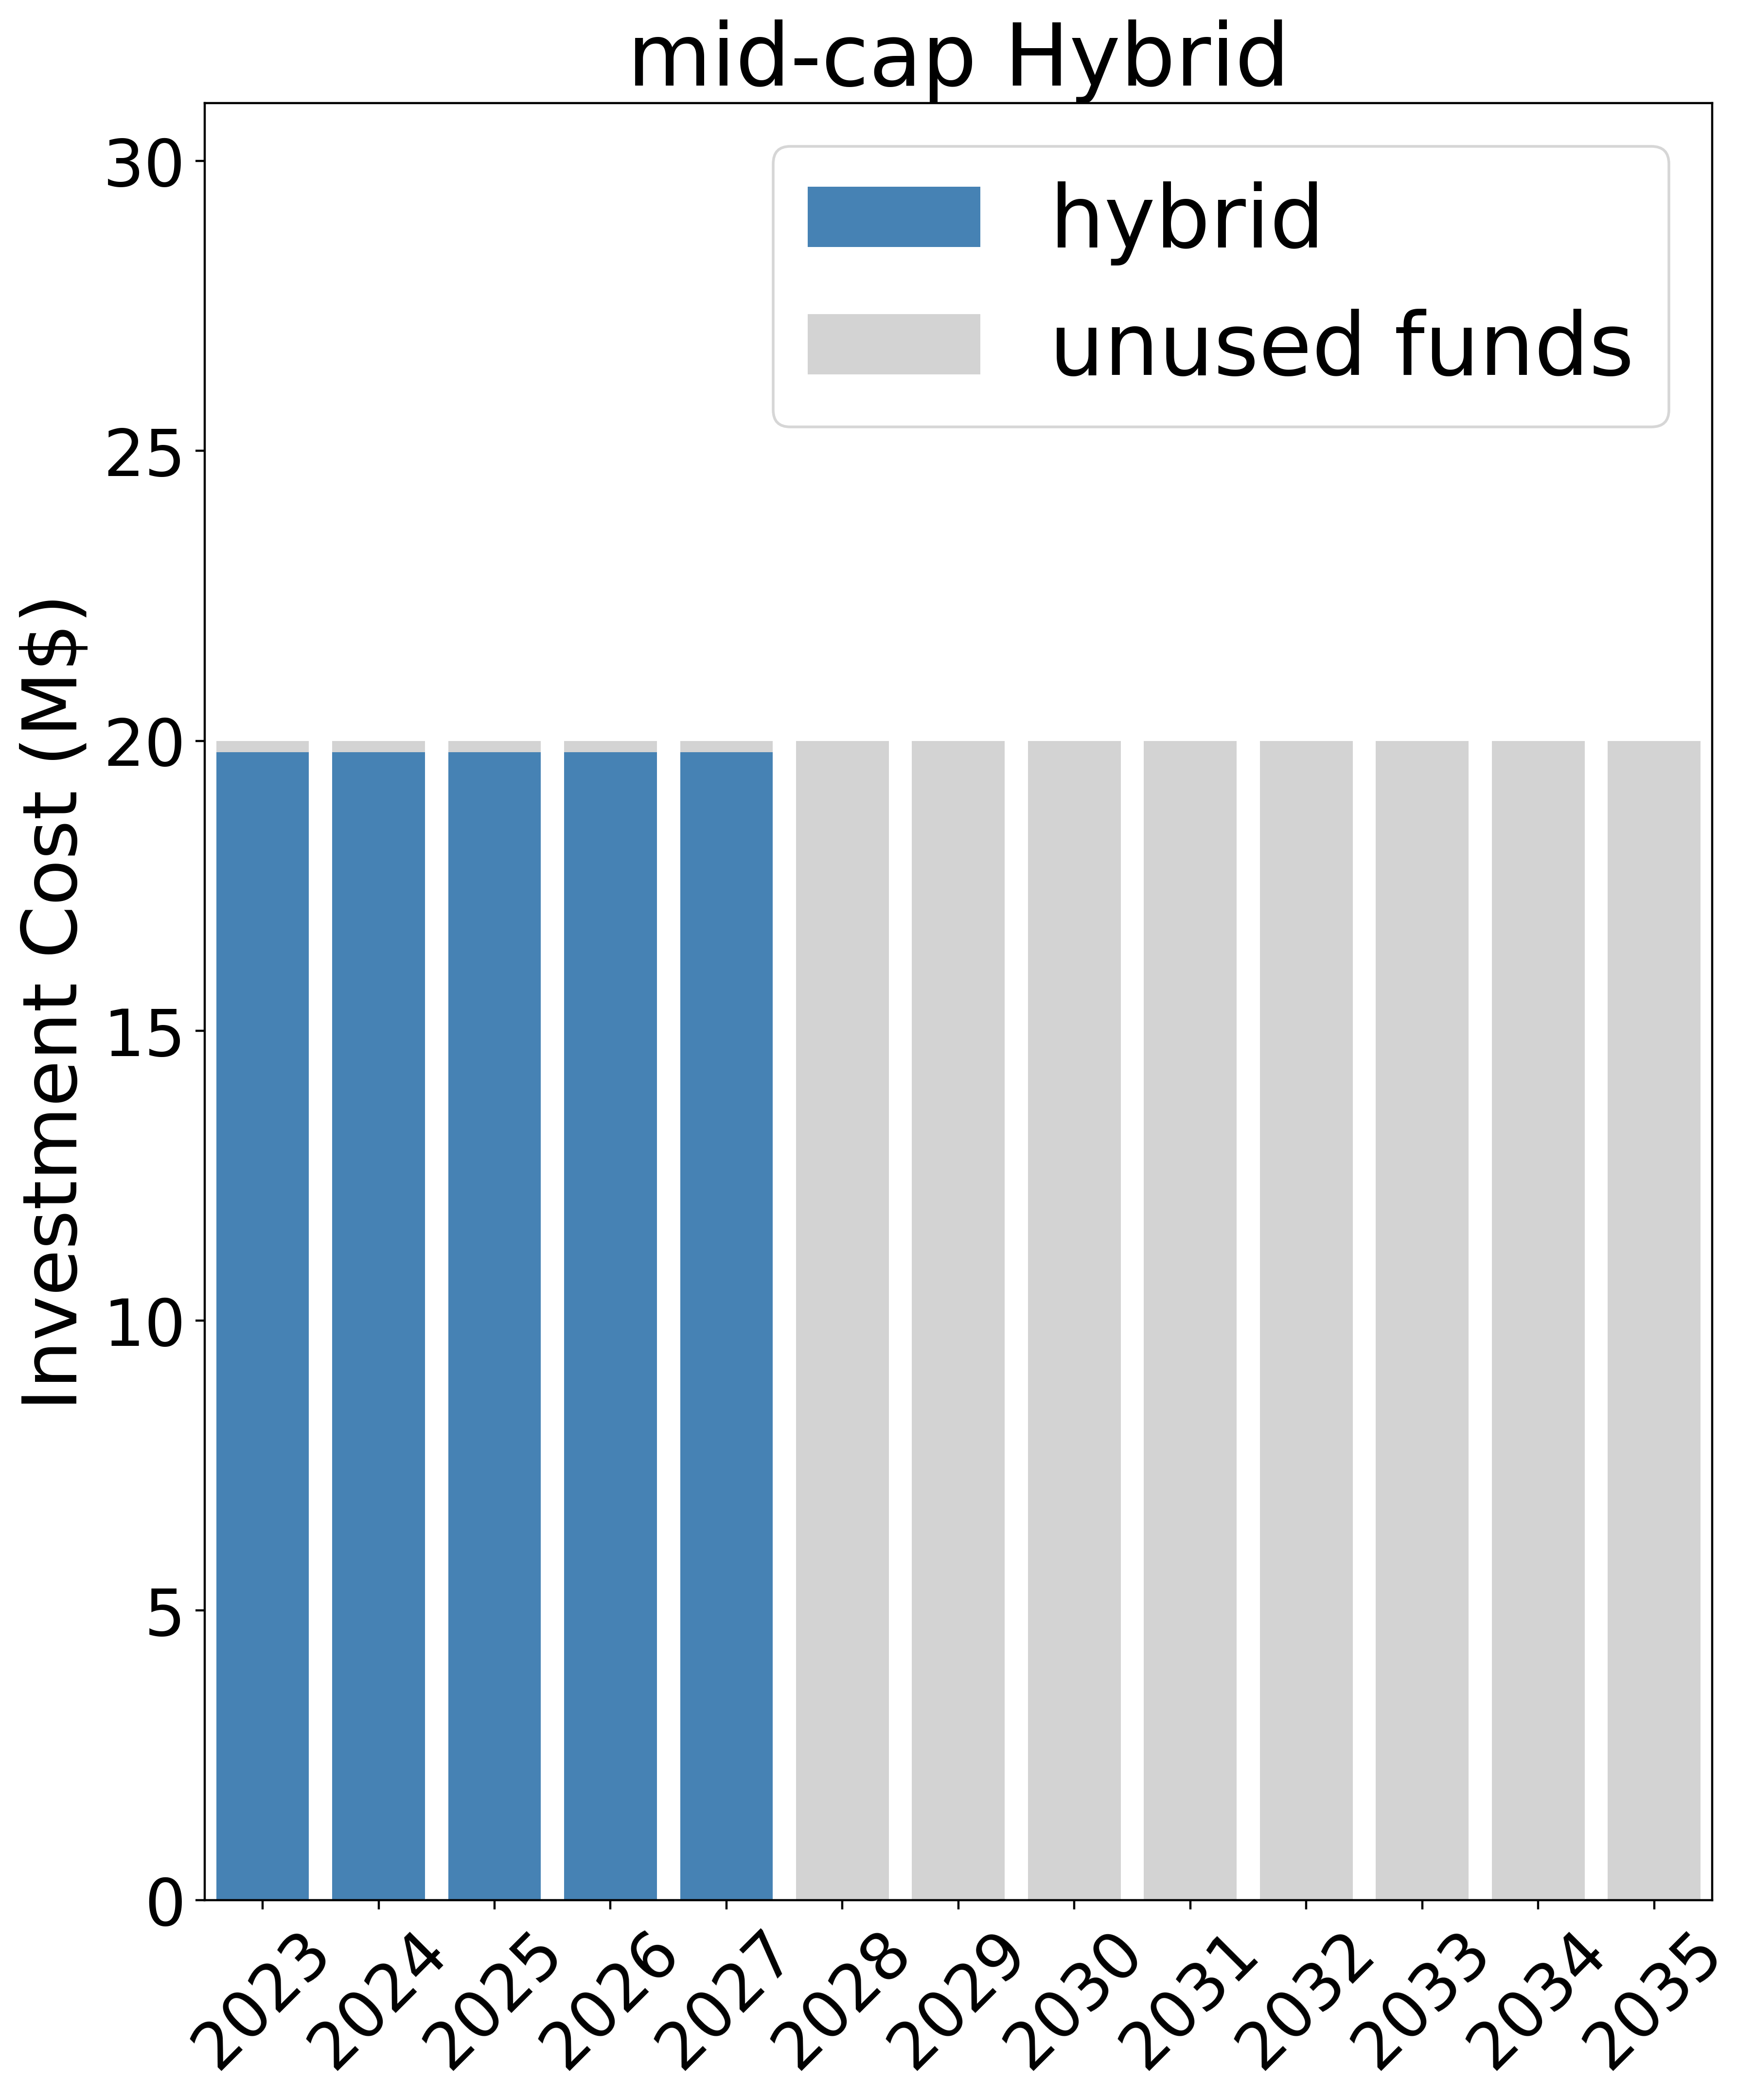

In [31]:
# Filter the dataframe for 'mid-cap Hybrid Electric' future
mid_cap_hybrid = merged_df.loc[merged_df['future'] == 'mid-cap Hybrid']

# Calculate remaining investment
total_investment = 20  # Total investment in millions of dollars
mid_cap_hybrid['Remaining Investment (M$)'] = total_investment - (
   mid_cap_hybrid['HEB - Investment Cost (M$)'] )

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(mid_cap_hybrid['Year'], mid_cap_hybrid['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')
plt.bar(mid_cap_hybrid['Year'], mid_cap_hybrid['Remaining Investment (M$)'],
        bottom=mid_cap_hybrid['HEB - Investment Cost (M$)'] ,
        color=palette['Remaining'], label='unused funds')

plt.xticks(lo_cap_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('mid-cap Hybrid', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [32]:
mid_cap_hybrid['total_cost']=mid_cap_hybrid['BEB - Investment Cost (M$)']+mid_cap_hybrid['HEB - Investment Cost (M$)']
print('mid_cap_hybrid_total_cost:',mid_cap_hybrid['total_cost'].sum())
print('Remaining Investment (M$):',mid_cap_hybrid['Remaining Investment (M$)'].sum())

mid_cap_hybrid_total_cost: 99.0
Remaining Investment (M$): 181.0


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\1246872949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_cap_hybrid['total_cost']=mid_cap_hybrid['BEB - Investment Cost (M$)']+mid_cap_hybrid['HEB - Investment Cost (M$)']


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\2715060099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_cap_hybrid['Remaining Investment (M$)'] = total_investment - (


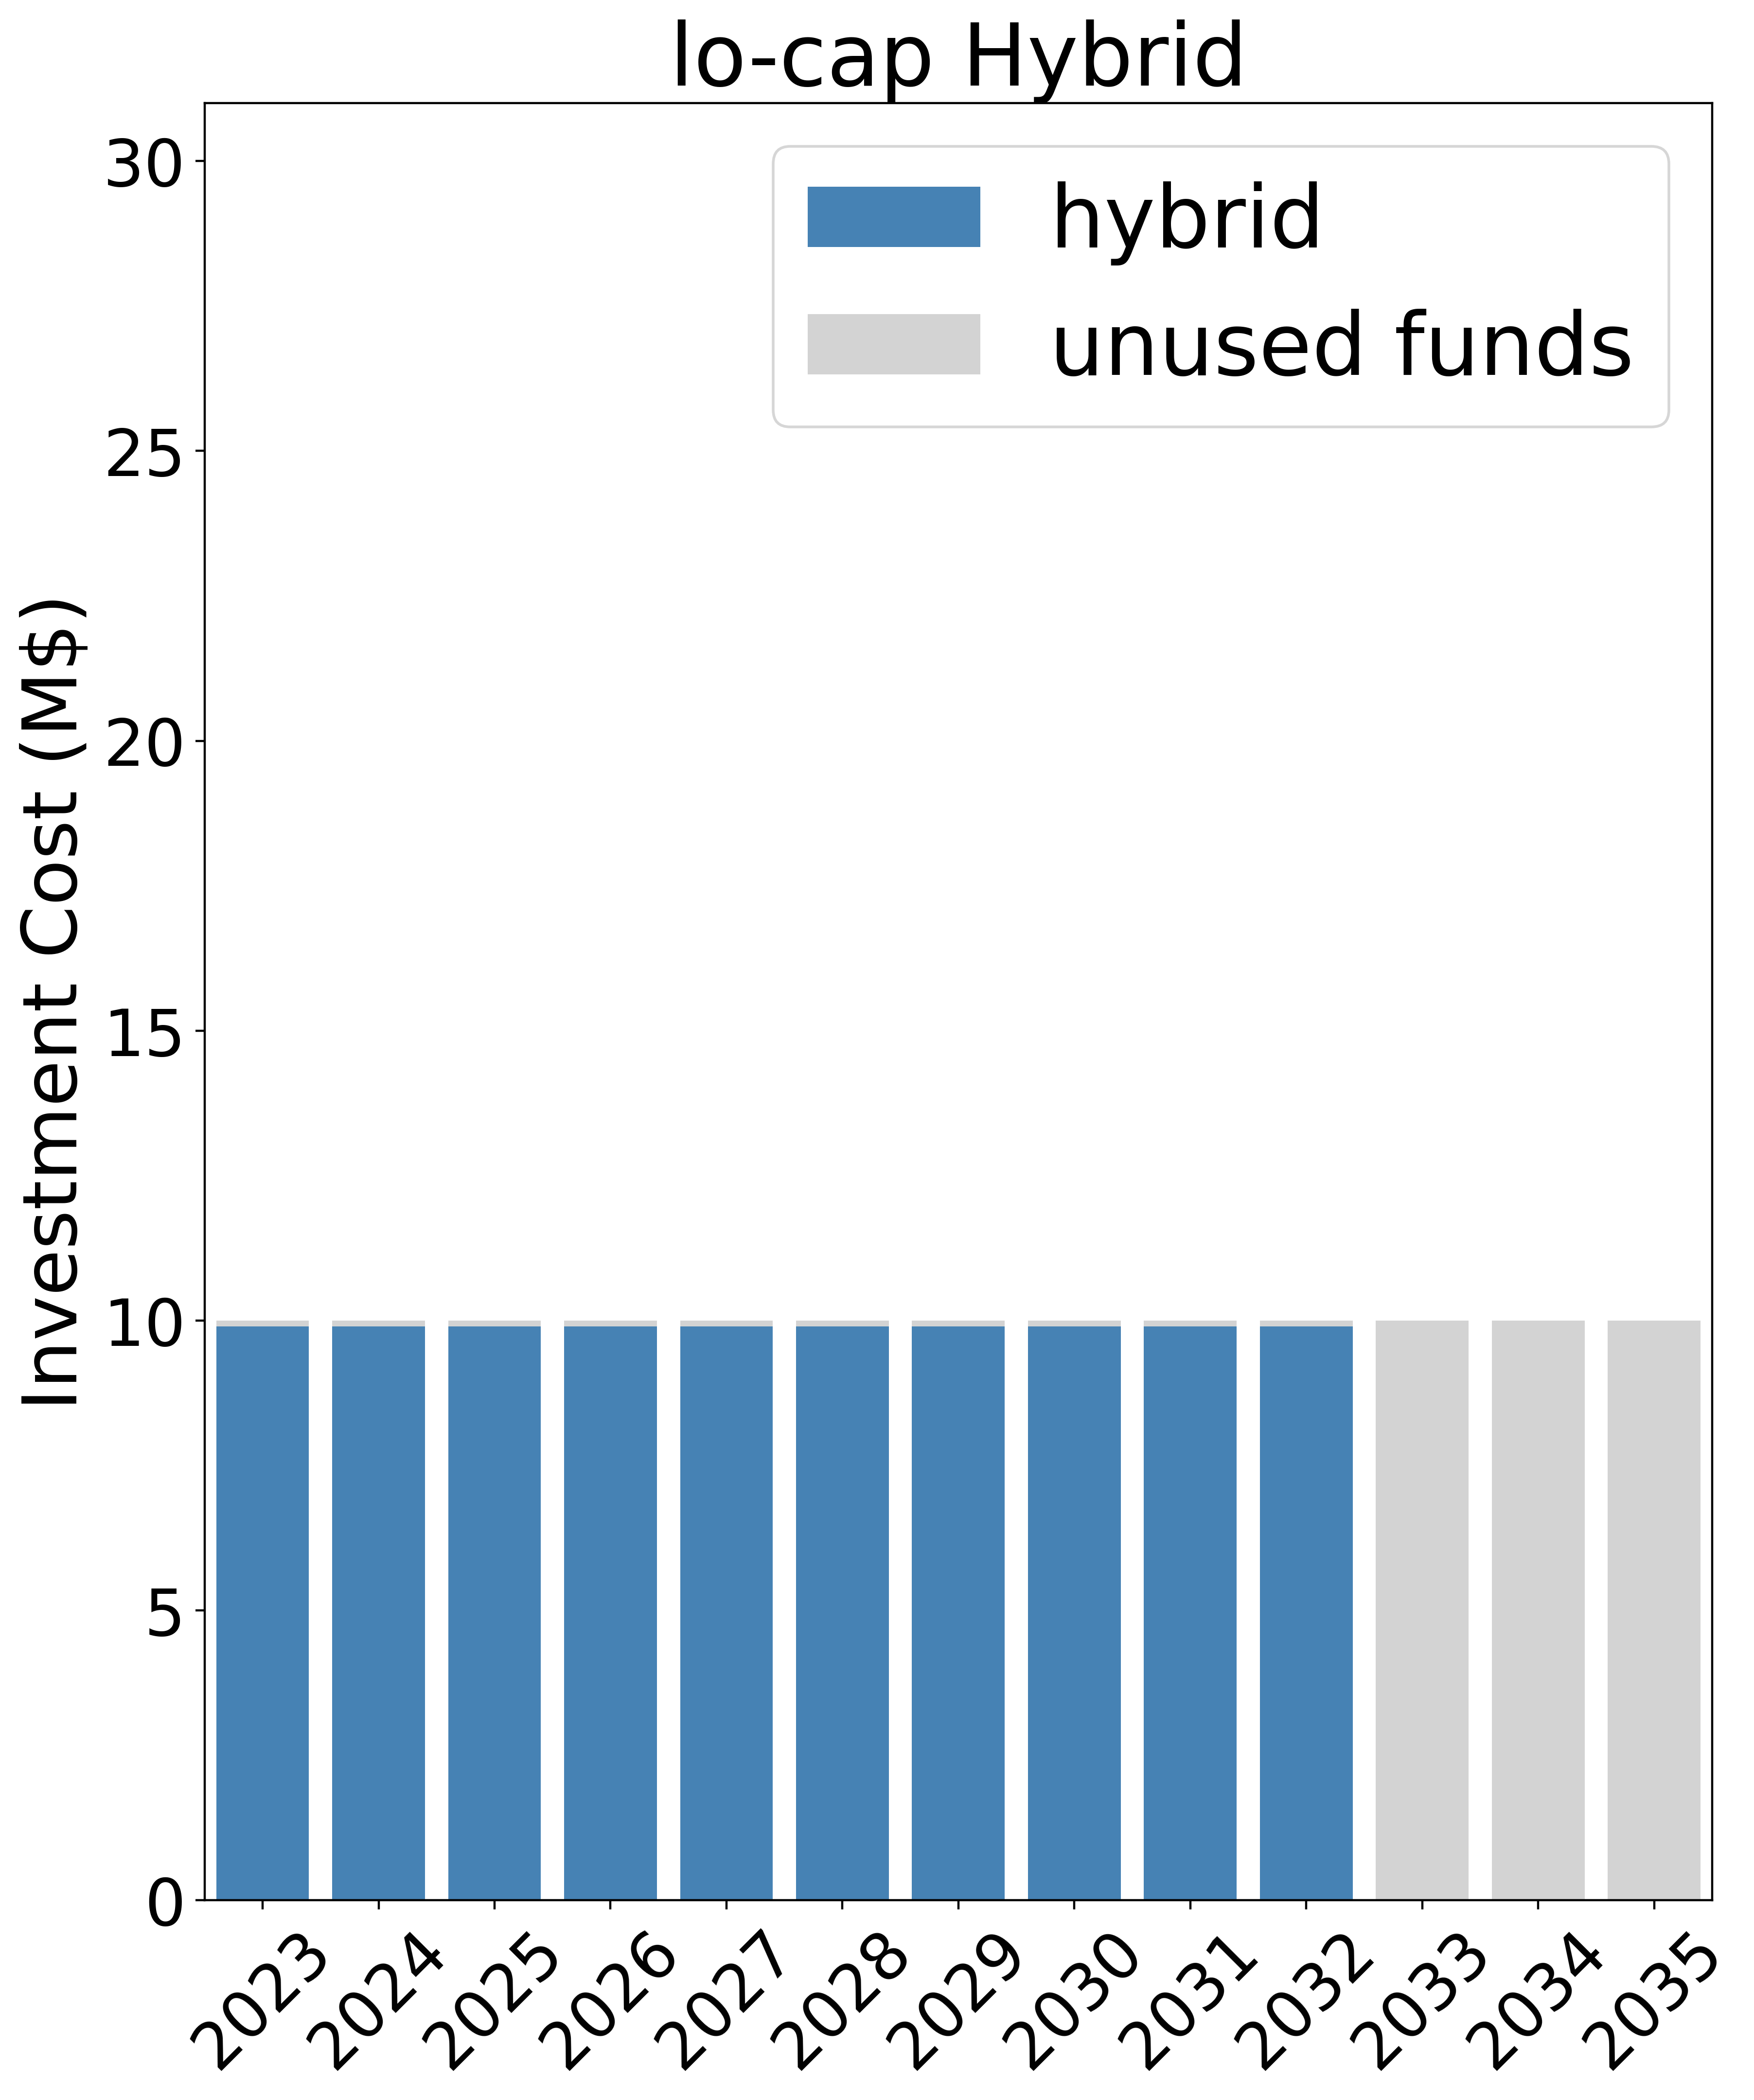

In [33]:
# Filter the dataframe for 'lo-cap Hybrid Electric' future
lo_cap_hybrid = merged_df.loc[merged_df['future'] == 'lo-cap Hybrid']

# Calculate remaining investment
total_investment = 10  # Total investment in millions of dollars
lo_cap_hybrid['Remaining Investment (M$)'] = total_investment - (
   lo_cap_hybrid['HEB - Investment Cost (M$)'] )

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)
plt.bar(lo_cap_hybrid['Year'], lo_cap_hybrid['HEB - Investment Cost (M$)'],
        color=palette['HEB'], label='hybrid')
plt.bar(lo_cap_hybrid['Year'], lo_cap_hybrid['Remaining Investment (M$)'],
        bottom=lo_cap_hybrid['HEB - Investment Cost (M$)'] ,
        color=palette['Remaining'], label='unused funds')

plt.xticks(lo_cap_electric['Year'], rotation=45, fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 31)
plt.xlim(2022.5, 2035.5)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('lo-cap Hybrid', fontsize=32)
plt.legend(fontsize=32)

# Show the plot
plt.show()


In [34]:
lo_cap_hybrid['total_cost']=lo_cap_hybrid['BEB - Investment Cost (M$)']+lo_cap_hybrid['HEB - Investment Cost (M$)']
print('lo_cap_hybrid_total_cost:',lo_cap_hybrid['total_cost'].sum())
print('Remaining Investment (M$):',lo_cap_hybrid['Remaining Investment (M$)'].sum())

lo_cap_hybrid_total_cost: 99.00000000000003
Remaining Investment (M$): 41.0


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\453165360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_cap_hybrid['total_cost']=lo_cap_hybrid['BEB - Investment Cost (M$)']+lo_cap_hybrid['HEB - Investment Cost (M$)']


In [35]:
replacement_plan = pd.read_csv(r'../../data/tidy/replacement_plan.csv', low_memory=False)

In [36]:
replacement_plan

Year  conventional  electric  hybrid
0   2022             0         0       0
1   2023             9         0       0
2   2024             5         0       0
3   2025            21         0       0
4   2026            13         0       4
5   2027             8         0       0
6   2028             8         2       3
7   2029             9         0       0
8   2030             9         0       0
9   2031             0         2       0
10  2032             0         0       0
11  2033             3         0       0
12  2034             0         0       0
13  2035            16         3       0

In [37]:
do_nothing = replacement_plan.copy()

# Calculate the new columns
do_nothing['CDB- Investment Cost (M$)'] = do_nothing['conventional'] * 0.4
do_nothing['HEB - Investment Cost (M$)'] = do_nothing['hybrid'] * 0.9
do_nothing['BEB- Investment Cost (M$)'] = do_nothing['electric'] * 1.3

do_nothing

Year  conventional  electric  hybrid  CDB- Investment Cost (M$)  \
0   2022             0         0       0                        0.0   
1   2023             9         0       0                        3.6   
2   2024             5         0       0                        2.0   
3   2025            21         0       0                        8.4   
4   2026            13         0       4                        5.2   
5   2027             8         0       0                        3.2   
6   2028             8         2       3                        3.2   
7   2029             9         0       0                        3.6   
8   2030             9         0       0                        3.6   
9   2031             0         2       0                        0.0   
10  2032             0         0       0                        0.0   
11  2033             3         0       0                        1.2   
12  2034             0         0       0                        0.0   
13  2035            16         3       0                        6.4   

    HEB - Investment Cost (M$)  BEB- Investment Cost (M$)  
0                          0.0                        0.0  
1                          0.0                        0.0  
2                          0.0                        0.0  
3                          0.0                        0.0  
4                          3.6                        0.0  
5                          0.0                        0.0  
6                          2.7                        2.6  
7                          0.0                        0.0  
8                          0.0                        0.0  
9                          0.0                        2.6  
10                         0.0                        0.0  
11                         0.0                        0.0  
12                         0.0                        0.0  
13                         0.0                        3.9

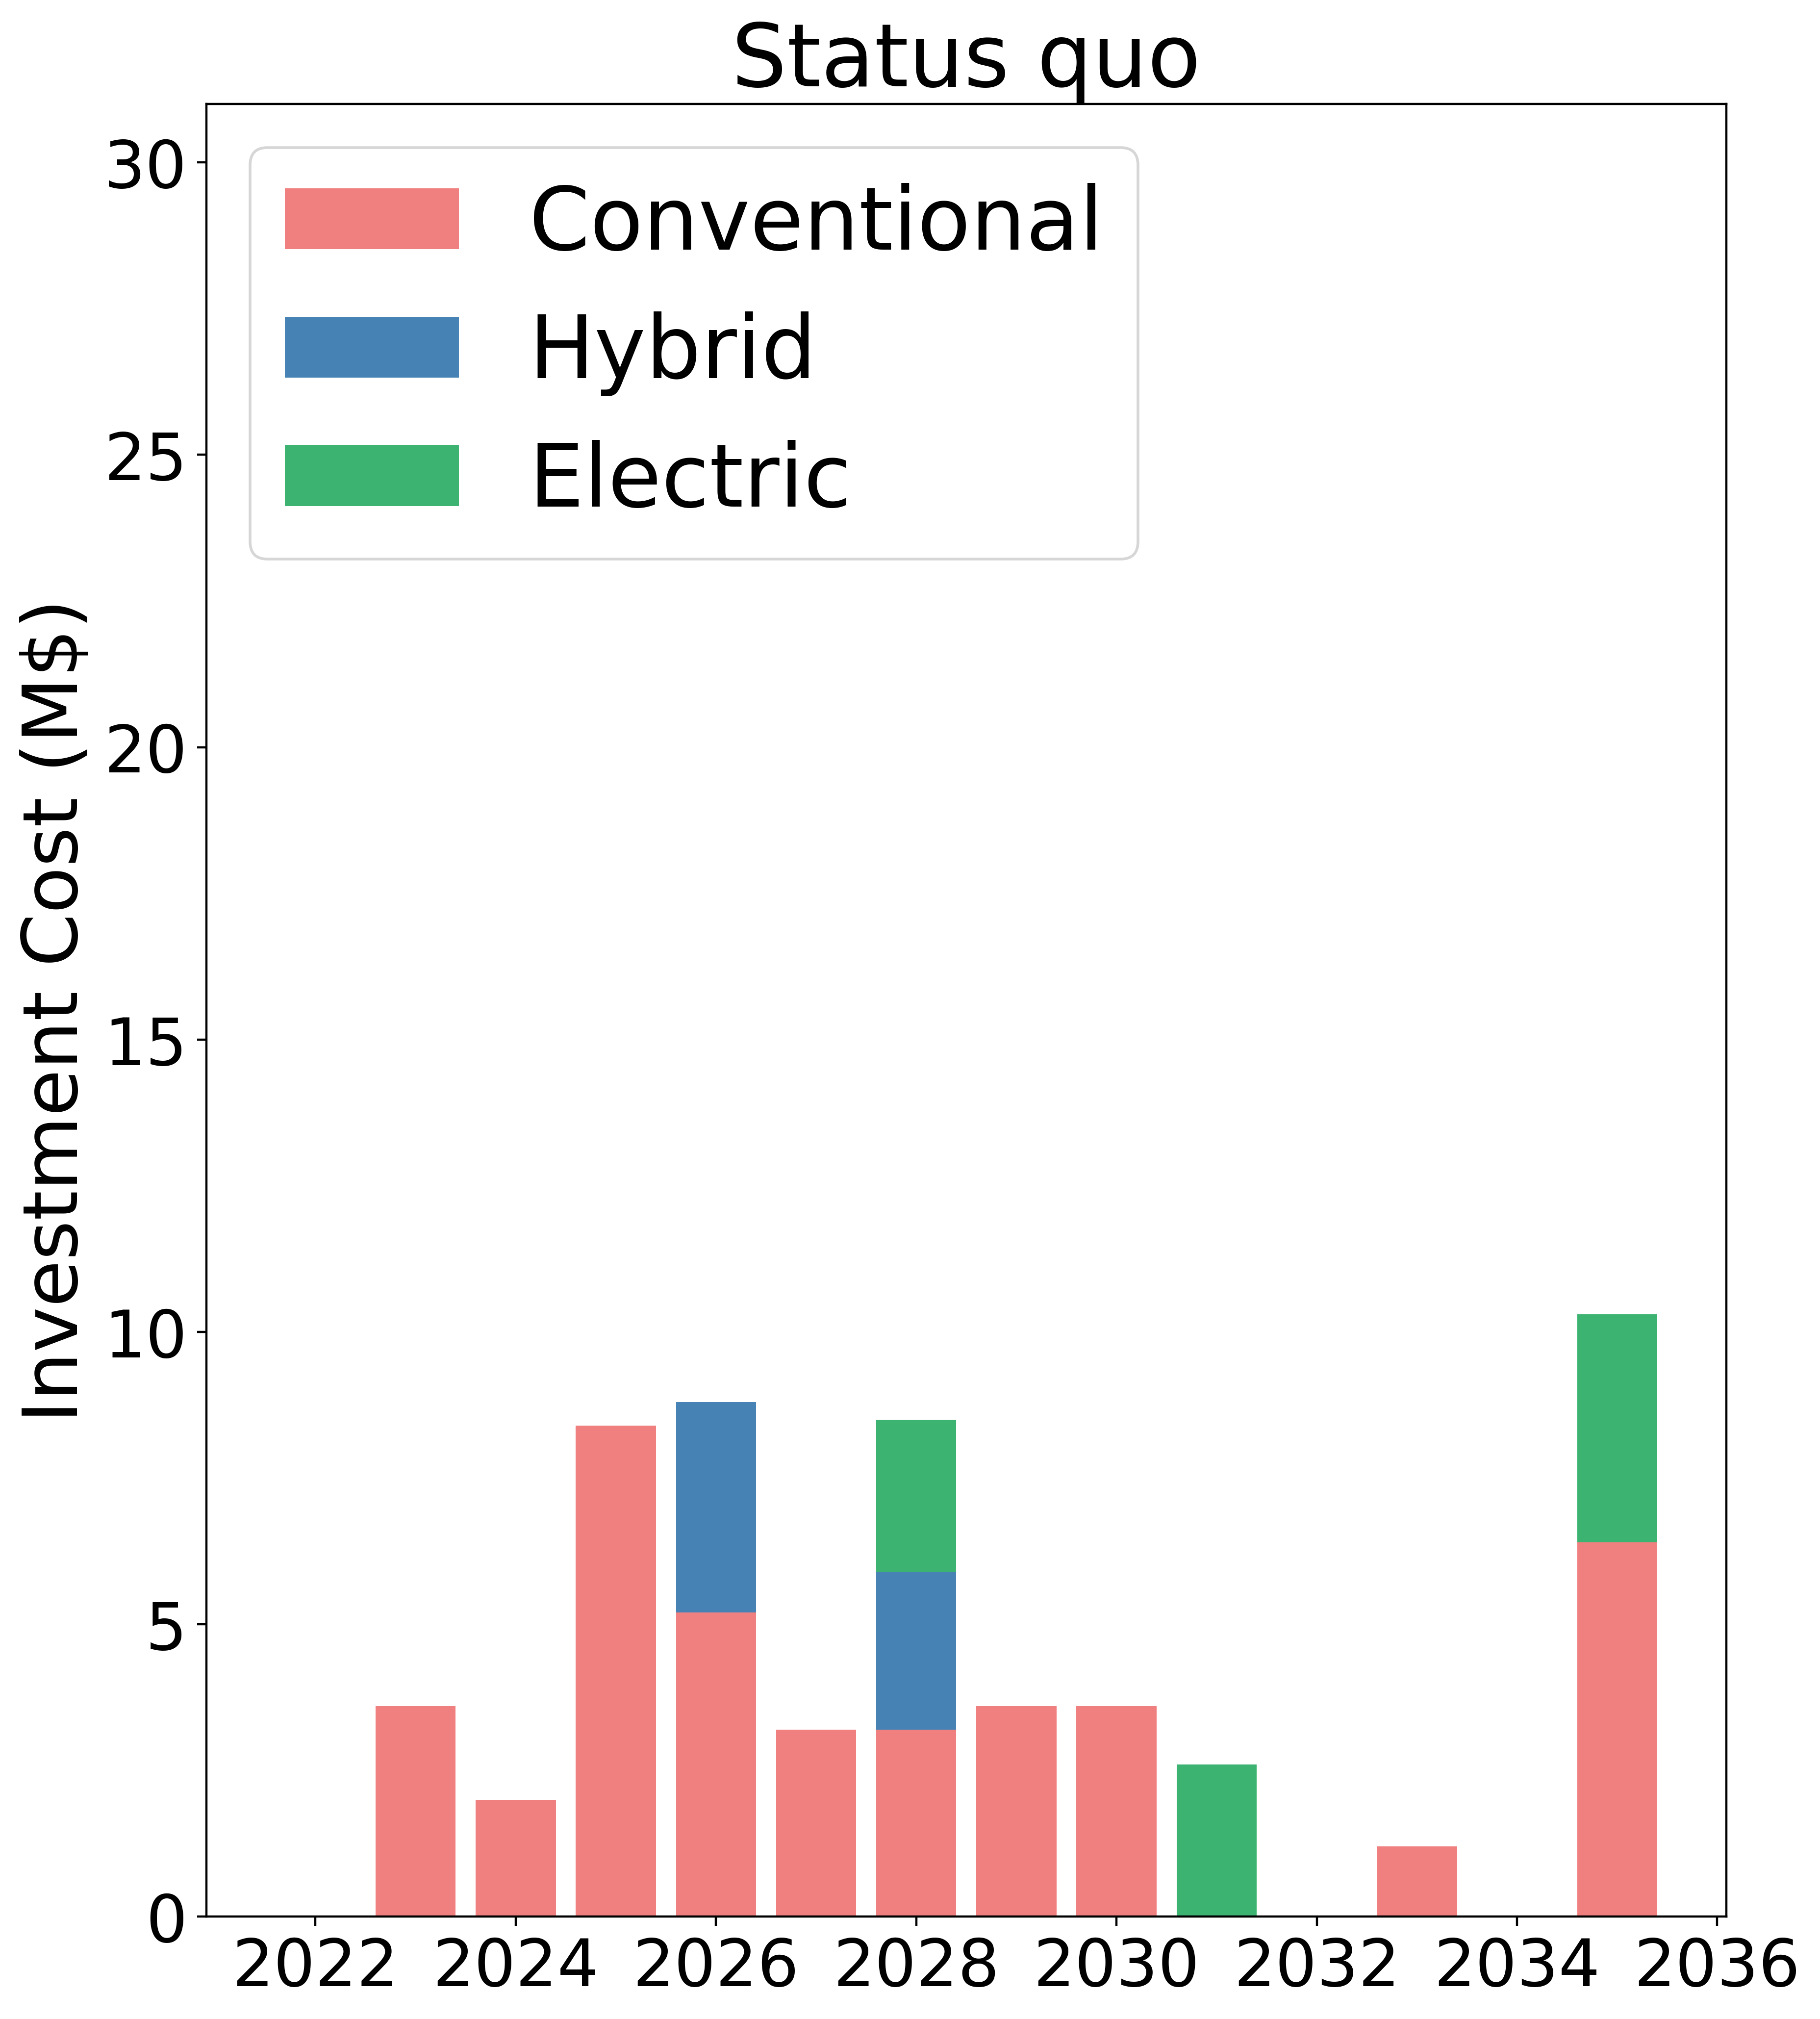

In [38]:
# Define the color palette
palette = {
    'CDB': 'lightcoral',
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}

# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)

# Stacking the bars for each category
plt.bar(do_nothing['Year'], do_nothing['CDB- Investment Cost (M$)'],
        color=palette['CDB'], label='Conventional')
plt.bar(do_nothing['Year'], do_nothing['HEB - Investment Cost (M$)'],
        bottom=do_nothing['CDB- Investment Cost (M$)'],
        color=palette['HEB'], label='Hybrid')
plt.bar(do_nothing['Year'], do_nothing['BEB- Investment Cost (M$)'],
        bottom=do_nothing['CDB- Investment Cost (M$)'] + do_nothing['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='Electric')

# Setting the font size for x and y ticks
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('Status quo', fontsize=32)
plt.legend(fontsize=32, loc='upper left')
plt.ylim(0, 31)


# Show the plot
plt.show()

In [39]:
do_nothing['total_cost']=do_nothing['CDB- Investment Cost (M$)']+do_nothing['HEB - Investment Cost (M$)']+do_nothing['BEB- Investment Cost (M$)']
print('do_nothing_total_cost:',do_nothing['total_cost'].sum())

do_nothing_total_cost: 55.80000000000001


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\2684800317.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp['CDB - Investment Cost (M$)'] = 0


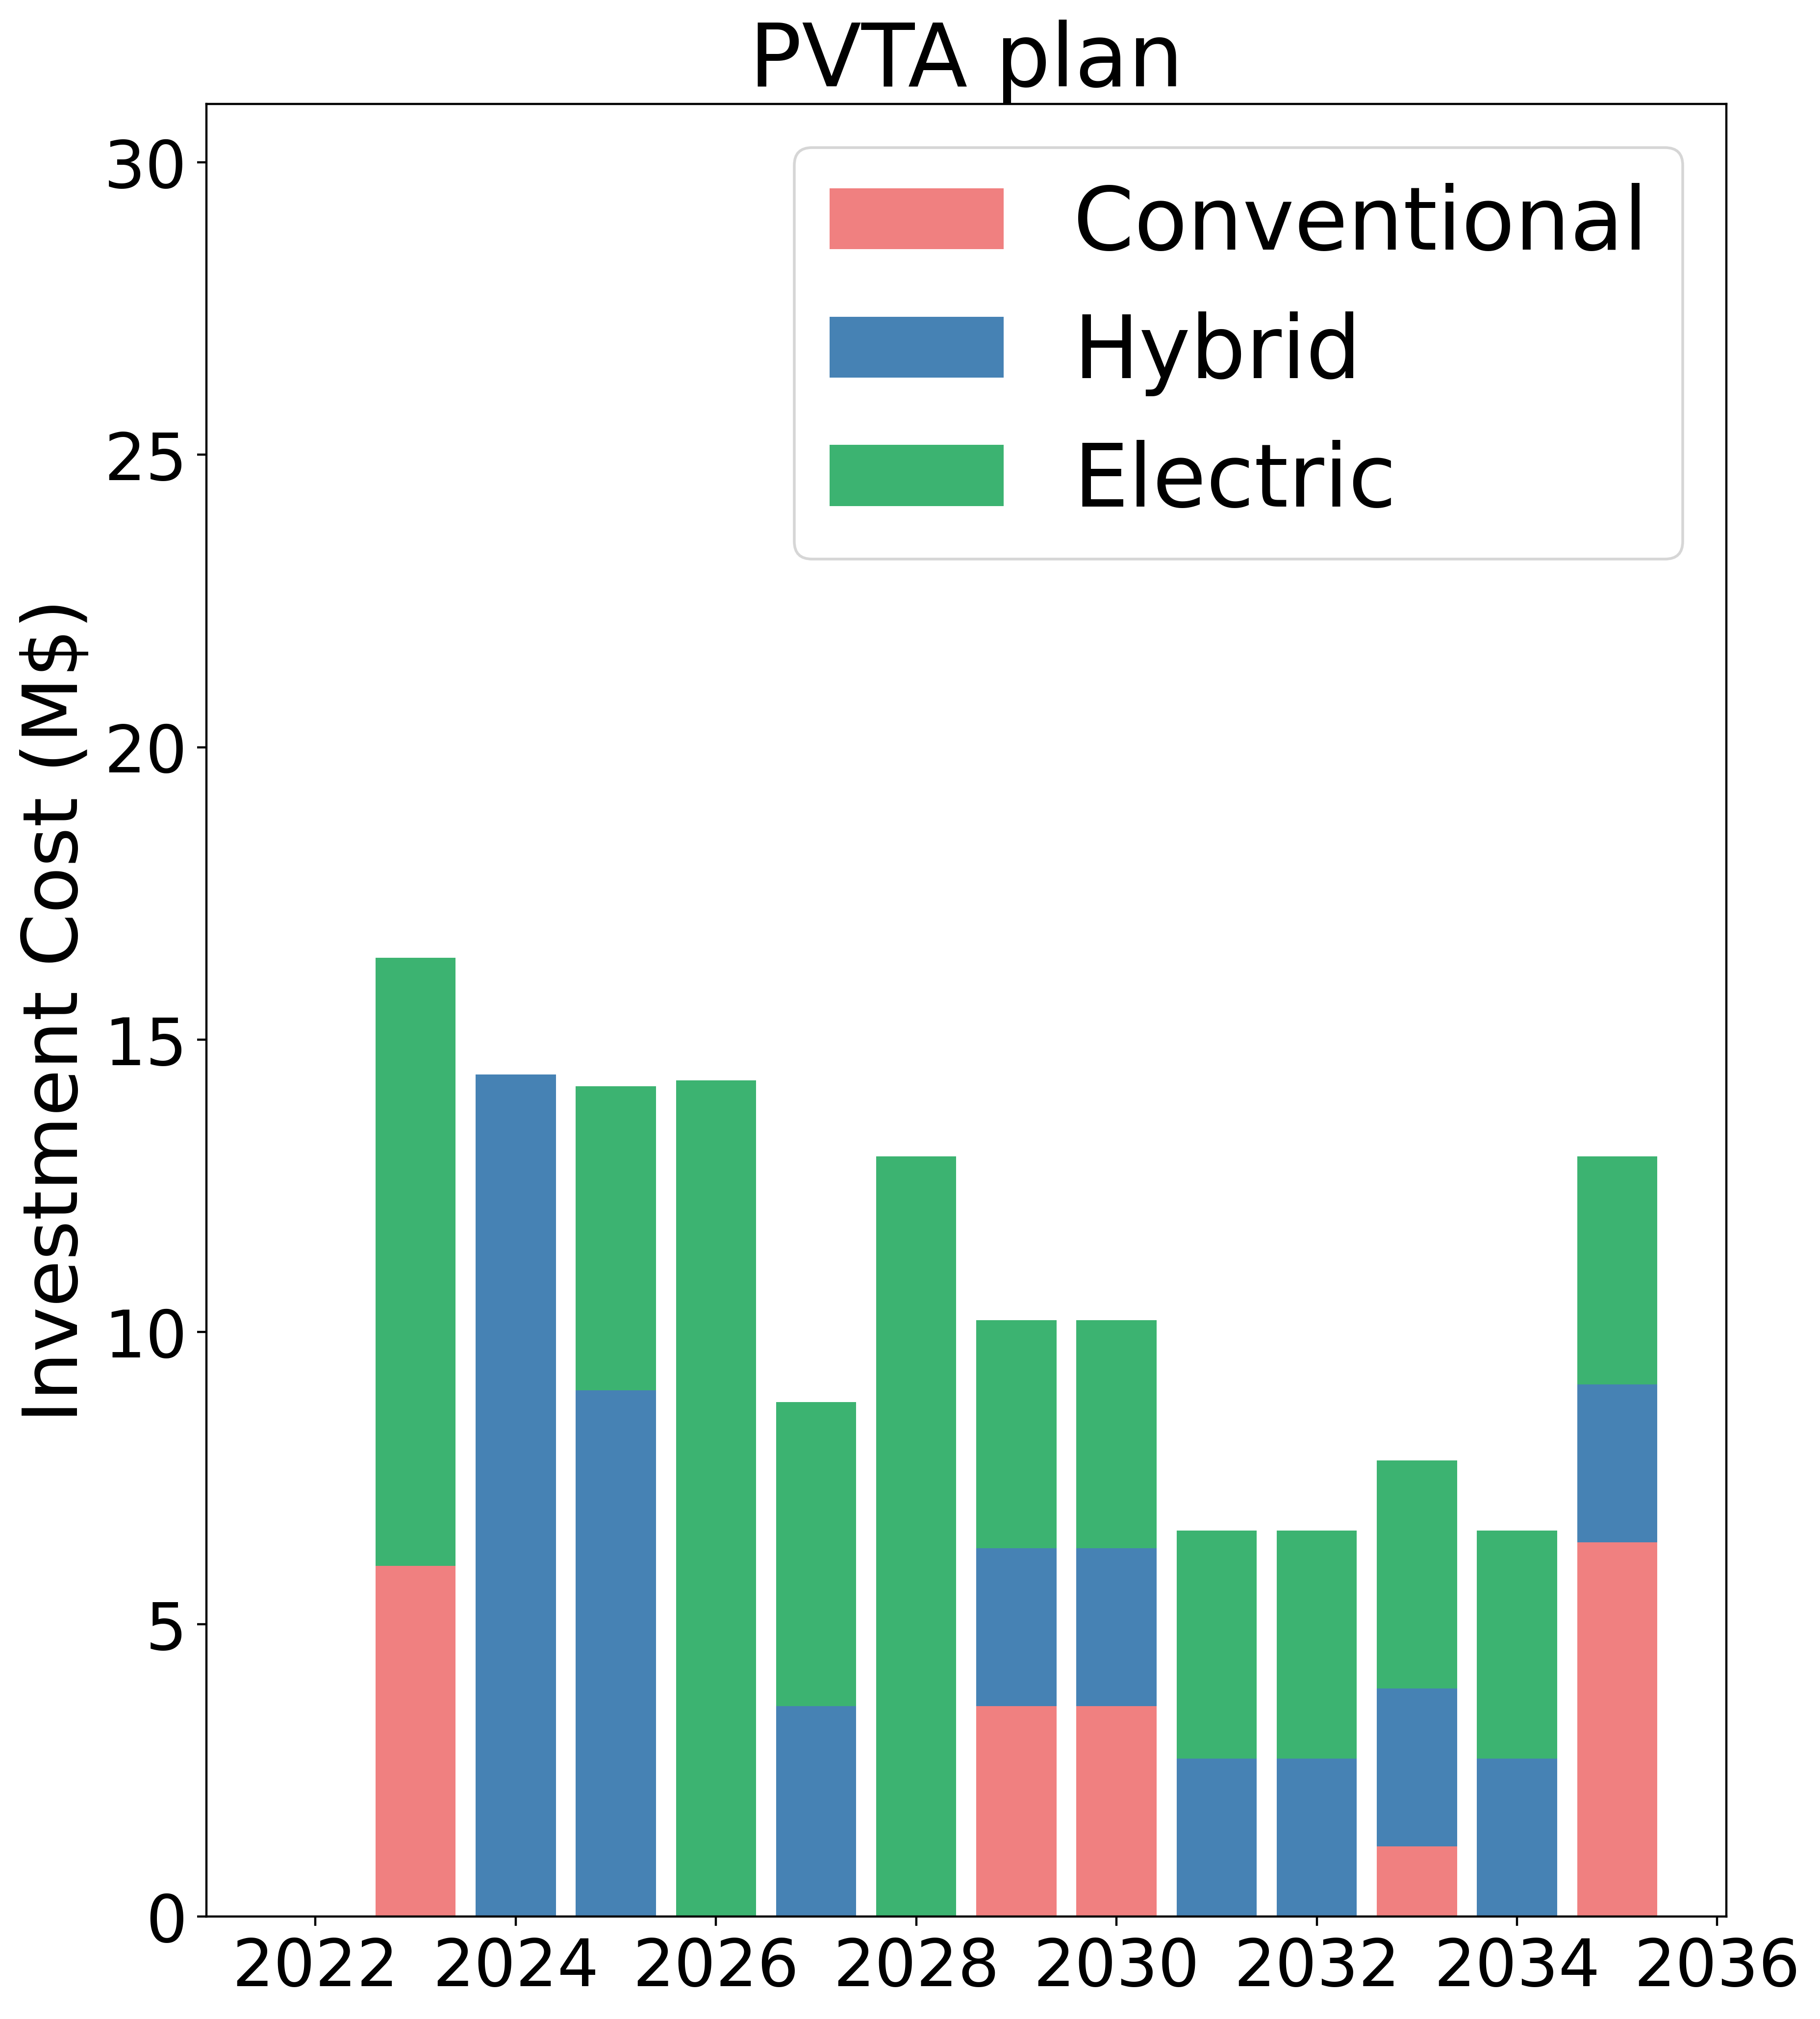

In [40]:
# Define the color palette
palette = {
    'CDB': 'lightcoral',
    'HEB': 'steelblue',
    'BEB': 'mediumseagreen'
}


# Filter the dataframe for 'hi-cap Hybrid Electric' future
pp = merged_df.loc[merged_df['future'] == 'PVTA plan']

# Set the whole column to 0
pp['CDB - Investment Cost (M$)'] = 0

# Set the value for the year 2023 to 20*0.5
pp.loc[pp['Year'] == 2023, 'CDB - Investment Cost (M$)'] = 15 * 0.4


# Create a stacked bar plot with the desired figure size and DPI
plt.figure(figsize=(10, 12), dpi=400)

# for the years 2029 to 2035
for year in range(2029, 2036):  # This will loop from 2029 to 2035 inclusive
    pp.loc[pp['Year'] == year, 'CDB - Investment Cost (M$)'] = do_nothing.loc[do_nothing['Year'] == year, 'CDB- Investment Cost (M$)']


# Stacking the bars for each category
plt.bar(pp['Year'], pp['CDB - Investment Cost (M$)'],
        color=palette['CDB'], label='Conventional')
plt.bar(pp['Year'], pp['HEB - Investment Cost (M$)'],
        bottom=pp['CDB - Investment Cost (M$)'],
        color=palette['HEB'], label='Hybrid')
plt.bar(pp['Year'], pp['BEB - Investment Cost (M$)'],
        bottom=pp['CDB - Investment Cost (M$)'] + pp['HEB - Investment Cost (M$)'],
        color=palette['BEB'], label='Electric')

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# Adding labels and title
#plt.xlabel('Year', fontsize=28)
plt.ylabel('Investment Cost (M$)', fontsize=28)
plt.title('PVTA plan', fontsize=32)
plt.legend(fontsize=32)
plt.ylim(0, 31)


# Show the plot
plt.show()


In [41]:
pp['total_cost']=pp['CDB - Investment Cost (M$)']+pp['HEB - Investment Cost (M$)']+pp['BEB - Investment Cost (M$)']
print('pp_total_cost:',pp['total_cost'].sum())

pp_total_cost: 142.1


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38488\4061961009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp['total_cost']=pp['CDB - Investment Cost (M$)']+pp['HEB - Investment Cost (M$)']+pp['BEB - Investment Cost (M$)']


In [42]:
do_nothing

Year  conventional  electric  hybrid  CDB- Investment Cost (M$)  \
0   2022             0         0       0                        0.0   
1   2023             9         0       0                        3.6   
2   2024             5         0       0                        2.0   
3   2025            21         0       0                        8.4   
4   2026            13         0       4                        5.2   
5   2027             8         0       0                        3.2   
6   2028             8         2       3                        3.2   
7   2029             9         0       0                        3.6   
8   2030             9         0       0                        3.6   
9   2031             0         2       0                        0.0   
10  2032             0         0       0                        0.0   
11  2033             3         0       0                        1.2   
12  2034             0         0       0                        0.0   
13  2035            16         3       0                        6.4   

    HEB - Investment Cost (M$)  BEB- Investment Cost (M$)  total_cost  
0                          0.0                        0.0         0.0  
1                          0.0                        0.0         3.6  
2                          0.0                        0.0         2.0  
3                          0.0                        0.0         8.4  
4                          3.6                        0.0         8.8  
5                          0.0                        0.0         3.2  
6                          2.7                        2.6         8.5  
7                          0.0                        0.0         3.6  
8                          0.0                        0.0         3.6  
9                          0.0                        2.6         2.6  
10                         0.0                        0.0         0.0  
11                         0.0                        0.0         1.2  
12                         0.0                        0.0         0.0  
13                         0.0                        3.9        10.3

In [43]:
merged_df['CDB- Investment Cost (M$)']=0

In [44]:
# Rename columns
do_nothing = do_nothing.rename(columns={'HEB - Investment Cost (M$)': 'HEB - Investment Cost (M$)', 'BEB- Investment Cost (M$)': 'BEB - Investment Cost (M$)'})

In [45]:
do_nothing['future'] = 'Do_Nothing'
#merged_df['CDB- Investment Cost (M$)']=0

In [46]:
do_nothing

Year  conventional  electric  hybrid  CDB- Investment Cost (M$)  \
0   2022             0         0       0                        0.0   
1   2023             9         0       0                        3.6   
2   2024             5         0       0                        2.0   
3   2025            21         0       0                        8.4   
4   2026            13         0       4                        5.2   
5   2027             8         0       0                        3.2   
6   2028             8         2       3                        3.2   
7   2029             9         0       0                        3.6   
8   2030             9         0       0                        3.6   
9   2031             0         2       0                        0.0   
10  2032             0         0       0                        0.0   
11  2033             3         0       0                        1.2   
12  2034             0         0       0                        0.0   
13  2035            16         3       0                        6.4   

    HEB - Investment Cost (M$)  BEB - Investment Cost (M$)  total_cost  \
0                          0.0                         0.0         0.0   
1                          0.0                         0.0         3.6   
2                          0.0                         0.0         2.0   
3                          0.0                         0.0         8.4   
4                          3.6                         0.0         8.8   
5                          0.0                         0.0         3.2   
6                          2.7                         2.6         8.5   
7                          0.0                         0.0         3.6   
8                          0.0                         0.0         3.6   
9                          0.0                         2.6         2.6   
10                         0.0                         0.0         0.0   
11                         0.0                         0.0         1.2   
12                         0.0                         0.0         0.0   
13                         0.0                         3.9        10.3   

        future  
0   Do_Nothing  
1   Do_Nothing  
2   Do_Nothing  
3   Do_Nothing  
4   Do_Nothing  
5   Do_Nothing  
6   Do_Nothing  
7   Do_Nothing  
8   Do_Nothing  
9   Do_Nothing  
10  Do_Nothing  
11  Do_Nothing  
12  Do_Nothing  
13  Do_Nothing

In [47]:
merged_df['total_cost'] = merged_df['BEB - Investment Cost (M$)'] + merged_df['HEB - Investment Cost (M$)']+ merged_df['CDB- Investment Cost (M$)']

In [48]:
merged_df

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0    2022           15            9         0.0         0.0   
1    2023           23            9         8.0         0.0   
2    2024           23           25         0.0        16.0   
3    2025           27           35         4.0        10.0   
4    2026           38           35        11.0         0.0   
..    ...          ...          ...         ...         ...   
135  2031           68           32         7.0         1.0   
136  2032           75           33         7.0         1.0   
137  2033           82           34         7.0         1.0   
138  2034           89           35         7.0         1.0   
139  2035           96           36         7.0         1.0   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  \
0                           0.0                         0.0   
1                          10.4                         0.0   
2                           0.0                        14.4   
3                           5.2                         9.0   
4                          14.3                         0.0   
..                          ...                         ...   
135                         9.1                         0.9   
136                         9.1                         0.9   
137                         9.1                         0.9   
138                         9.1                         0.9   
139                         9.1                         0.9   

                     future  yearly_purchased_buses  \
0                 PVTA plan                     0.0   
1                 PVTA plan                     8.0   
2                 PVTA plan                    16.0   
3                 PVTA plan                    14.0   
4                 PVTA plan                    11.0   
..                      ...                     ...   
135  lo-cap Hybrid Electric                     8.0   
136  lo-cap Hybrid Electric                     8.0   
137  lo-cap Hybrid Electric                     8.0   
138  lo-cap Hybrid Electric                     8.0   
139  lo-cap Hybrid Electric                     8.0   

     CDB- Investment Cost (M$)  total_cost  
0                            0         0.0  
1                            0        10.4  
2                            0        14.4  
3                            0        14.2  
4                            0        14.3  
..                         ...         ...  
135                          0        10.0  
136                          0        10.0  
137                          0        10.0  
138                          0        10.0  
139                          0        10.0  

[140 rows x 11 columns]

In [49]:
merged_df.loc[merged_df['future']=='PVTA plan']

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0   2022           15            9         0.0         0.0   
1   2023           23            9         8.0         0.0   
2   2024           23           25         0.0        16.0   
3   2025           27           35         4.0        10.0   
4   2026           38           35        11.0         0.0   
5   2027           42           39         4.0         4.0   
6   2028           52           39        10.0         0.0   
7   2029           55           42         3.0         3.0   
8   2030           58           45         3.0         3.0   
9   2031           61           48         3.0         3.0   
10  2032           64           51         3.0         3.0   
11  2033           67           54         3.0         3.0   
12  2034           70           57         3.0         3.0   
13  2035           73           60         3.0         3.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)     future  \
0                          0.0                         0.0  PVTA plan   
1                         10.4                         0.0  PVTA plan   
2                          0.0                        14.4  PVTA plan   
3                          5.2                         9.0  PVTA plan   
4                         14.3                         0.0  PVTA plan   
5                          5.2                         3.6  PVTA plan   
6                         13.0                         0.0  PVTA plan   
7                          3.9                         2.7  PVTA plan   
8                          3.9                         2.7  PVTA plan   
9                          3.9                         2.7  PVTA plan   
10                         3.9                         2.7  PVTA plan   
11                         3.9                         2.7  PVTA plan   
12                         3.9                         2.7  PVTA plan   
13                         3.9                         2.7  PVTA plan   

    yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  
0                      0.0                          0         0.0  
1                      8.0                          0        10.4  
2                     16.0                          0        14.4  
3                     14.0                          0        14.2  
4                     11.0                          0        14.3  
5                      8.0                          0         8.8  
6                     10.0                          0        13.0  
7                      6.0                          0         6.6  
8                      6.0                          0         6.6  
9                      6.0                          0         6.6  
10                     6.0                          0         6.6  
11                     6.0                          0         6.6  
12                     6.0                          0         6.6  
13                     6.0                          0         6.6

In [50]:
do_nothing['future']='Status quo'

In [51]:
do_nothing

Year  conventional  electric  hybrid  CDB- Investment Cost (M$)  \
0   2022             0         0       0                        0.0   
1   2023             9         0       0                        3.6   
2   2024             5         0       0                        2.0   
3   2025            21         0       0                        8.4   
4   2026            13         0       4                        5.2   
5   2027             8         0       0                        3.2   
6   2028             8         2       3                        3.2   
7   2029             9         0       0                        3.6   
8   2030             9         0       0                        3.6   
9   2031             0         2       0                        0.0   
10  2032             0         0       0                        0.0   
11  2033             3         0       0                        1.2   
12  2034             0         0       0                        0.0   
13  2035            16         3       0                        6.4   

    HEB - Investment Cost (M$)  BEB - Investment Cost (M$)  total_cost  \
0                          0.0                         0.0         0.0   
1                          0.0                         0.0         3.6   
2                          0.0                         0.0         2.0   
3                          0.0                         0.0         8.4   
4                          3.6                         0.0         8.8   
5                          0.0                         0.0         3.2   
6                          2.7                         2.6         8.5   
7                          0.0                         0.0         3.6   
8                          0.0                         0.0         3.6   
9                          0.0                         2.6         2.6   
10                         0.0                         0.0         0.0   
11                         0.0                         0.0         1.2   
12                         0.0                         0.0         0.0   
13                         0.0                         3.9        10.3   

        future  
0   Status quo  
1   Status quo  
2   Status quo  
3   Status quo  
4   Status quo  
5   Status quo  
6   Status quo  
7   Status quo  
8   Status quo  
9   Status quo  
10  Status quo  
11  Status quo  
12  Status quo  
13  Status quo

In [52]:
result_df = pd.concat([merged_df, do_nothing], ignore_index=True)

In [53]:
#result_df['Total Investment Cost (M$)'] = result_df['BEB - Investment Cost (M$)'] + merged_df['HEB - Investment Cost (M$)']+ merged_df['CDB- Investment Cost (M$)']

In [54]:
result_df

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0    2022         15.0          9.0         0.0         0.0   
1    2023         23.0          9.0         8.0         0.0   
2    2024         23.0         25.0         0.0        16.0   
3    2025         27.0         35.0         4.0        10.0   
4    2026         38.0         35.0        11.0         0.0   
..    ...          ...          ...         ...         ...   
149  2031          NaN          NaN         NaN         NaN   
150  2032          NaN          NaN         NaN         NaN   
151  2033          NaN          NaN         NaN         NaN   
152  2034          NaN          NaN         NaN         NaN   
153  2035          NaN          NaN         NaN         NaN   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)      future  \
0                           0.0                         0.0   PVTA plan   
1                          10.4                         0.0   PVTA plan   
2                           0.0                        14.4   PVTA plan   
3                           5.2                         9.0   PVTA plan   
4                          14.3                         0.0   PVTA plan   
..                          ...                         ...         ...   
149                         2.6                         0.0  Status quo   
150                         0.0                         0.0  Status quo   
151                         0.0                         0.0  Status quo   
152                         0.0                         0.0  Status quo   
153                         3.9                         0.0  Status quo   

     yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  \
0                       0.0                        0.0         0.0   
1                       8.0                        0.0        10.4   
2                      16.0                        0.0        14.4   
3                      14.0                        0.0        14.2   
4                      11.0                        0.0        14.3   
..                      ...                        ...         ...   
149                     NaN                        0.0         2.6   
150                     NaN                        0.0         0.0   
151                     NaN                        1.2         1.2   
152                     NaN                        0.0         0.0   
153                     NaN                        6.4        10.3   

     conventional  electric  hybrid  
0             NaN       NaN     NaN  
1             NaN       NaN     NaN  
2             NaN       NaN     NaN  
3             NaN       NaN     NaN  
4             NaN       NaN     NaN  
..            ...       ...     ...  
149           0.0       2.0     0.0  
150           0.0       0.0     0.0  
151           3.0       0.0     0.0  
152           0.0       0.0     0.0  
153          16.0       3.0     0.0  

[154 rows x 14 columns]

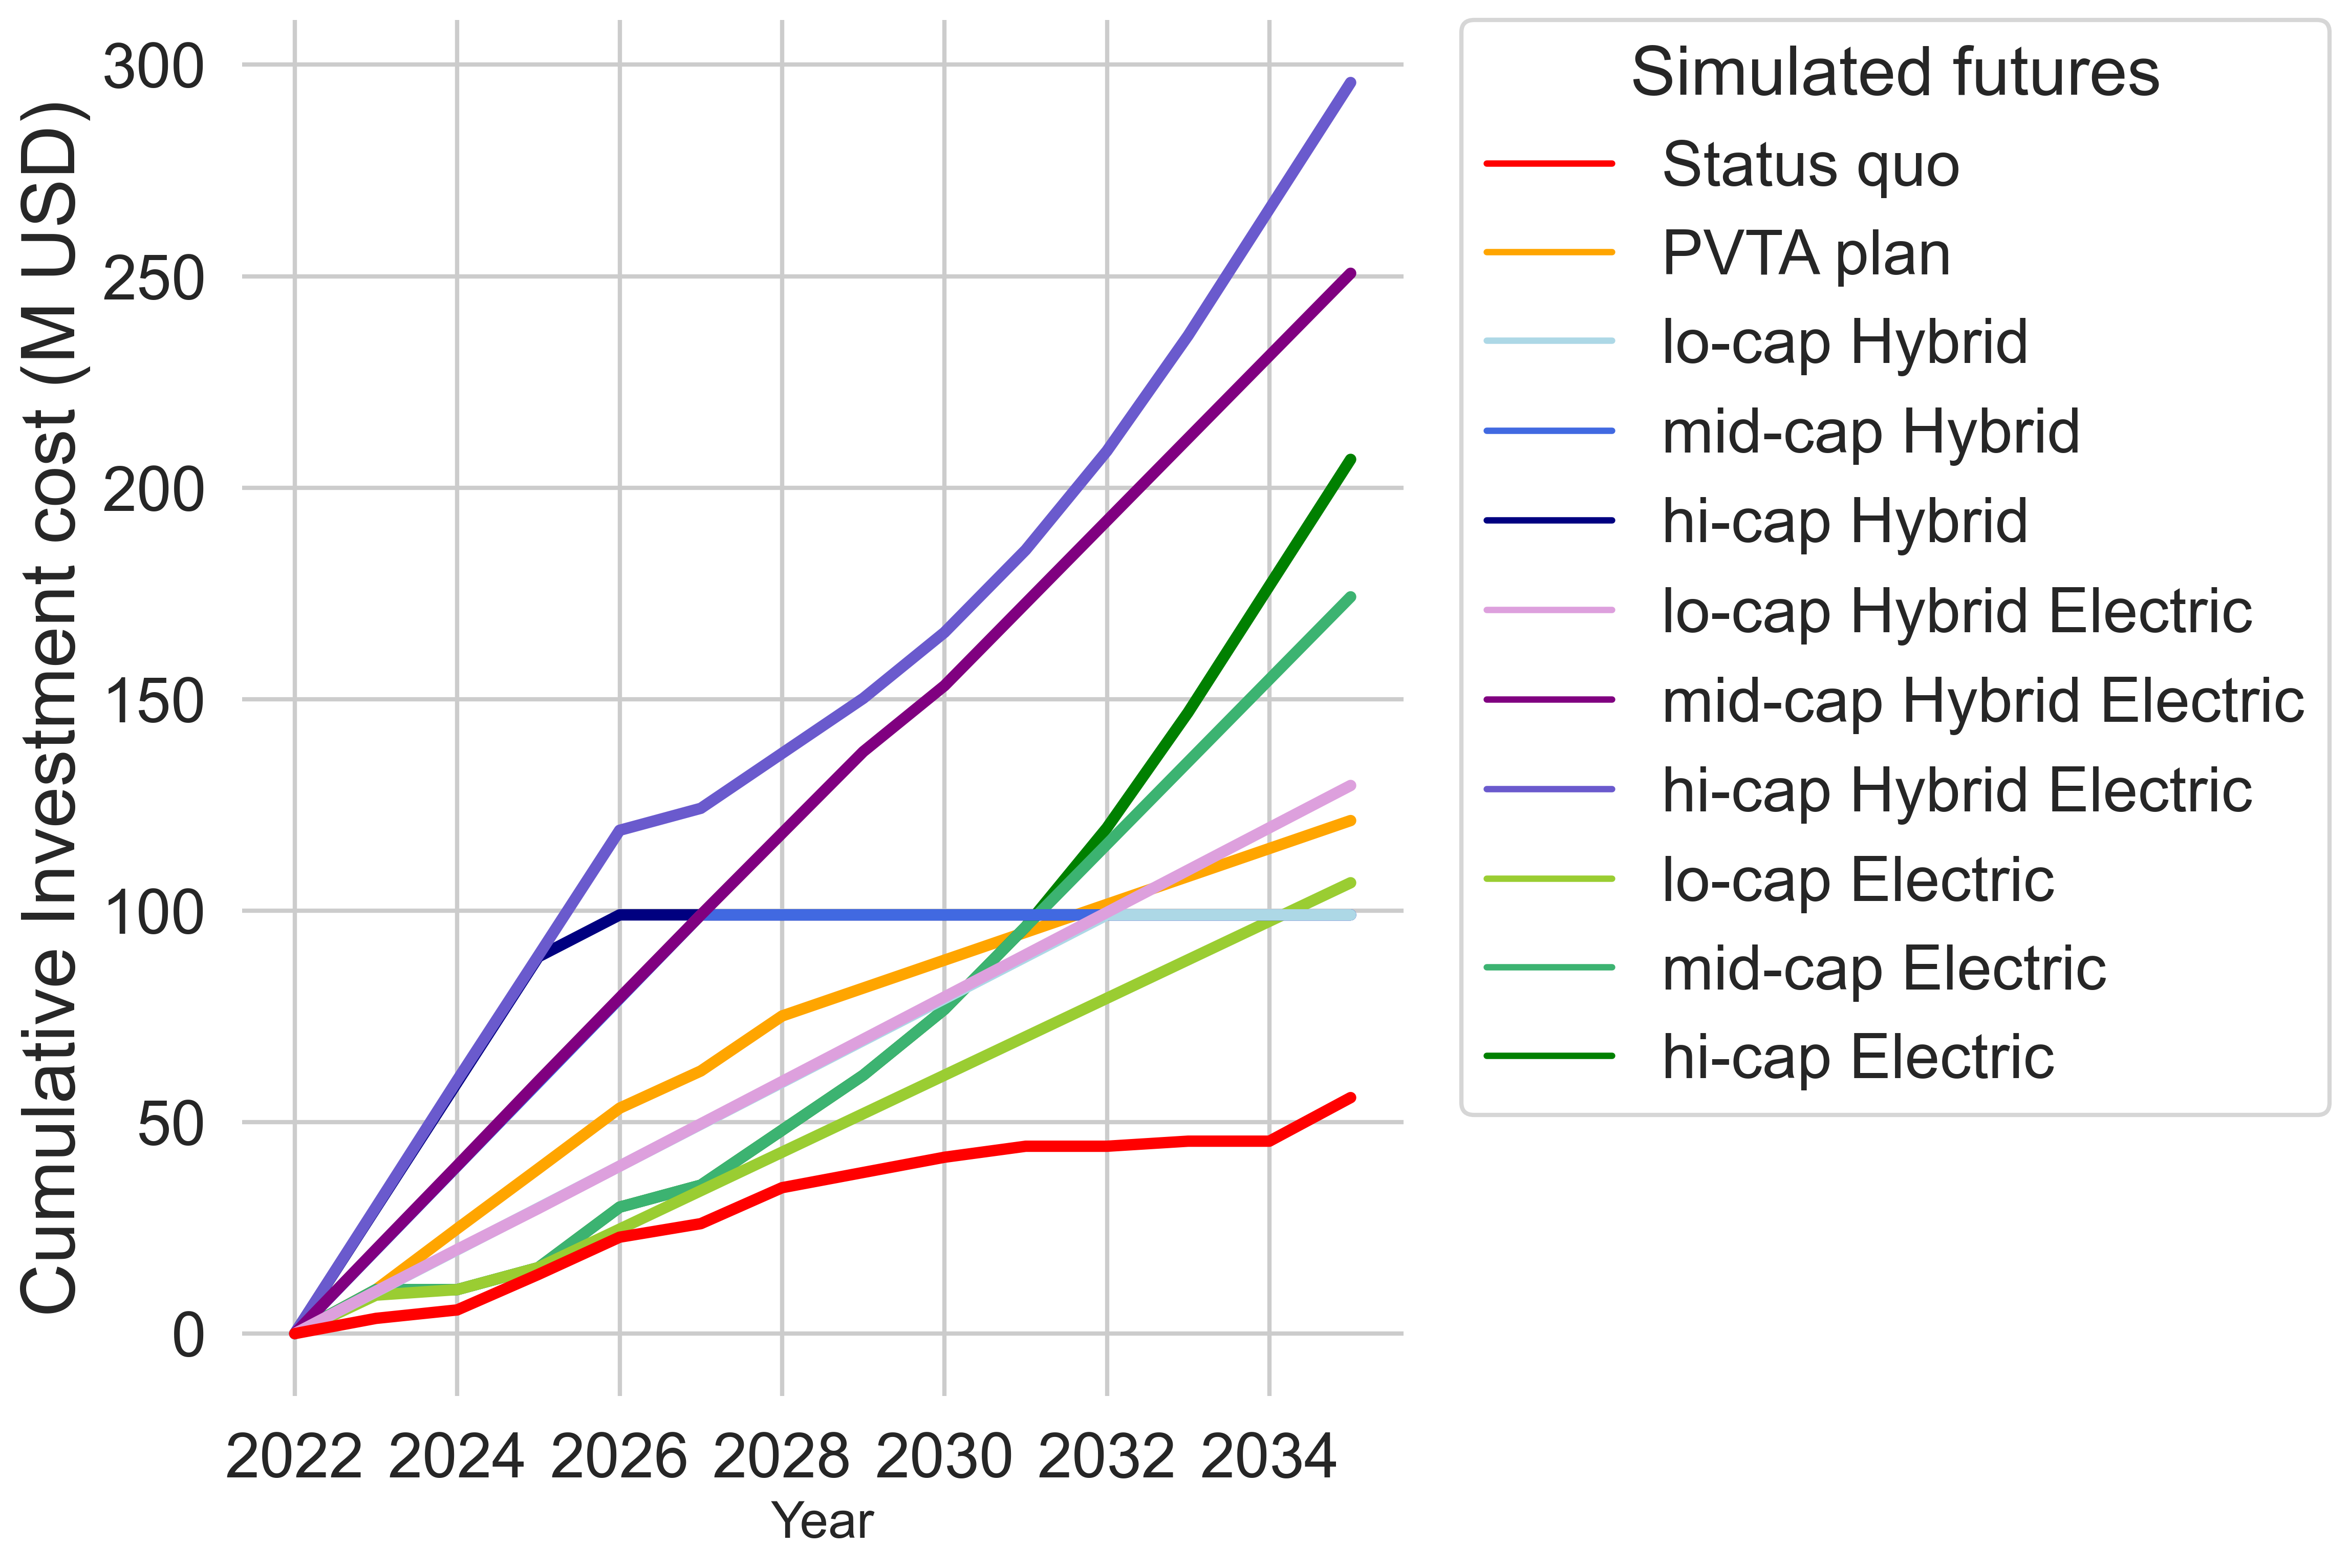

In [55]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Your custom palette and markers
custom_palette = {
    "Status quo": "red",
    "PVTA plan": "orange",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    "lo-cap Hybrid Electric": "plum",
    "mid-cap Hybrid Electric": "purple",
    "hi-cap Hybrid Electric": "slateblue",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}

custom_markers = {
    "Status quo": "P",
    "PVTA plan": "o",
    "lo-cap Hybrid": "^",
    "mid-cap Hybrid": "s",
    "hi-cap Hybrid": "o",
    "lo-cap Hybrid Electric": "^",
    "mid-cap Hybrid Electric": "s",
    "hi-cap Hybrid Electric": "o",
    "lo-cap Electric": "^",
    "mid-cap Electric": "s",
    "hi-cap Electric": "o"
}

# Calculate cumulative sum
result_df['cumulative_cost'] = result_df.groupby('future')['total_cost'].cumsum()

# Plotting code
plt.figure(figsize=(12, 8), dpi=400)
sns.set_style("whitegrid")
sns.set_context("talk")  # makes everything larger

# Loop through each category and plot
for future in result_df['future'].unique():
    subset = result_df[result_df['future'] == future]
    sns.lineplot(data=subset, x='Year', y='cumulative_cost', label=future,
                 color=custom_palette[future], dashes=False,linewidth=4)

# Custom legend in the order of your palette
order = ["Status quo", "PVTA plan", "lo-cap Hybrid", "mid-cap Hybrid", "hi-cap Hybrid", "lo-cap Hybrid Electric", "mid-cap Hybrid Electric", "hi-cap Hybrid Electric",
         "lo-cap Electric", "mid-cap Electric", "hi-cap Electric"]
labels = [future for future in order]
handles = [plt.Line2D([0], [0], color=custom_palette[future], markersize=10, label=future) for future in order]

plt.legend(handles, labels,
           title='Simulated futures', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           fontsize=22, title_fontsize='24')

plt.ylabel('Cumulative Investment cost (M USD)', fontsize=26)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


In [56]:
fleet = pd.read_excel(r'../../results/fleet-composition-with-replacement.xlsx', engine='openpyxl')

In [57]:
# Define a mapping dictionary
year_mapping = {i: 2022 + i for i in range(0, 14)}

# Apply the mapping
fleet['Year'] = fleet['Year'].map(year_mapping)

In [58]:
fleet['future'] = fleet['future'].replace('Do-Nothing', 'Status quo')
fleet['future'] = fleet['future'].replace('PVTA 5-Year', 'PVTA plan')

In [59]:
fleet['future'].unique()

array(['Status quo', 'PVTA plan', 'lo-cap Hybrid', 'mid-cap Hybrid',
       'hi-cap Hybrid', 'lo-cap Hybrid Electric',
       'mid-cap Hybrid Electric', 'hi-cap Hybrid Electric',
       'lo-cap Electric', 'mid-cap Electric', 'hi-cap Electric'],
      dtype=object)

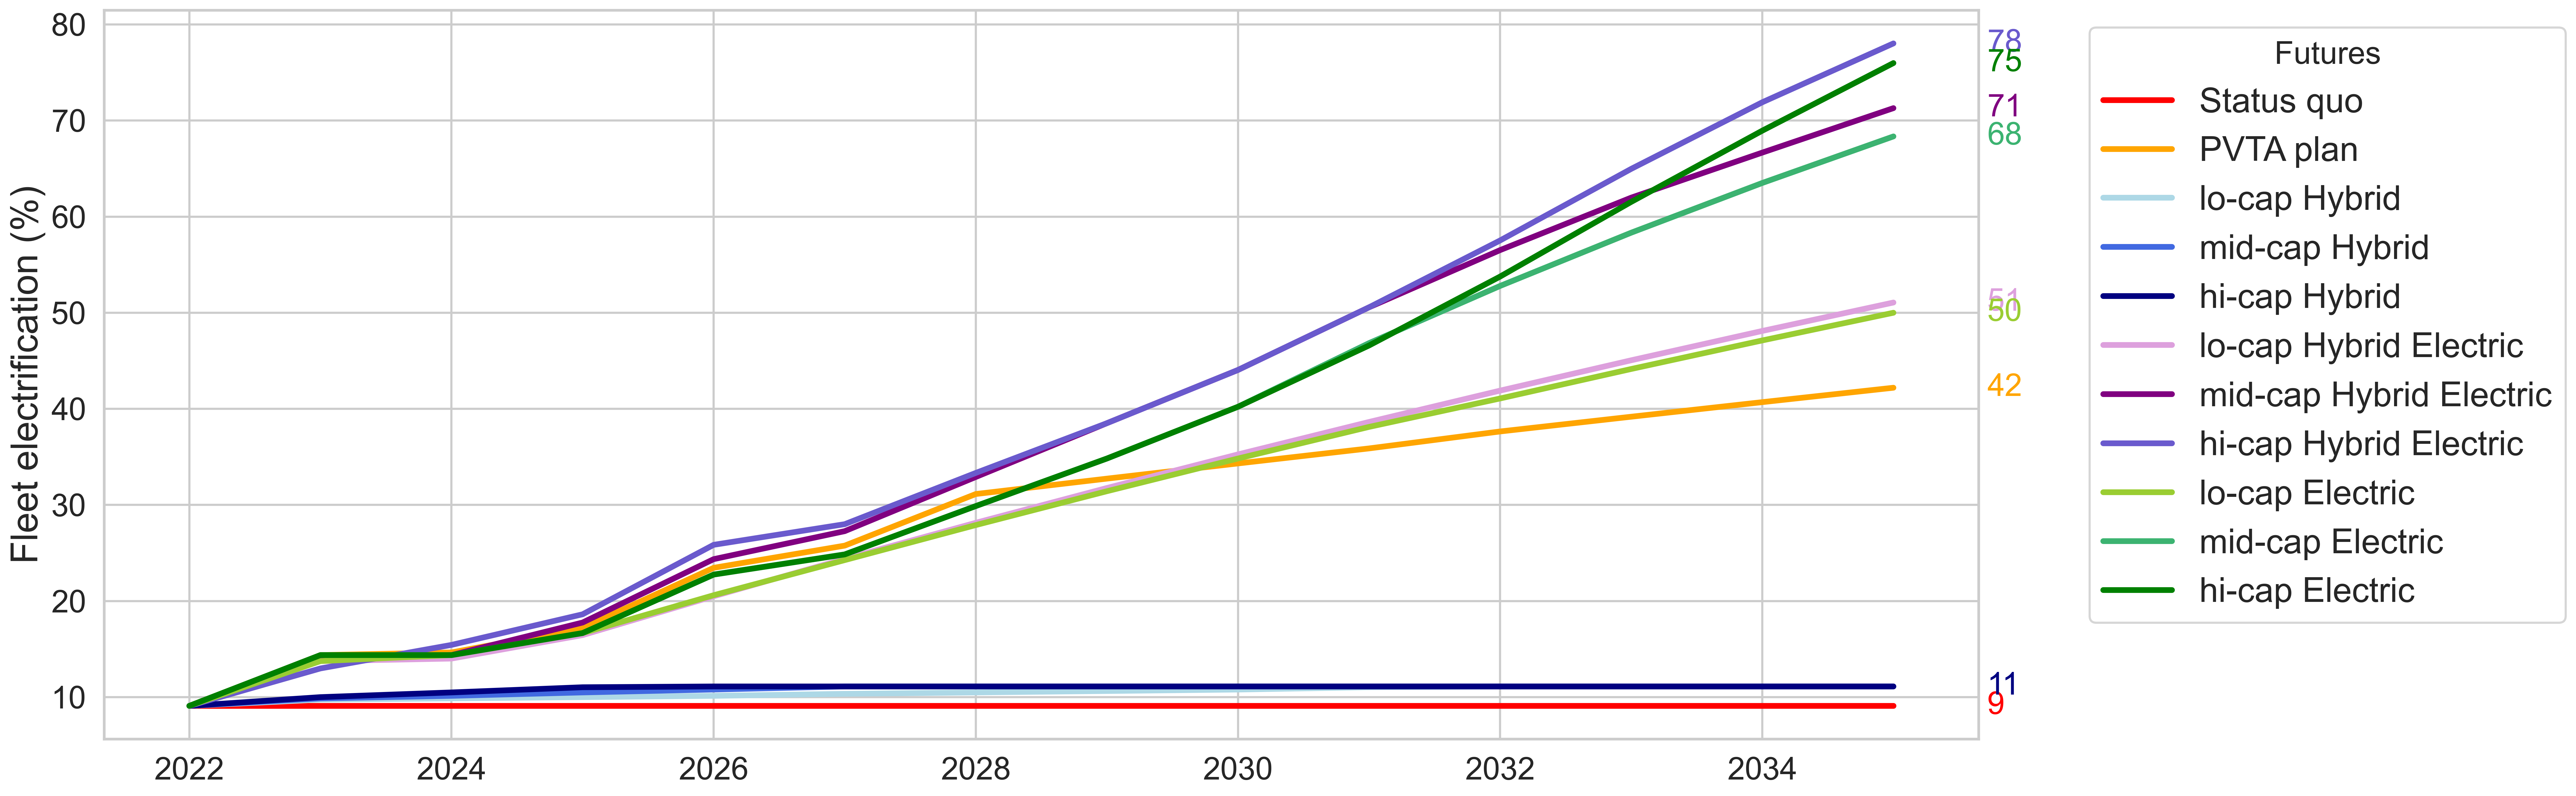

In [60]:
#fleet['Year'] = fleet['Year'] + 22
# Set the style to whitegrid
sns.set_style("whitegrid")

# Adjust the size of the plot
plt.figure(figsize=(20,8), dpi=400)


# Define a custom palette and marker order
#custom_palette = {
#    "Status quo": "black",
#    "PVTA plan": "grey",
#    "lo-cap Hybrid": "lightcoral",
#    "mid-cap Hybrid": "indianred",
#    "hi-cap Hybrid": "red",
#    "lo-cap Hybrid Electric": "aqua",
#    "mid-cap Hybrid Electric": "royalblue",
#    "hi-cap Hybrid Electric": "navy",
#    "lo-cap Electric": "yellowgreen",
#    "mid-cap Electric": "mediumseagreen",
#    "hi-cap Electric": "green"
#}

custom_palette = {
    "Status quo": "red",
    "PVTA plan": "orange",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    "lo-cap Hybrid Electric": "plum",
    "mid-cap Hybrid Electric": "purple",
    "hi-cap Hybrid Electric": "slateblue",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}

custom_markers = {
    "Status quo": "P",
    "PVTA plan": "o",
    "lo-cap Hybrid": "^",
    "mid-cap Hybrid": "s",
    "hi-cap Hybrid": "o",
    "lo-cap Hybrid Electric": "^",
    "mid-cap Hybrid Electric": "s",
    "hi-cap Hybrid Electric": "o",
    "lo-cap Electric": "^",
    "mid-cap Electric": "s",
    "hi-cap Electric": "o"
}

# Get the markers in the same order as the unique values in the 'future' column
markers_order = [custom_markers[future] for future in fleet['future'].unique()]

plot = sns.lineplot(data=fleet, x='Year', y=fleet['electrification']*100, hue='future',
                    palette=custom_palette, dashes=False, style='future',linewidth=4,)



# Annotate with the final number of the final year on each line
for line, name in zip(plot.lines, fleet['future'].unique()):
    y = line.get_ydata()[-1]
    plt.annotate(f'{int(y)}', xy=(1, y), xytext=(6, 0), color=line.get_color(),
                 xycoords = plot.get_yaxis_transform(), textcoords="offset points", 
                 size=22, va="center")

plt.ylabel('Fleet electrification (%)', fontsize=26)
plt.xlabel('', fontsize=26)
#plt.title('Electrification Percentage Over Years')
plt.grid(True, which="both")
plt.tight_layout()

# Move the legend outside the plot on the right side
plt.legend(title='Futures', title_fontsize='22', fontsize=24, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)    

# Save the figure with high resolution
plt.savefig(r'../../figures/Electrification_Percentage_Over_Years.png', dpi=400, bbox_inches='tight')

plt.show()


In [61]:
h_pp = pd.read_csv(r'../../results/highcap-PP-optimized-variables-with-replacement-y.csv', low_memory=False)
h_FE = pd.read_csv(r'../../results/highcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
m_FE = pd.read_csv(r'../../results/midcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
l_FE = pd.read_csv(r'../../results/lowcap-FE-optimized-variables-with-replacement-y.csv', low_memory=False)
h_FH = pd.read_csv(r'../../results/highcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
m_FH = pd.read_csv(r'../../results/midcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
l_FH = pd.read_csv(r'../../results/lowcap-FH-optimized-variables-with-replacement-y.csv', low_memory=False)
h_HE = pd.read_csv(r'../../results/highcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
m_HE = pd.read_csv(r'../../results/midcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)
l_HE = pd.read_csv(r'../../results/lowcap-BM-optimized-variables-with-replacement-y.csv', low_memory=False)

In [62]:
### Plot charging infrastructure

h_pp['future']="PVTA plan"
h_FE['future']= "hi-cap Electric"
m_FE['future']= "mid-cap Electric"
l_FE['future']= "lo-cap Electric"
h_FH['future']= "hi-cap Hybrid"
m_FH['future']= "mid-cap Hybrid"
l_FH['future']= "lo-cap Hybrid"
h_HE['future']= "hi-cap Hybrid Electric"
m_HE['future']= "mid-cap Hybrid Electric"
l_HE['future']= "lo-cap Hybrid Electric"

# Concatenating all dataframes
all_dataframes = [h_pp, h_FE, m_FE, l_FE, h_FH, m_FH, l_FH, h_HE, m_HE, l_HE]
combined_df = pd.concat(all_dataframes, ignore_index=True)
# Apply the mapping
combined_df['Year'] = combined_df['Year'].map(year_mapping)

custom_palette = {
    "Status quo": "red",
    "PVTA plan": "orange",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    "lo-cap Hybrid Electric": "plum",
    "mid-cap Hybrid Electric": "purple",
    "hi-cap Hybrid Electric": "slateblue",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}

custom_markers = {
    "PVTA plan": "o",
    "lo-cap Hybrid": "^",
    "mid-cap Hybrid": "s",
    "hi-cap Hybrid": "o",
    "lo-cap Hybrid Electric": "^",
    "mid-cap Hybrid Electric": "s",
    "hi-cap Hybrid Electric": "o",
    "lo-cap Electric": "^",
    "mid-cap Electric": "s",
    "hi-cap Electric": "o"
}

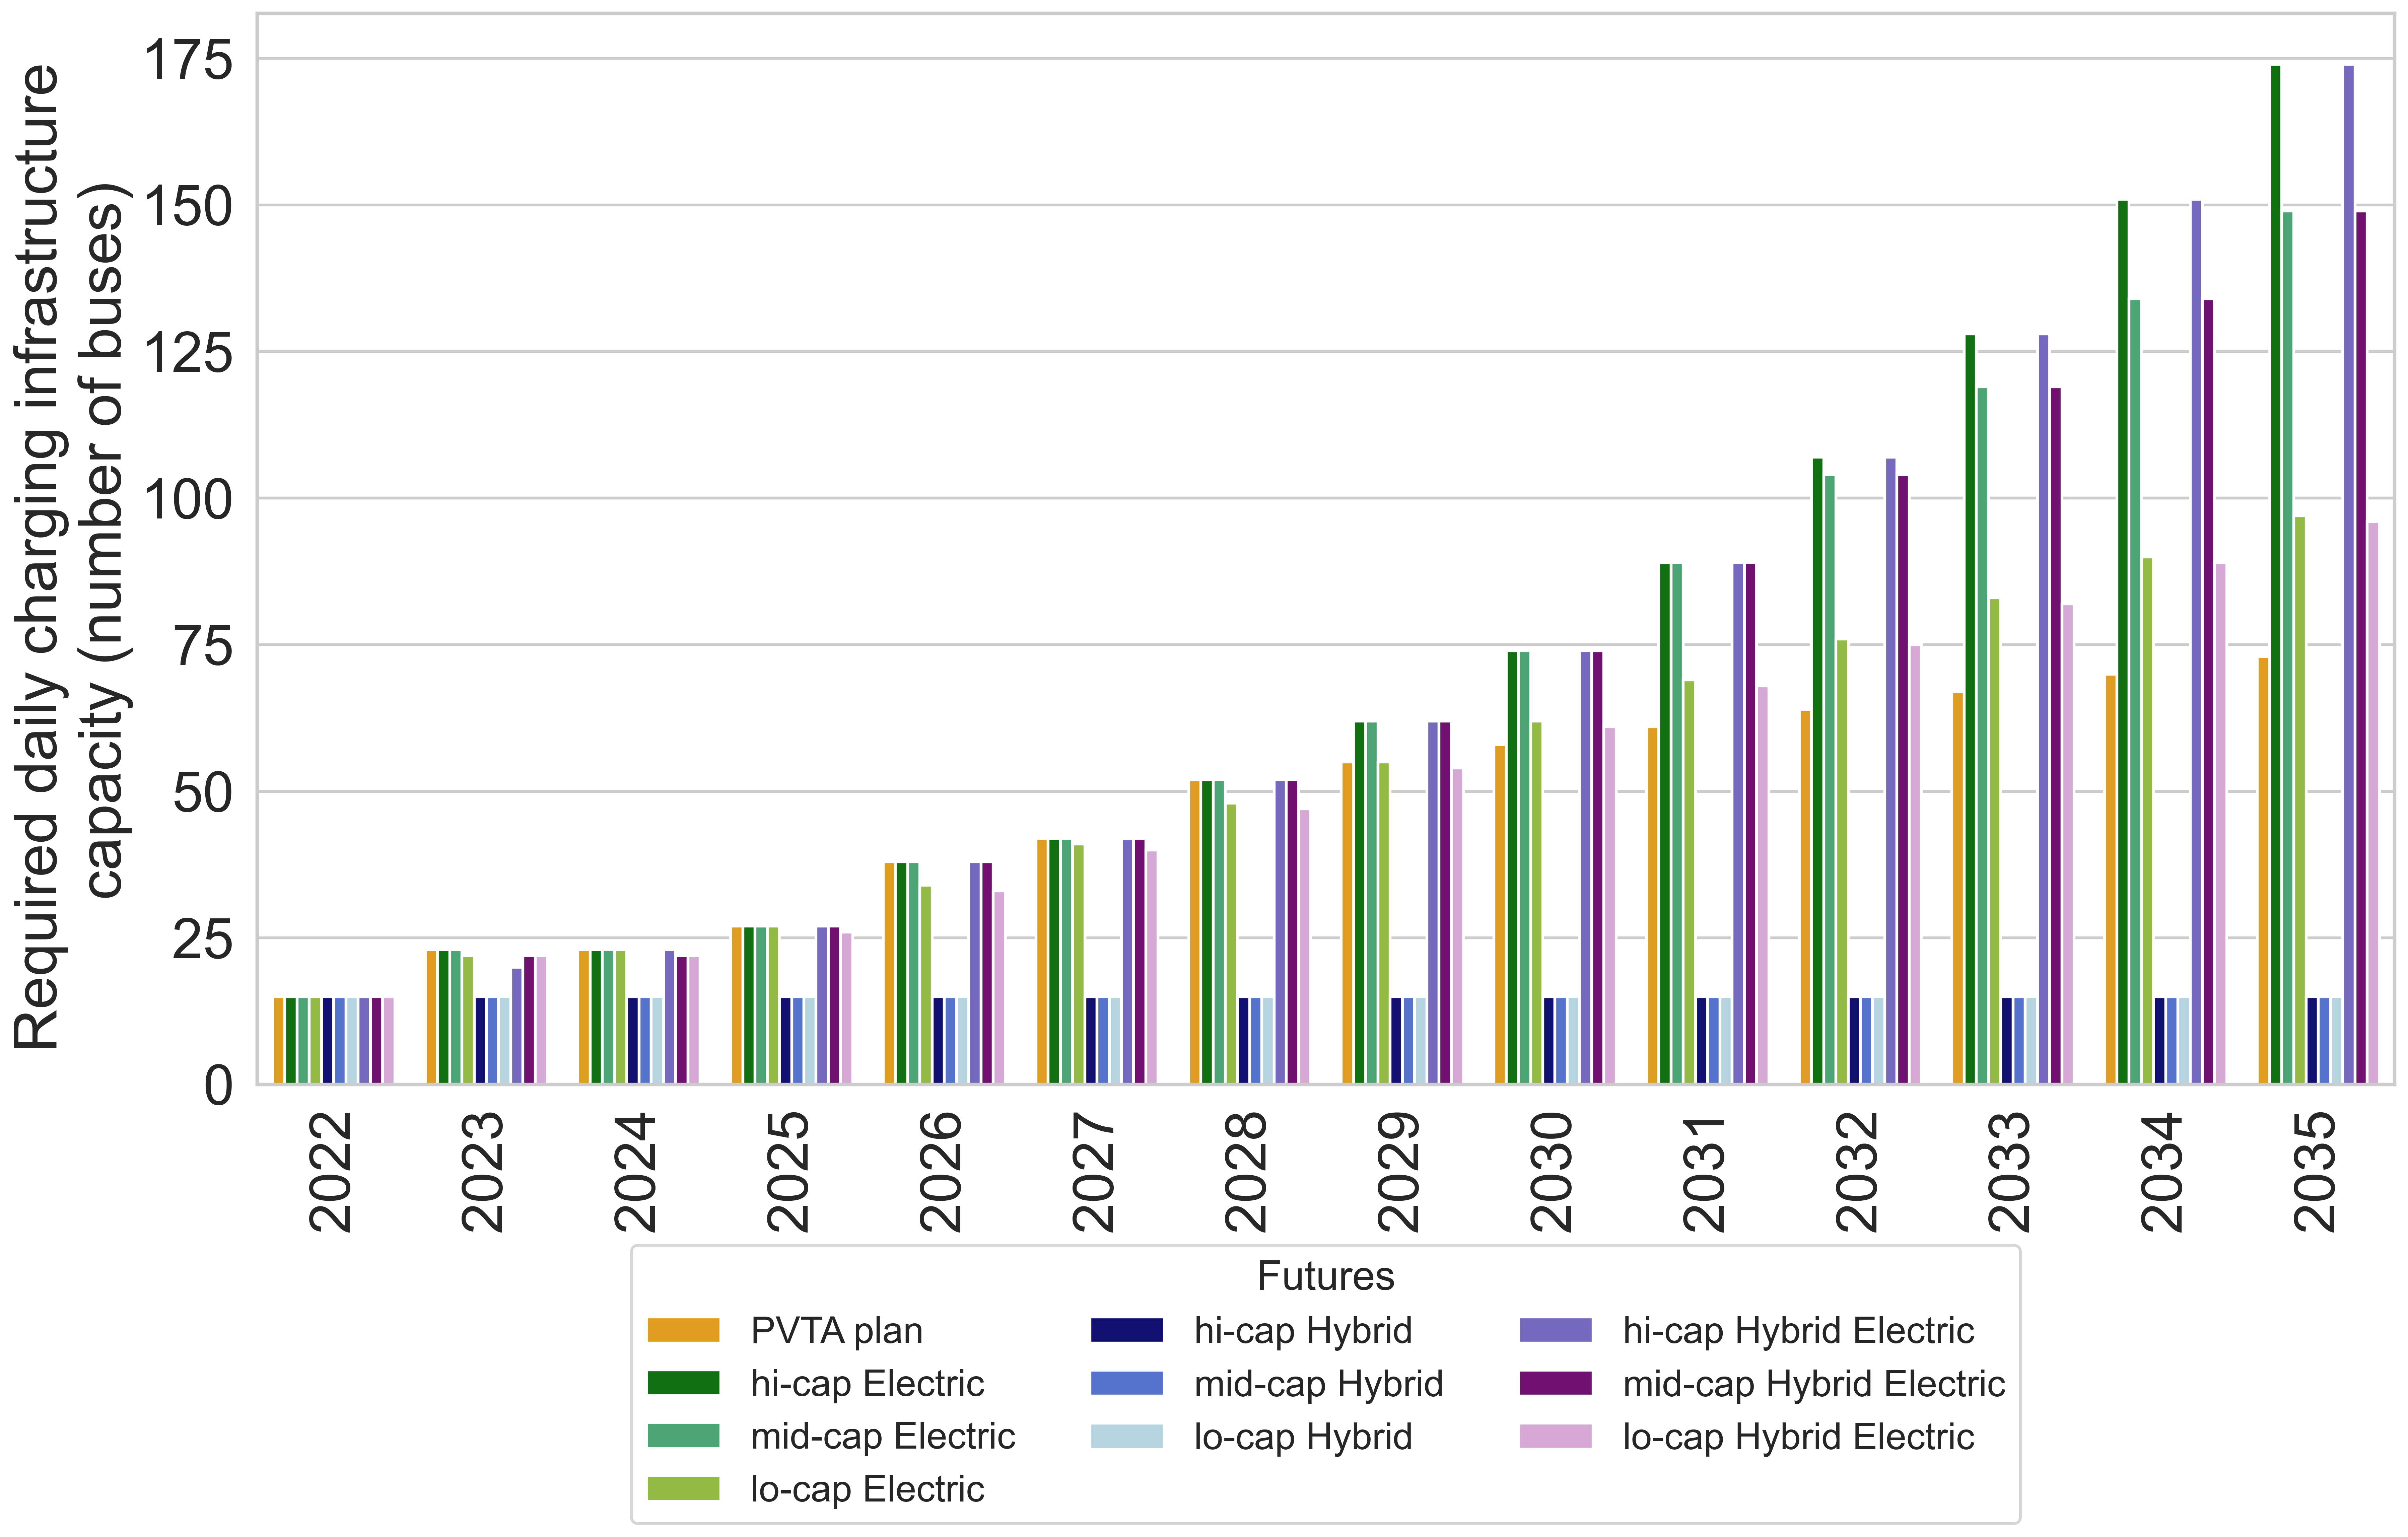

In [65]:
#combined_df['Year']=combined_df['Year']+22
# Set the style to whitegrid
sns.set_style("whitegrid")

# Adjust the size of the plot
plt.figure(figsize=(18,12), dpi=400)

# Filter for rows where Powertrain is 'BEB'
beb_df = combined_df[combined_df['Powertrain'] == 'BEB']

plot = sns.barplot(data=beb_df, x='Year', y='Value', hue='future', palette=custom_palette)
plt.ylabel('Required daily charging infrastructure \n capacity (number of buses)', fontsize=32)
plt.xlabel('')
#plt.xlabel('Year', fontsize=70)
#plt.legend(title='Futures', title_fontsize='22', fontsize=20, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(title='Futures', title_fontsize='22', fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, borderaxespad=0.)

plt.tight_layout()

plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)

# Save the figure with high resolution
plt.savefig(r'../../figures/charging-infra.png', dpi=400, bbox_inches='tight')

plt.show()


In [66]:
pivot_df = pd.read_pickle(r'../../results/pivot_df.pkl')

In [67]:
grouped_df=result_df[['Year','future','cumulative_cost']].copy()

In [68]:
pivot_df

Strategy  PVTA plan     Hybrid  Hybrid Electric   Electric
Scenario                                                  
lo-cap          NaN  14.353959        22.428664  17.994106
mid-cap   23.344197  18.142888        37.958893  26.290945
hi-cap          NaN  19.376049        44.530518  32.261544

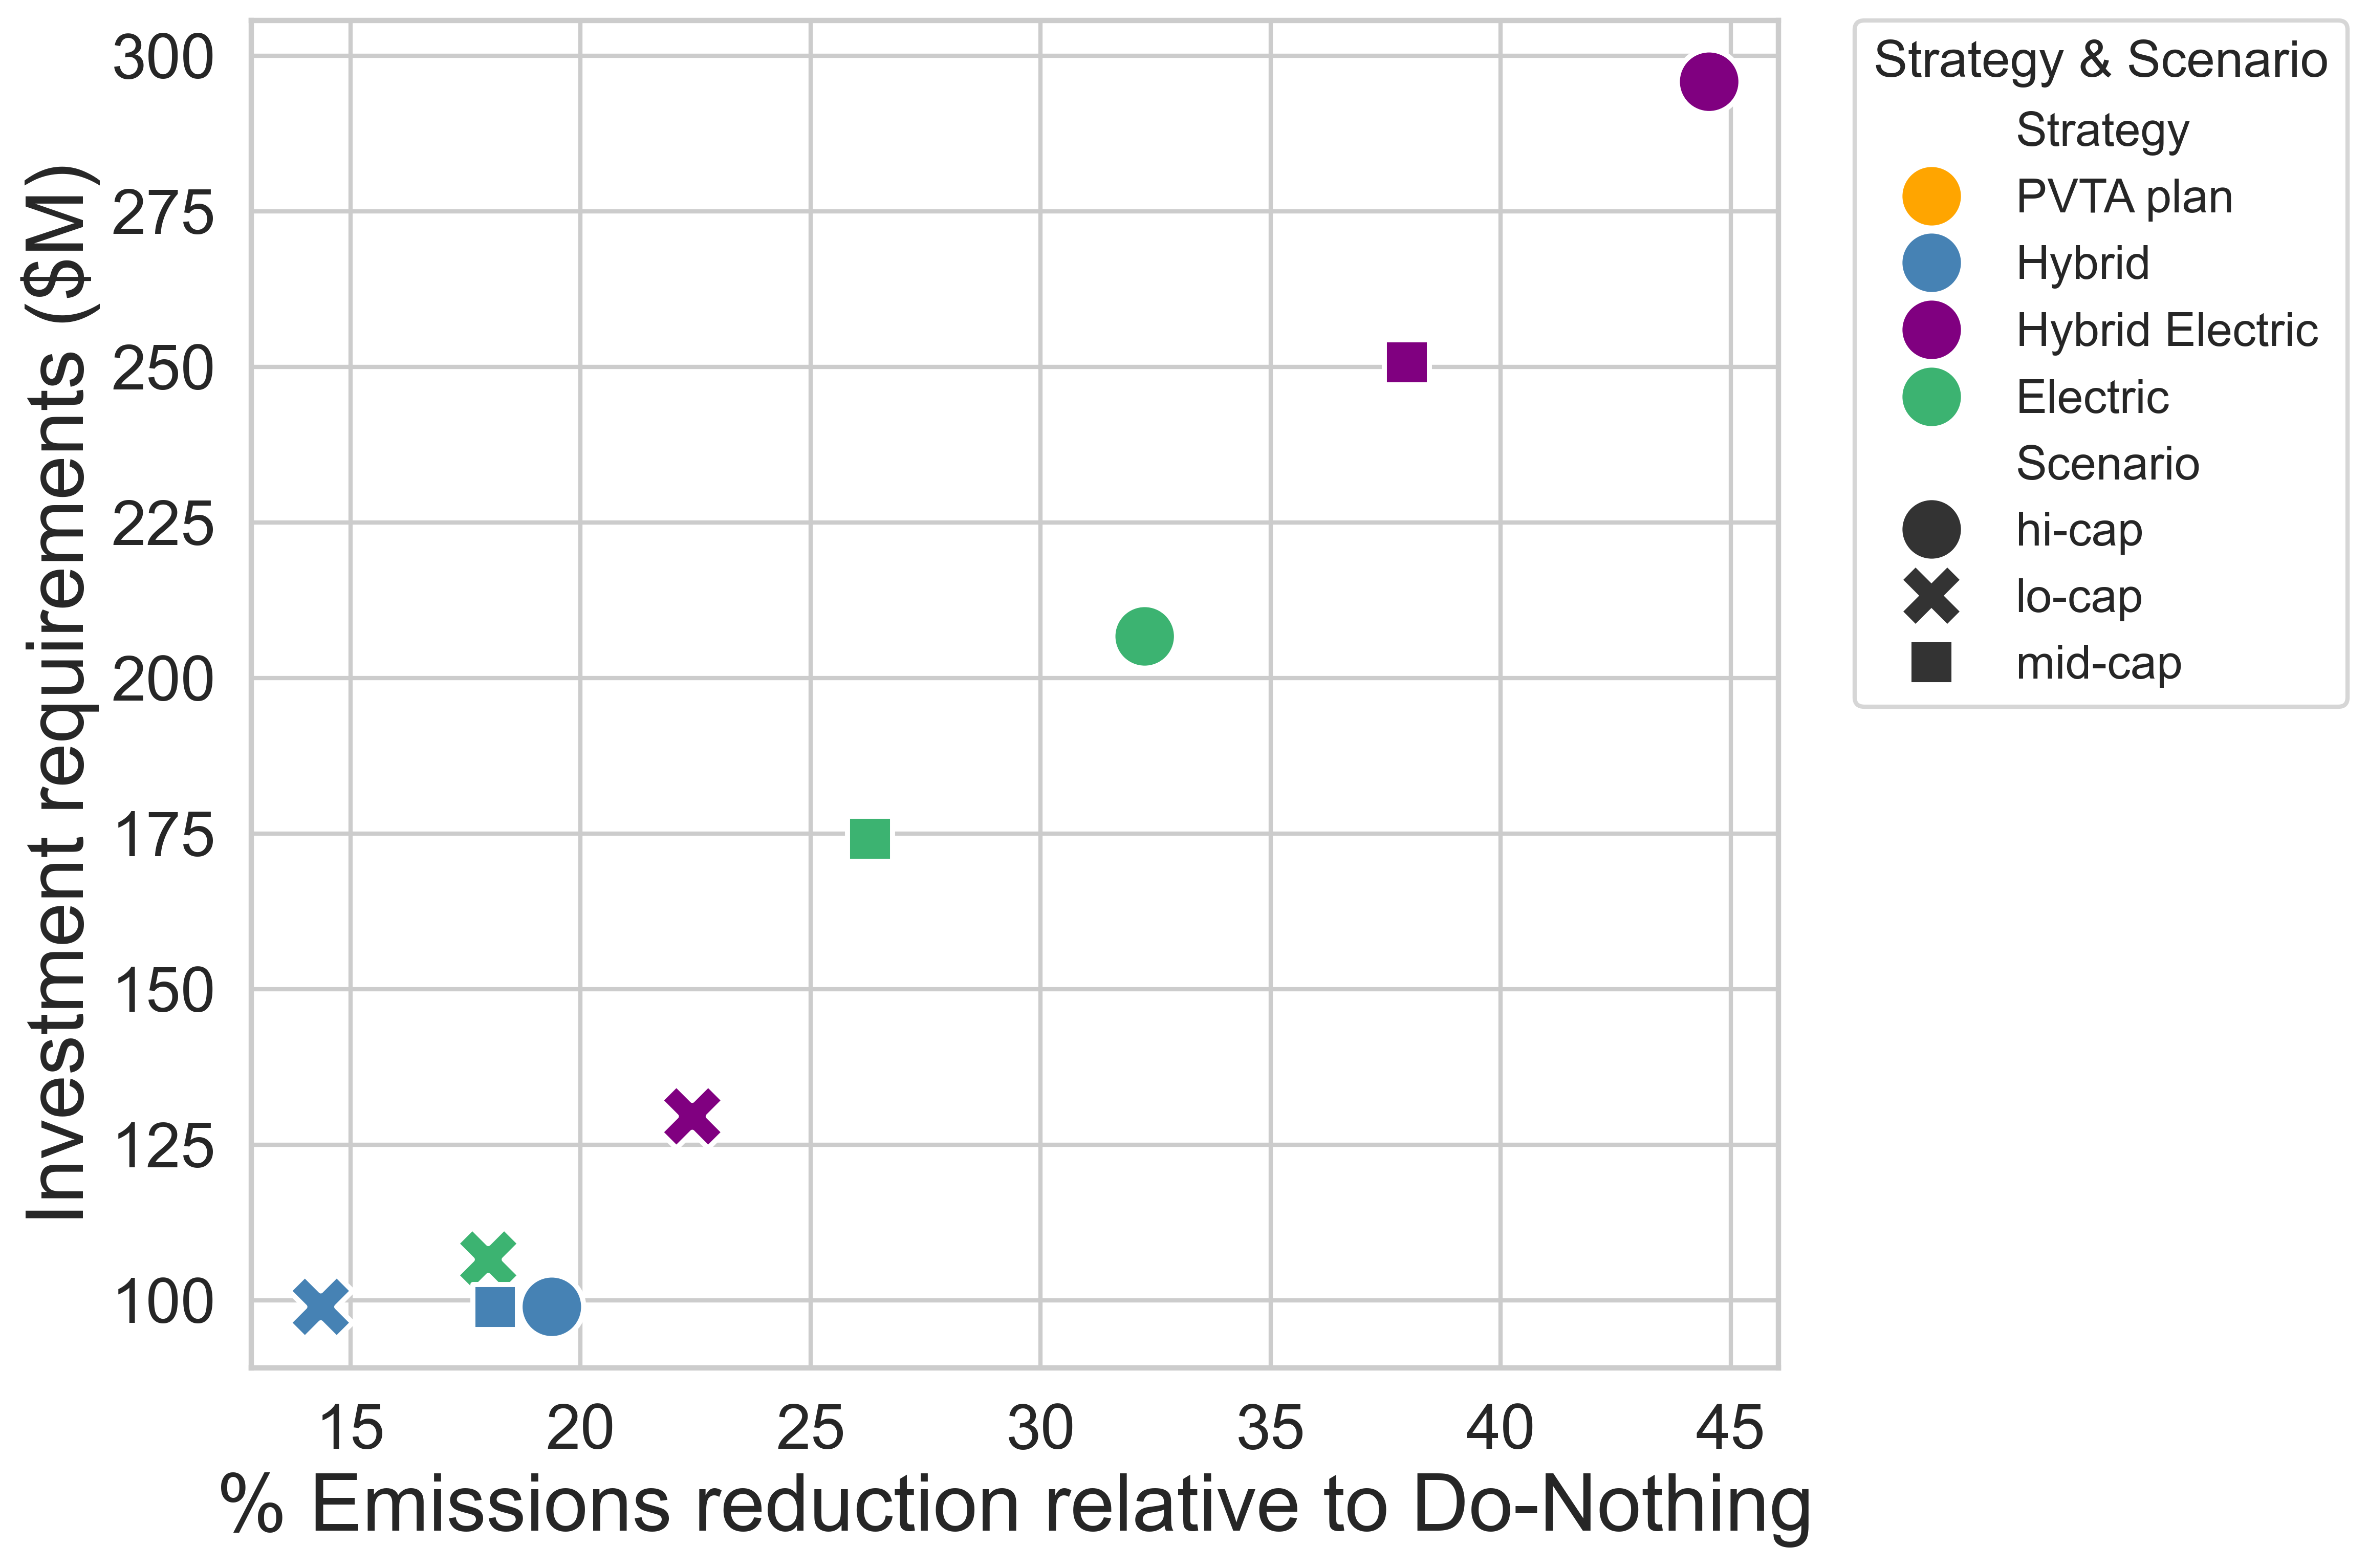

In [70]:
# Reshaping pivot_df
pivot_melted = pivot_df.reset_index().melt(id_vars='Scenario', 
                                           value_vars=pivot_df.columns, 
                                           var_name='Strategy', 
                                           value_name='%Decrease')

# Create a combined column for Scenario and Strategy
pivot_melted['Scenario-Strategy'] = pivot_melted['Scenario'] + ' ' + pivot_melted['Strategy']

# Merging the two dataframes
combined_df = pd.merge(pivot_melted, 
                       grouped_df, 
                       left_on='Scenario-Strategy', 
                       right_on='future', 
                       how='inner')

# Group by 'Scenario' and 'Strategy' and sum the 'Cumulative Cost'
final_df = combined_df.groupby(['Scenario', 'Strategy']).agg({'%Decrease': 'first', 'cumulative_cost': 'max'}).reset_index()

# Defining colors for strategies
colors = {'PVTA plan': 'orange', 'Hybrid': 'steelblue', 'Hybrid Electric': 'purple', 'Electric': 'mediumseagreen'}

# Plotting
plt.figure(figsize=(12, 8), dpi=400)
sns.scatterplot(data=final_df, 
                x='%Decrease', 
                y='cumulative_cost', 
                hue='Strategy',  # Color by Strategy
                hue_order=colors.keys(),
                palette=colors,  # Using the custom colors
                style='Scenario',  # Shape by Scenario
                s=500)

plt.xlabel('% Emissions reduction relative to Do-Nothing', fontsize=28)
plt.ylabel('Investment requirements ($M)', fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.legend(title='Strategy & Scenario', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig(r'../../figures/scatterplot_reduction_vs_investment_modified.png', bbox_inches='tight', dpi=400)
plt.show()


In [71]:
pivot_df_emission = pd.read_pickle(r'../../results/pivot_df_emission.pkl')

In [72]:
combined_df['Strategy'].unique()

array(['Hybrid', 'Hybrid Electric', 'Electric'], dtype=object)

In [73]:
grouped_df['future'] = grouped_df['future'].replace('PVTA plan','mid-cap PVTA plan')

In [74]:
grouped_df

Year             future  cumulative_cost
0    2022  mid-cap PVTA plan              0.0
1    2023  mid-cap PVTA plan             10.4
2    2024  mid-cap PVTA plan             24.8
3    2025  mid-cap PVTA plan             39.0
4    2026  mid-cap PVTA plan             53.3
..    ...                ...              ...
149  2031         Status quo             44.3
150  2032         Status quo             44.3
151  2033         Status quo             45.5
152  2034         Status quo             45.5
153  2035         Status quo             55.8

[154 rows x 3 columns]

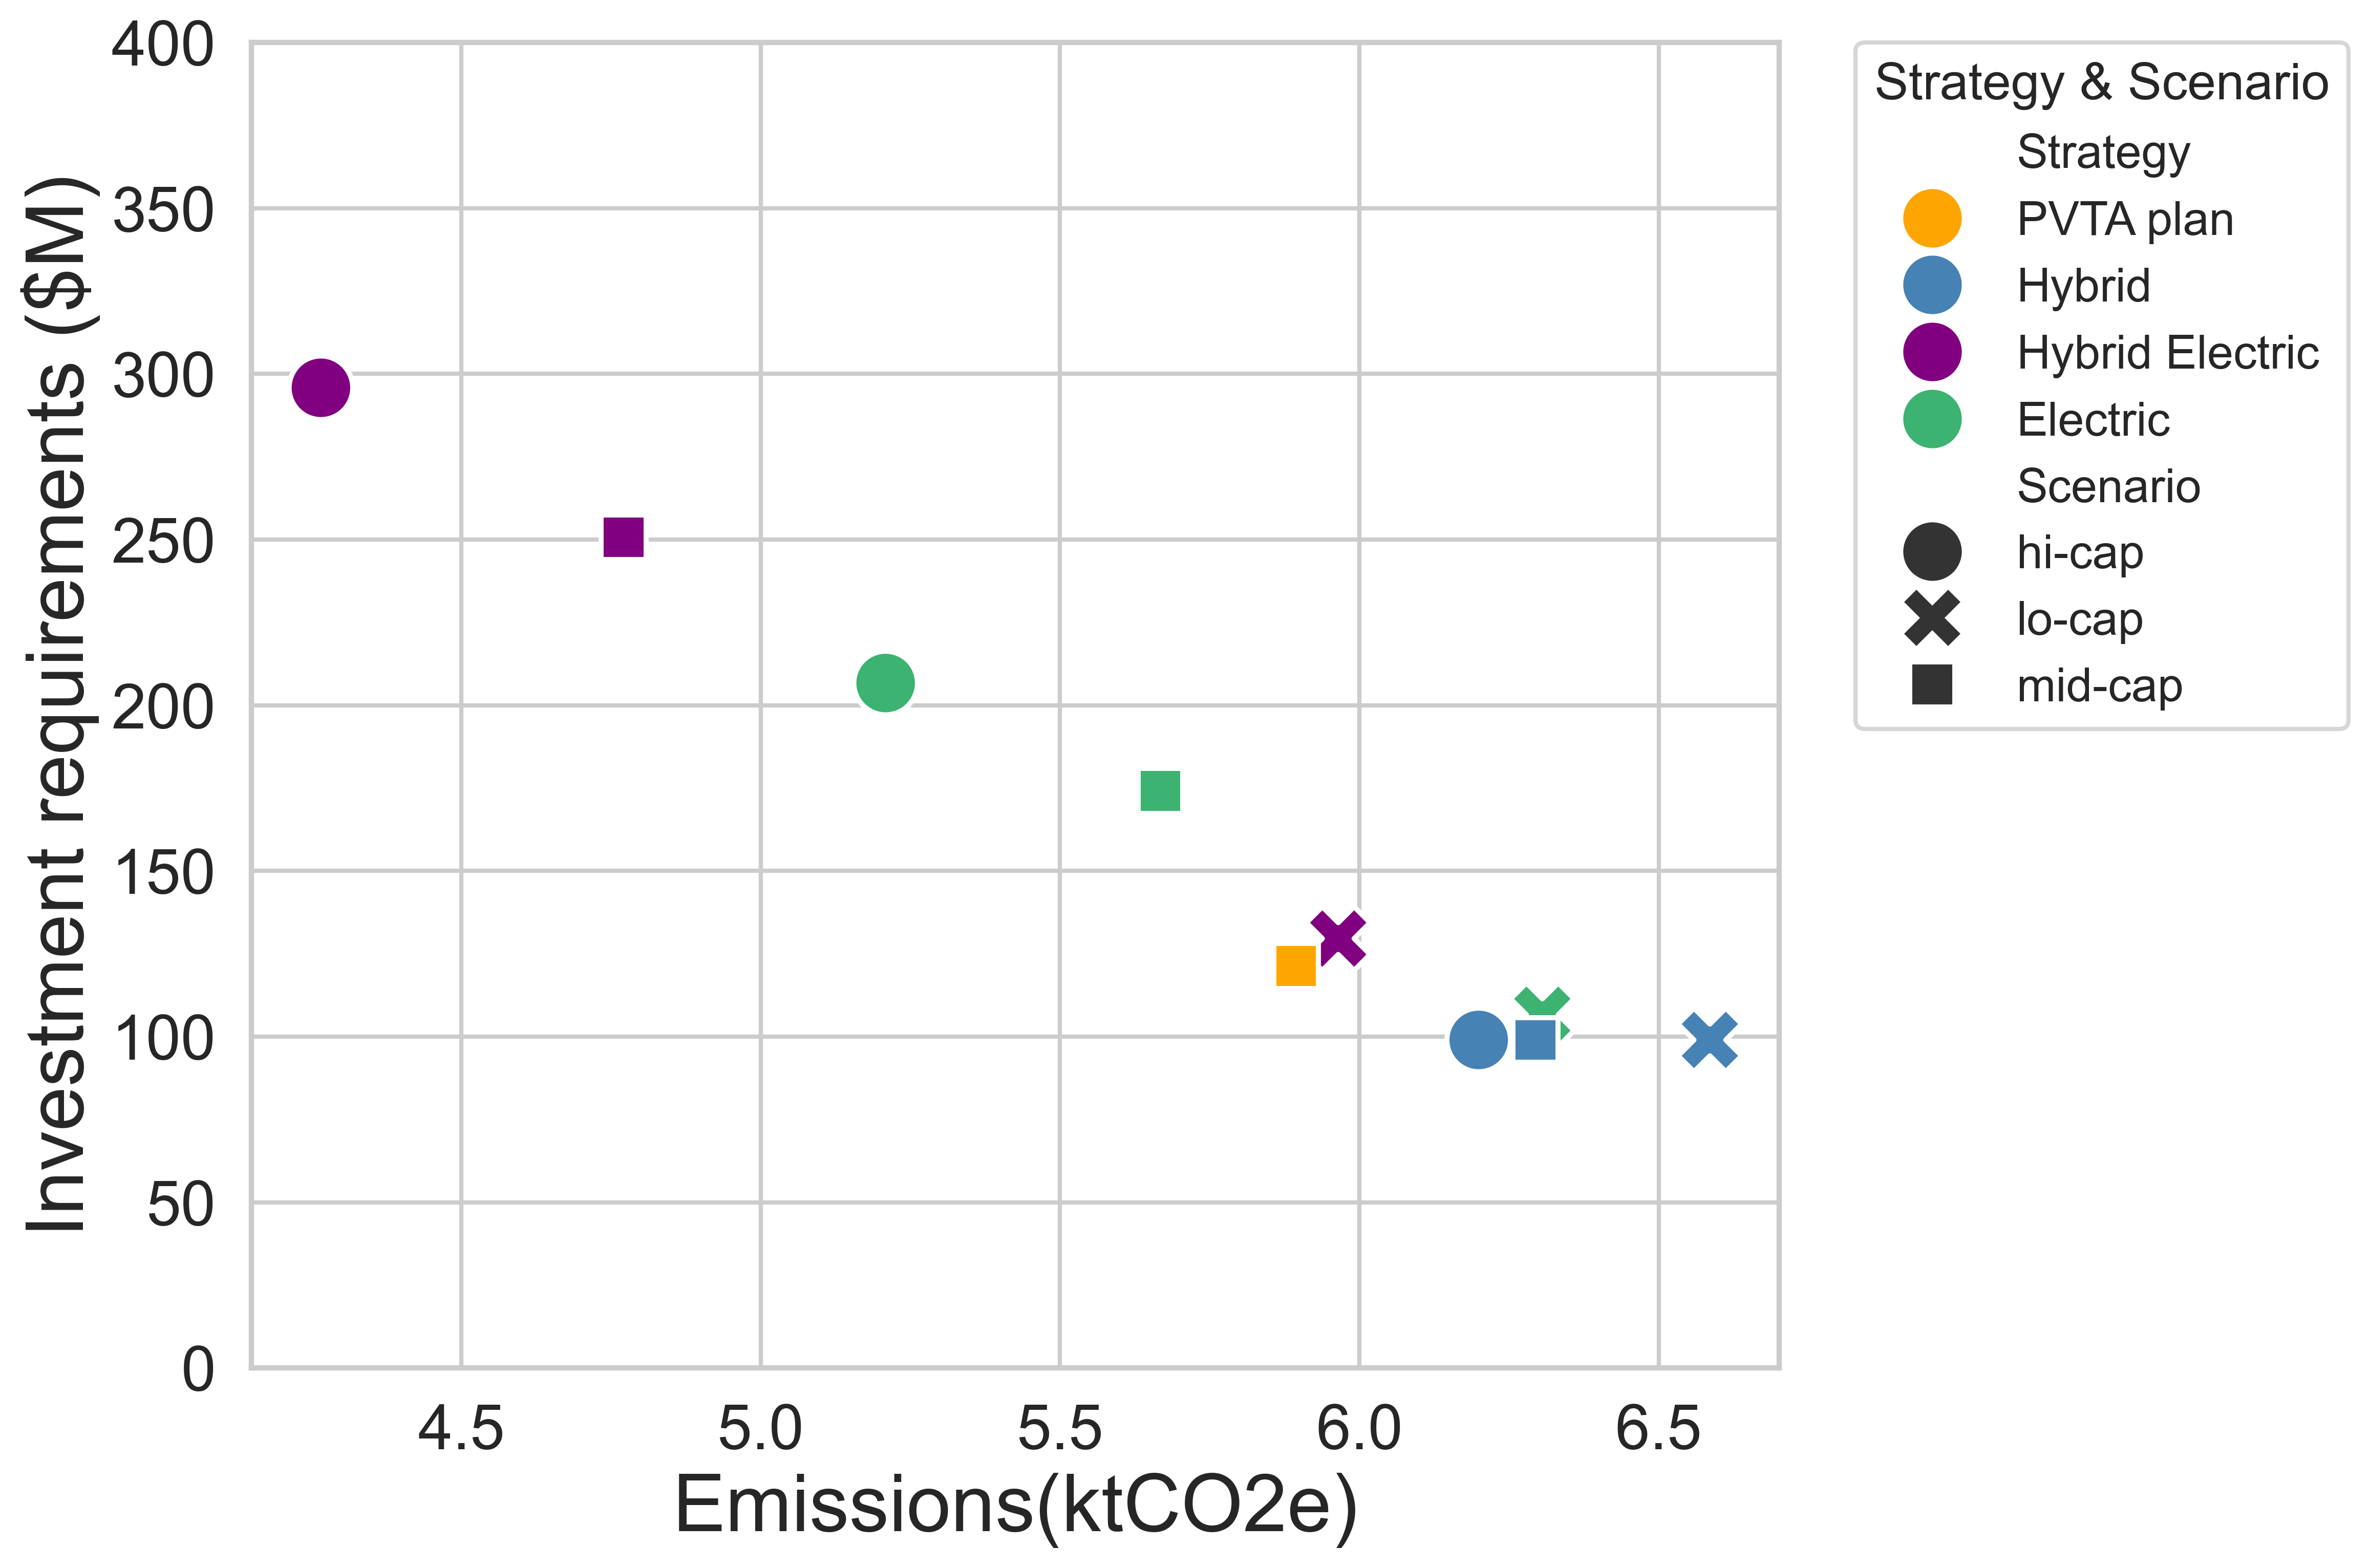

In [76]:
# Reshaping pivot_df
pivot_melted = pivot_df_emission.reset_index().melt(id_vars='Scenario', 
                                           value_vars=pivot_df.columns, 
                                           var_name='Strategy', 
                                           value_name='%Decrease')

# Create a combined column for Scenario and Strategy
pivot_melted['Scenario-Strategy'] = pivot_melted['Scenario'] + ' ' + pivot_melted['Strategy']

# Merging the two dataframes
combined_df = pd.merge(pivot_melted, 
                       grouped_df, 
                       left_on='Scenario-Strategy', 
                       right_on='future', 
                       how='inner')

# Group by 'Scenario' and 'Strategy' and sum the 'Cumulative Cost'
final_df = combined_df.groupby(['Scenario', 'Strategy']).agg({'%Decrease': 'first', 'cumulative_cost': 'max'}).reset_index()

# Defining colors for strategies
colors = {'PVTA plan': 'orange','Hybrid': 'steelblue', 'Hybrid Electric': 'purple', 'Electric': 'mediumseagreen'}

# Plotting
plt.figure(figsize=(12, 8), dpi=400)
sns.scatterplot(data=final_df, 
                x='%Decrease', 
                y='cumulative_cost', 
                hue='Strategy',  # Color by Strategy
                hue_order=colors.keys(),
                palette=colors,  # Using the custom colors
                style='Scenario',  # Shape by Scenario
                s=500)

plt.xlabel('Emissions(ktCO2e)', fontsize=28)
plt.ylabel('Investment requirements ($M)', fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylim(0, 400)


plt.legend(title='Strategy & Scenario', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig(r'../../figures/scatterplot_reduction_vs_investment_modified.png', bbox_inches='tight', dpi=400)
plt.show()


In [77]:
import numpy as np
pivot_melted['investment_gap'] = np.nan

pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'hi-cap Hybrid', 'investment_gap'] = 31
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'mid-cap Hybrid', 'investment_gap'] = 161
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'lo-cap Hybrid', 'investment_gap'] = 291
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'hi-cap Hybrid Electric', 'investment_gap'] = 0
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'mid-cap Hybrid Electric', 'investment_gap'] = 9
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'lo-cap Hybrid Electric', 'investment_gap'] = 94
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'hi-cap Electric', 'investment_gap'] = 23
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'mid-cap Electric', 'investment_gap'] = 86
pivot_melted.loc[pivot_melted['Scenario-Strategy'] == 'lo-cap Electric', 'investment_gap'] = 183
pivot_melted

Scenario         Strategy  %Decrease        Scenario-Strategy  \
0    hi-cap        PVTA plan        NaN         hi-cap PVTA plan   
1   mid-cap        PVTA plan   5.894250        mid-cap PVTA plan   
2    lo-cap        PVTA plan        NaN         lo-cap PVTA plan   
3    hi-cap           Hybrid   6.199371            hi-cap Hybrid   
4   mid-cap           Hybrid   6.294192           mid-cap Hybrid   
5    lo-cap           Hybrid   6.585532            lo-cap Hybrid   
6    hi-cap  Hybrid Electric   4.265183   hi-cap Hybrid Electric   
7   mid-cap  Hybrid Electric   4.770491  mid-cap Hybrid Electric   
8    lo-cap  Hybrid Electric   5.964648   lo-cap Hybrid Electric   
9    hi-cap         Electric   5.208574          hi-cap Electric   
10  mid-cap         Electric   5.667668         mid-cap Electric   
11   lo-cap         Electric   6.305632          lo-cap Electric   

    investment_gap  
0              NaN  
1              NaN  
2              NaN  
3             31.0  
4            161.0  
5            291.0  
6              0.0  
7              9.0  
8             94.0  
9             23.0  
10            86.0  
11           183.0

In [78]:
final_df['reduction_per_million']=final_df['%Decrease']/final_df['cumulative_cost']

In [79]:
final_df

Scenario         Strategy  %Decrease  cumulative_cost  reduction_per_million
0   hi-cap         Electric   5.208574            206.7               0.025199
1   hi-cap           Hybrid   6.199371             99.0               0.062620
2   hi-cap  Hybrid Electric   4.265183            295.8               0.014419
3   lo-cap         Electric   6.305632            106.6               0.059152
4   lo-cap           Hybrid   6.585532             99.0               0.066521
5   lo-cap  Hybrid Electric   5.964648            129.6               0.046024
6  mid-cap         Electric   5.667668            174.2               0.032535
7  mid-cap           Hybrid   6.294192             99.0               0.063578
8  mid-cap  Hybrid Electric   4.770491            250.7               0.019029
9  mid-cap        PVTA plan   5.894250            121.3               0.048592

In [80]:
final_df.sort_values(by=['reduction_per_million'],ascending=False)

Scenario         Strategy  %Decrease  cumulative_cost  reduction_per_million
4   lo-cap           Hybrid   6.585532             99.0               0.066521
7  mid-cap           Hybrid   6.294192             99.0               0.063578
1   hi-cap           Hybrid   6.199371             99.0               0.062620
3   lo-cap         Electric   6.305632            106.6               0.059152
9  mid-cap        PVTA plan   5.894250            121.3               0.048592
5   lo-cap  Hybrid Electric   5.964648            129.6               0.046024
6  mid-cap         Electric   5.667668            174.2               0.032535
0   hi-cap         Electric   5.208574            206.7               0.025199
8  mid-cap  Hybrid Electric   4.770491            250.7               0.019029
2   hi-cap  Hybrid Electric   4.265183            295.8               0.014419

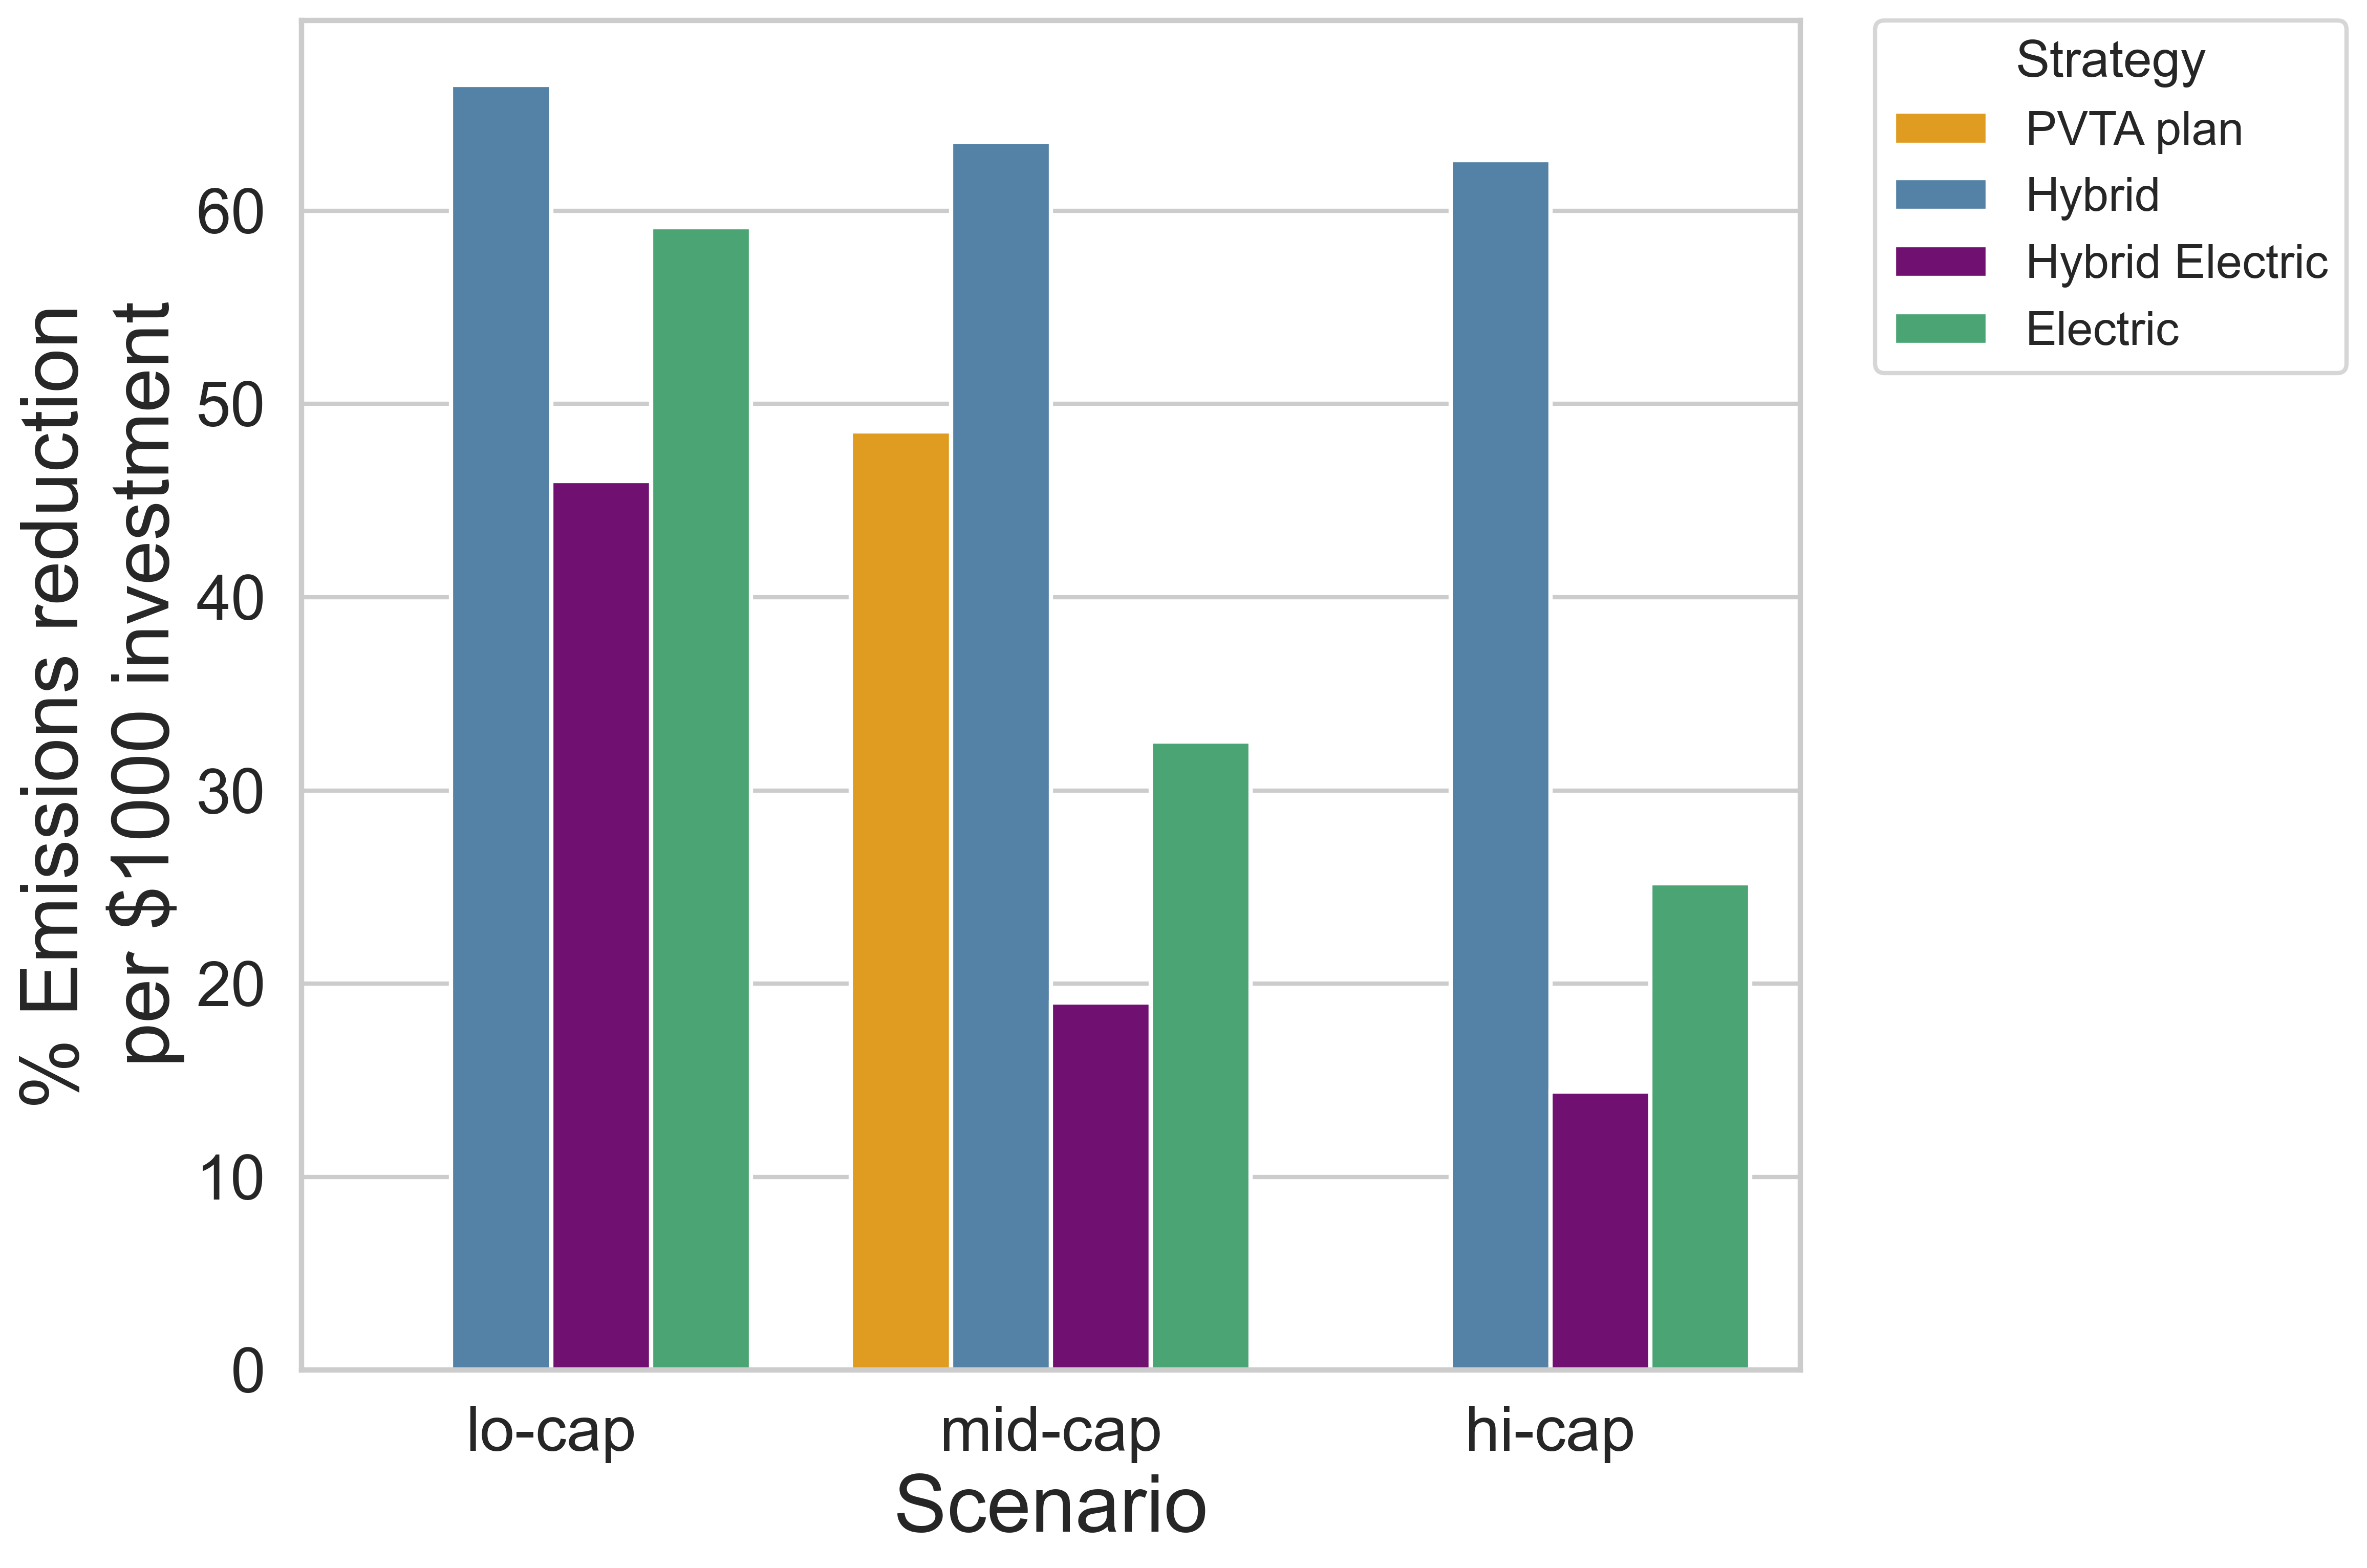

In [87]:
## Make bar plot of % emissions reduction per million

final_df['% Reduction per $M'] = final_df['%Decrease'] / final_df['cumulative_cost']
final_df['% Reduction per $1000'] = final_df['% Reduction per $M']*1000

# Defining colors for strategies
colors = {'PVTA plan': 'orange','Hybrid': 'steelblue', 'Hybrid Electric': 'purple', 'Electric': 'mediumseagreen'}


# Ordering scenarios
order_of_scenarios = ['lo-cap', 'mid-cap', 'hi-cap']

# Plotting
plt.figure(figsize=(12, 8), dpi=400)
sns.barplot(data=final_df, 
            x='Scenario', 
            y='% Reduction per $1000', 
            hue='Strategy',  # Color by Strategy
            hue_order=colors.keys(),
            order=order_of_scenarios,  # Explicitly specify the order
            palette=colors,  # Using the custom colors
            errorbar=None)  # Remove the error bars

plt.xlabel('Scenario', fontsize=28)
plt.ylabel('% Emissions reduction \n per $1000 investment', fontsize=28)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(title='Strategy', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.savefig(r'../../figures/barplot_reduction_per_dollar.png', bbox_inches='tight', dpi=400)
plt.show()



In [90]:
final_df

Scenario         Strategy  %Decrease  cumulative_cost  \
0   hi-cap         Electric   5.208574            206.7   
1   hi-cap           Hybrid   6.199371             99.0   
2   hi-cap  Hybrid Electric   4.265183            295.8   
3   lo-cap         Electric   6.305632            106.6   
4   lo-cap           Hybrid   6.585532             99.0   
5   lo-cap  Hybrid Electric   5.964648            129.6   
6  mid-cap         Electric   5.667668            174.2   
7  mid-cap           Hybrid   6.294192             99.0   
8  mid-cap  Hybrid Electric   4.770491            250.7   
9  mid-cap        PVTA plan   5.894250            121.3   

   reduction_per_million  % Reduction per $M  % Reduction per $1000  
0               0.025199            0.025199              25.198713  
1               0.062620            0.062620              62.619908  
2               0.014419            0.014419              14.419144  
3               0.059152            0.059152              59.152268  
4               0.066521            0.066521              66.520521  
5               0.046024            0.046024              46.023518  
6               0.032535            0.032535              32.535406  
7               0.063578            0.063578              63.577693  
8               0.019029            0.019029              19.028684  
9               0.048592            0.048592              48.592336